In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

## Approach
1. Summary Statistics
2. EDA & Visualizations
3. Data Cleansing/Transformation
    3.1. Data Correctness
    3.2. Skewness Analysis
    3.3. Scaling/Normalization
4. Missing Values (missing vs. NAs)
5. Merge the datasets
6. Reduce the categories of categorical features
7. Create Derived features / Dummy features
8. Outlier treatment
9. Dimension Reduction
10. Handling Class Imbalance
11. train-holdout-test split
12. Model Development
13. Model Validation / Performance Measures
14. Model Tuning
15. Final Model selection
16. Run the final model against application_test dataset

## Assumptions
1. For a binary regression/classification, the factor level 1 of the dependent variable should represent the desired outcome
2. Only the meaningful variables should be included
3. The independent variables should be independent of each other, i.e., the model should have little or no multicollinearity.
4. The independent variables are linearly related to the log odds (for logistic regression)
5. Logistic regression requires quite large sample sizes

### Notes: 
1. If there is an attribute that highly affects the output target, then such an attribute should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
2. XNA/XAP denote NA values

## Load the dataset

In [2]:
train = pd.read_csv('/Users/kanuamit/Desktop/Great Lakes/Capstone/dataset/application_train.csv')
POS_CASH_balance = pd.read_csv('/Users/kanuamit/Desktop/Great Lakes/Capstone/dataset/POS_CASH_balance.csv')
bureau_balance = pd.read_csv('/Users/kanuamit/Desktop/Great Lakes/Capstone/dataset/bureau_balance.csv')
previous_application = pd.read_csv('/Users/kanuamit/Desktop/Great Lakes/Capstone/dataset/previous_application.csv')
installments_payments = pd.read_csv('/Users/kanuamit/Desktop/Great Lakes/Capstone/dataset/installments_payments.csv')
credit_card_balance = pd.read_csv('/Users/kanuamit/Desktop/Great Lakes/Capstone/dataset/credit_card_balance.csv')
bureau = pd.read_csv('/Users/kanuamit/Desktop/Great Lakes/Capstone/dataset/bureau.csv')
application_test = pd.read_csv('/Users/kanuamit/Desktop/Great Lakes/Capstone/dataset/application_test.csv')

In [3]:
print('Size of application_train data', train.shape)
print('Size of POS_CASH_balance data', POS_CASH_balance.shape)
print('Size of bureau_balance data', bureau_balance.shape)
print('Size of previous_application data', previous_application.shape)
print('Size of installments_payments data', installments_payments.shape)
print('Size of credit_card_balance data', credit_card_balance.shape)
print('Size of bureau data', bureau.shape)

Size of application_train data (307511, 122)
Size of POS_CASH_balance data (10001358, 8)
Size of bureau_balance data (27299925, 3)
Size of previous_application data (1670214, 37)
Size of installments_payments data (13605401, 8)
Size of credit_card_balance data (3840312, 23)
Size of bureau data (1716428, 17)


In [13]:
train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

## EDA (Exploratory Data Analysis)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [17]:
train.describe().T

count           mean            std  \
SK_ID_CURR                   307511.0  278180.518577  102790.175348   
TARGET                       307511.0       0.080729       0.272419   
CNT_CHILDREN                 307511.0       0.417052       0.722121   
AMT_INCOME_TOTAL             307511.0  168797.919297  237123.146279   
AMT_CREDIT                   307511.0  599025.999706  402490.776996   
AMT_ANNUITY                  307499.0   27108.573909   14493.737315   
AMT_GOODS_PRICE              307233.0  538396.207429  369446.460540   
REGION_POPULATION_RELATIVE   307511.0       0.020868       0.013831   
DAYS_BIRTH                   307511.0  -16036.995067    4363.988632   
DAYS_EMPLOYED                307511.0   63815.045904  141275.766519   
DAYS_REGISTRATION            307511.0   -4986.120328    3522.886321   
DAYS_ID_PUBLISH              307511.0   -2994.202373    1509.450419   
OWN_CAR_AGE                  104582.0      12.061091      11.944812   
FLAG_MOBIL                   307511.0       0.999997       0.001803   
FLAG_EMP_PHONE               307511.0       0.819889       0.384280   
FLAG_WORK_PHONE              307511.0       0.199368       0.399526   
FLAG_CONT_MOBILE             307511.0       0.998133       0.043164   
FLAG_PHONE                   307511.0       0.281066       0.449521   
FLAG_EMAIL                   307511.0       0.056720       0.231307   
CNT_FAM_MEMBERS              307509.0       2.152665       0.910682   
REGION_RATING_CLIENT         307511.0       2.052463       0.509034   
REGION_RATING_CLIENT_W_CITY  307511.0       2.031521       0.502737   
HOUR_APPR_PROCESS_START      307511.0      12.063419       3.265832   
REG_REGION_NOT_LIVE_REGION   307511.0       0.015144       0.122126   
REG_REGION_NOT_WORK_REGION   307511.0       0.050769       0.219526   
LIVE_REGION_NOT_WORK_REGION  307511.0       0.040659       0.197499   
REG_CITY_NOT_LIVE_CITY       307511.0       0.078173       0.268444   
REG_CITY_NOT_WORK_CITY       307511.0       0.230454       0.421124   
LIVE_CITY_NOT_WORK_CITY      307511.0       0.179555       0.383817   
EXT_SOURCE_1                 134133.0       0.502130       0.211062   
...                               ...            ...            ...   
DEF_30_CNT_SOCIAL_CIRCLE     306490.0       0.143421       0.446698   
OBS_60_CNT_SOCIAL_CIRCLE     306490.0       1.405292       2.379803   
DEF_60_CNT_SOCIAL_CIRCLE     306490.0       0.100049       0.362291   
DAYS_LAST_PHONE_CHANGE       307510.0    -962.858788     826.808487   
FLAG_DOCUMENT_2              307511.0       0.000042       0.006502   
FLAG_DOCUMENT_3              307511.0       0.710023       0.453752   
FLAG_DOCUMENT_4              307511.0       0.000081       0.009016   
FLAG_DOCUMENT_5              307511.0       0.015115       0.122010   
FLAG_DOCUMENT_6              307511.0       0.088055       0.283376   
FLAG_DOCUMENT_7              307511.0       0.000192       0.013850   
FLAG_DOCUMENT_8              307511.0       0.081376       0.273412   
FLAG_DOCUMENT_9              307511.0       0.003896       0.062295   
FLAG_DOCUMENT_10             307511.0       0.000023       0.004771   
FLAG_DOCUMENT_11             307511.0       0.003912       0.062424   
FLAG_DOCUMENT_12             307511.0       0.000007       0.002550   
FLAG_DOCUMENT_13             307511.0       0.003525       0.059268   
FLAG_DOCUMENT_14             307511.0       0.002936       0.054110   
FLAG_DOCUMENT_15             307511.0       0.001210       0.034760   
FLAG_DOCUMENT_16             307511.0       0.009928       0.099144   
FLAG_DOCUMENT_17             307511.0       0.000267       0.016327   
FLAG_DOCUMENT_18             307511.0       0.008130       0.089798   
FLAG_DOCUMENT_19             307511.0       0.000595       0.024387   
FLAG_DOCUMENT_20             307511.0       0.000507       0.022518   
FLAG_DOCUMENT_21             307511.0       0.000335       0.018299   
AMT_REQ_CREDIT_BUREAU_HOUR   265992.0       0.006402    

In [5]:
# checking missing data
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending = False)
missing_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_data.head(20)

Total    Percent
COMMONAREA_MEDI           214865  69.872297
COMMONAREA_AVG            214865  69.872297
COMMONAREA_MODE           214865  69.872297
NONLIVINGAPARTMENTS_MODE  213514  69.432963
NONLIVINGAPARTMENTS_MEDI  213514  69.432963
NONLIVINGAPARTMENTS_AVG   213514  69.432963
FONDKAPREMONT_MODE        210295  68.386172
LIVINGAPARTMENTS_MEDI     210199  68.354953
LIVINGAPARTMENTS_MODE     210199  68.354953
LIVINGAPARTMENTS_AVG      210199  68.354953
FLOORSMIN_MEDI            208642  67.848630
FLOORSMIN_MODE            208642  67.848630
FLOORSMIN_AVG             208642  67.848630
YEARS_BUILD_MEDI          204488  66.497784
YEARS_BUILD_AVG           204488  66.497784
YEARS_BUILD_MODE          204488  66.497784
OWN_CAR_AGE               202929  65.990810
LANDAREA_MODE             182590  59.376738
LANDAREA_AVG              182590  59.376738
LANDAREA_MEDI             182590  59.376738

We have high missing % for the above features. Theoretically, 25 to 30% is the maximum missing values that are allowed, beyond which we might want to drop the variable from analysis. However, this varies from case to case and the amount of information you think the variable has. If the information contained in the variable is not that high, you can drop the variable, if it has more than 50% missing values. Often imputation of even 20 - 30% missing values can provide better results. We will take the call after doing EDA of these features to see if we can benefit by imputing them rather than ignoring these variables.

In [18]:
POS_CASH_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
SK_ID_PREV               int64
SK_ID_CURR               int64
MONTHS_BALANCE           int64
CNT_INSTALMENT           float64
CNT_INSTALMENT_FUTURE    float64
NAME_CONTRACT_STATUS     object
SK_DPD                   int64
SK_DPD_DEF               int64
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [19]:
POS_CASH_balance.describe().T

count          mean            std        min  \
SK_ID_PREV             10001358.0  1.903217e+06  535846.530722  1000001.0   
SK_ID_CURR             10001358.0  2.784039e+05  102763.745090   100001.0   
MONTHS_BALANCE         10001358.0 -3.501259e+01      26.066570      -96.0   
CNT_INSTALMENT          9975287.0  1.708965e+01      11.995056        1.0   
CNT_INSTALMENT_FUTURE   9975271.0  1.048384e+01      11.109058        0.0   
SK_DPD                 10001358.0  1.160693e+01     132.714043        0.0   
SK_DPD_DEF             10001358.0  6.544684e-01      32.762491        0.0   

                             25%        50%        75%        max  
SK_ID_PREV             1434405.0  1896565.0  2368963.0  2843499.0  
SK_ID_CURR              189550.0   278654.0   367429.0   456255.0  
MONTHS_BALANCE             -54.0      -28.0      -13.0       -1.0  
CNT_INSTALMENT              10.0       12.0       24.0       92.0  
CNT_INSTALMENT_FUTURE        3.0        7.0       14.0       85.0  
SK_DPD                       0.0        0.0        0.0     4231.0  
SK_DPD_DEF                   0.0        0.0        0.0     3595.0

In [6]:
# checking missing data
total = POS_CASH_balance.isnull().sum().sort_values(ascending = False)
percent = (POS_CASH_balance.isnull().sum()/POS_CASH_balance.isnull().count()*100).sort_values(ascending = False)
missing_POS_CASH_balance_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_POS_CASH_balance_data.head(3)

Total   Percent
CNT_INSTALMENT_FUTURE  26087  0.260835
CNT_INSTALMENT         26071  0.260675
SK_DPD_DEF                 0  0.000000

In [20]:
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
SK_ID_BUREAU      int64
MONTHS_BALANCE    int64
STATUS            object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [21]:
bureau_balance.describe().T

count          mean            std        min        25%  \
SK_ID_BUREAU    27299925.0  6.036297e+06  492348.856904  5001709.0  5730933.0   
MONTHS_BALANCE  27299925.0 -3.074169e+01      23.864509      -96.0      -46.0   

                      50%        75%        max  
SK_ID_BUREAU    6070821.0  6431951.0  6842888.0  
MONTHS_BALANCE      -25.0      -11.0        0.0

In [7]:
# checking missing data
total = bureau_balance.isnull().sum().sort_values(ascending = False)
percent = (bureau_balance.isnull().sum()/bureau_balance.isnull().count()*100).sort_values(ascending = False)
missing_bureau_balance_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_bureau_balance_data.head(3)

Total  Percent
STATUS              0      0.0
MONTHS_BALANCE      0      0.0
SK_ID_BUREAU        0      0.0

In [22]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [23]:
previous_application.describe().T

count          mean            std  \
SK_ID_PREV                 1670214.0  1.923089e+06  532597.958696   
SK_ID_CURR                 1670214.0  2.783572e+05  102814.823849   
AMT_ANNUITY                1297979.0  1.595512e+04   14782.137335   
AMT_APPLICATION            1670214.0  1.752339e+05  292779.762387   
AMT_CREDIT                 1670213.0  1.961140e+05  318574.616546   
AMT_DOWN_PAYMENT            774370.0  6.697402e+03   20921.495410   
AMT_GOODS_PRICE            1284699.0  2.278473e+05  315396.557937   
HOUR_APPR_PROCESS_START    1670214.0  1.248418e+01       3.334028   
NFLAG_LAST_APPL_IN_DAY     1670214.0  9.964675e-01       0.059330   
RATE_DOWN_PAYMENT           774370.0  7.963682e-02       0.107823   
RATE_INTEREST_PRIMARY         5951.0  1.883569e-01       0.087671   
RATE_INTEREST_PRIVILEGED      5951.0  7.735025e-01       0.100879   
DAYS_DECISION              1670214.0 -8.806797e+02     779.099667   
SELLERPLACE_AREA           1670214.0  3.139511e+02    7127.443459   
CNT_PAYMENT                1297984.0  1.605408e+01      14.567288   
DAYS_FIRST_DRAWING          997149.0  3.422099e+05   88916.115834   
DAYS_FIRST_DUE              997149.0  1.382627e+04   72444.869708   
DAYS_LAST_DUE_1ST_VERSION   997149.0  3.376777e+04  106857.034789   
DAYS_LAST_DUE               997149.0  7.658240e+04  149647.415123   
DAYS_TERMINATION            997149.0  8.199234e+04  153303.516729   
NFLAG_INSURED_ON_APPROVAL   997149.0  3.325702e-01       0.471134   

                                    min           25%           50%  \
SK_ID_PREV                 1.000001e+06  1.461857e+06  1.923110e+06   
SK_ID_CURR                 1.000010e+05  1.893290e+05  2.787145e+05   
AMT_ANNUITY                0.000000e+00  6.321780e+03  1.125000e+04   
AMT_APPLICATION            0.000000e+00  1.872000e+04  7.104600e+04   
AMT_CREDIT                 0.000000e+00  2.416050e+04  8.054100e+04   
AMT_DOWN_PAYMENT          -9.000000e-01  0.000000e+00  1.638000e+03   
AMT_GOODS_PRICE            0.000000e+00  5.084100e+04  1.123200e+05   
HOUR_APPR_PROCESS_START    0.000000e+00  1.000000e+01  1.200000e+01   
NFLAG_LAST_APPL_IN_DAY     0.000000e+00  1.000000e+00  1.000000e+00   
RATE_DOWN_PAYMENT         -1.497876e-05  0.000000e+00  5.160508e-02   
RATE_INTEREST_PRIMARY      3.478125e-02  1.607163e-01  1.891222e-01   
RATE_INTEREST_PRIVILEGED   3.731501e-01  7.156448e-01  8.350951e-01   
DAYS_DECISION             -2.922000e+03 -1.300000e+03 -5.810000e+02   
SELLERPLACE_AREA          -1.000000e+00 -1.000000e+00  3.000000e+00   
CNT_PAYMENT                0.000000e+00  6.000000e+00  1.200000e+01   
DAYS_FIRST_DRAWING        -2.922000e+03  3.652430e+05  3.652430e+05   
DAYS_FIRST_DUE            -2.892000e+03 -1.628000e+03 -8.310000e+02   
DAYS_LAST_DUE_1ST_VERSION -2.801000e+03 -1.242000e+03 -3.610000e+02   
DAYS_LAST_DUE             -2.889000e+03 -1.314000e+03 -5.370000e+02   
DAYS_TERMINATION          -2.874000e+03 -1.270000e+03 -4.990000e+02   
NFLAG_INSURED_ON_APPROVAL  0.000000e+00  0.000000e+00  0.000000e+00   

                                    75%          max  
SK_ID_PREV                 2.384280e+06  2845382.000  
SK_ID_CURR                 3.675140e+05   456255.000  
AMT_ANNUITY                2.065842e+04   418058.145  
AMT_APPLICATION            1.803600e+05  6905160.000  
AMT_CREDIT                 2.164185e+05  6905160.000  
AMT_DOWN_PAYMENT           7.740000e+03  3060045.000  
AMT_GOODS_PRICE            2.340000e+05  6905160.000  
HOUR_APPR_PROCESS_START    1.500000e+01       23.000  
NFLAG_LAST_APPL_IN_DAY     1.000000e+00        1.000  
RATE_DOWN_PAYMENT          1.089091e-01        1.000  
RATE_INTEREST_PRIMARY      1.933299e-01        1.000  
RATE_INTEREST_PRIVILEGED   8.525370e-01        1.000  
DAYS_DECISION             -2.800000e+02       -1.000  
SELLERPLACE_AREA           8.200000e+01  4000000.000  
CNT_PAYMENT                2.400000e+01       84.000  
DAYS_FIRST_DRAWING         3.652430e+05   365243.000  
DAYS_FIRST_DUE

In [8]:
# checking missing data
total = previous_application.isnull().sum().sort_values(ascending = False)
percent = (previous_application.isnull().sum()/previous_application.isnull().count()*100).sort_values(ascending = False)
missing_previous_application_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_previous_application_data.head(15)

Total    Percent
RATE_INTEREST_PRIVILEGED   1664263  99.643698
RATE_INTEREST_PRIMARY      1664263  99.643698
RATE_DOWN_PAYMENT           895844  53.636480
AMT_DOWN_PAYMENT            895844  53.636480
NAME_TYPE_SUITE             820405  49.119754
DAYS_TERMINATION            673065  40.298129
NFLAG_INSURED_ON_APPROVAL   673065  40.298129
DAYS_FIRST_DRAWING          673065  40.298129
DAYS_FIRST_DUE              673065  40.298129
DAYS_LAST_DUE_1ST_VERSION   673065  40.298129
DAYS_LAST_DUE               673065  40.298129
AMT_GOODS_PRICE             385515  23.081773
AMT_ANNUITY                 372235  22.286665
CNT_PAYMENT                 372230  22.286366
PRODUCT_COMBINATION            346   0.020716

We have high missing % for the above features. Theoretically, 25 to 30% is the maximum missing values that are allowed, beyond which we might want to drop the variable from analysis. However, this varies from case to case and the amount of information you think the variable has. If the information contained in the variable is not that high, you can drop the variable, if it has more than 50% missing values. Often imputation of even 20 - 30% missing values can provide better results. We will take the call after doing EDA of these features to see if we can benefit by imputing them rather than ignoring these variables.

In [24]:
installments_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
SK_ID_PREV                int64
SK_ID_CURR                int64
NUM_INSTALMENT_VERSION    float64
NUM_INSTALMENT_NUMBER     int64
DAYS_INSTALMENT           float64
DAYS_ENTRY_PAYMENT        float64
AMT_INSTALMENT            float64
AMT_PAYMENT               float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [25]:
installments_payments.describe().T

count          mean            std        min  \
SK_ID_PREV              13605401.0  1.903365e+06  536202.905546  1000001.0   
SK_ID_CURR              13605401.0  2.784449e+05  102718.310411   100001.0   
NUM_INSTALMENT_VERSION  13605401.0  8.566373e-01       1.035216        0.0   
NUM_INSTALMENT_NUMBER   13605401.0  1.887090e+01      26.664067        1.0   
DAYS_INSTALMENT         13605401.0 -1.042270e+03     800.946284    -2922.0   
DAYS_ENTRY_PAYMENT      13602496.0 -1.051114e+03     800.585883    -4921.0   
AMT_INSTALMENT          13605401.0  1.705091e+04   50570.254429        0.0   
AMT_PAYMENT             13602496.0  1.723822e+04   54735.783981        0.0   

                                25%          50%          75%          max  
SK_ID_PREV              1434191.000  1896520.000  2369094.000  2843499.000  
SK_ID_CURR               189639.000   278685.000   367530.000   456255.000  
NUM_INSTALMENT_VERSION        0.000        1.000        1.000      178.000  
NUM_INSTALMENT_NUMBER         4.000        8.000       19.000      277.000  
DAYS_INSTALMENT           -1654.000     -818.000     -361.000       -1.000  
DAYS_ENTRY_PAYMENT        -1662.000     -827.000     -370.000       -1.000  
AMT_INSTALMENT             4226.085     8884.080    16710.210  3771487.845  
AMT_PAYMENT                3398.265     8125.515    16108.425  3771487.845

In [9]:
# checking missing data
total = installments_payments.isnull().sum().sort_values(ascending = False)
percent = (installments_payments.isnull().sum()/installments_payments.isnull().count()*100).sort_values(ascending = False)
missing_installments_payments_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_installments_payments_data.head(3)

Total   Percent
AMT_PAYMENT          2905  0.021352
DAYS_ENTRY_PAYMENT   2905  0.021352
AMT_INSTALMENT          0  0.000000

In [26]:
credit_card_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
SK_ID_PREV                    int64
SK_ID_CURR                    int64
MONTHS_BALANCE                int64
AMT_BALANCE                   float64
AMT_CREDIT_LIMIT_ACTUAL       int64
AMT_DRAWINGS_ATM_CURRENT      float64
AMT_DRAWINGS_CURRENT          float64
AMT_DRAWINGS_OTHER_CURRENT    float64
AMT_DRAWINGS_POS_CURRENT      float64
AMT_INST_MIN_REGULARITY       float64
AMT_PAYMENT_CURRENT           float64
AMT_PAYMENT_TOTAL_CURRENT     float64
AMT_RECEIVABLE_PRINCIPAL      float64
AMT_RECIVABLE                 float64
AMT_TOTAL_RECEIVABLE          float64
CNT_DRAWINGS_ATM_CURRENT      float64
CNT_DRAWINGS_CURRENT          int64
CNT_DRAWINGS_OTHER_CURRENT    float64
CNT_DRAWINGS_POS_CURRENT      float64
CNT_INSTALMENT_MATURE_CUM     float64
NAME_CONTRACT_STATUS          object
SK_DPD                        int64
SK_DPD_DEF                    int64
dtypes: float64(15), int64(7

In [27]:
credit_card_balance.describe().T

count          mean            std  \
SK_ID_PREV                  3840312.0  1.904504e+06  536469.470563   
SK_ID_CURR                  3840312.0  2.783242e+05  102704.475133   
MONTHS_BALANCE              3840312.0 -3.452192e+01      26.667751   
AMT_BALANCE                 3840312.0  5.830016e+04  106307.031025   
AMT_CREDIT_LIMIT_ACTUAL     3840312.0  1.538080e+05  165145.699523   
AMT_DRAWINGS_ATM_CURRENT    3090496.0  5.961325e+03   28225.688579   
AMT_DRAWINGS_CURRENT        3840312.0  7.433388e+03   33846.077334   
AMT_DRAWINGS_OTHER_CURRENT  3090496.0  2.881696e+02    8201.989345   
AMT_DRAWINGS_POS_CURRENT    3090496.0  2.968805e+03   20796.887047   
AMT_INST_MIN_REGULARITY     3535076.0  3.540204e+03    5600.154122   
AMT_PAYMENT_CURRENT         3072324.0  1.028054e+04   36078.084953   
AMT_PAYMENT_TOTAL_CURRENT   3840312.0  7.588857e+03   32005.987768   
AMT_RECEIVABLE_PRINCIPAL    3840312.0  5.596588e+04  102533.616843   
AMT_RECIVABLE               3840312.0  5.808881e+04  105965.369908   
AMT_TOTAL_RECEIVABLE        3840312.0  5.809829e+04  105971.801103   
CNT_DRAWINGS_ATM_CURRENT    3090496.0  3.094490e-01       1.100401   
CNT_DRAWINGS_CURRENT        3840312.0  7.031439e-01       3.190347   
CNT_DRAWINGS_OTHER_CURRENT  3090496.0  4.812496e-03       0.082639   
CNT_DRAWINGS_POS_CURRENT    3090496.0  5.594791e-01       3.240649   
CNT_INSTALMENT_MATURE_CUM   3535076.0  2.082508e+01      20.051494   
SK_DPD                      3840312.0  9.283667e+00      97.515700   
SK_DPD_DEF                  3840312.0  3.316220e-01      21.479231   

                                    min         25%        50%           75%  \
SK_ID_PREV                  1000018.000  1434385.00  1897122.0  2.369328e+06   
SK_ID_CURR                   100006.000   189517.00   278396.0  3.675800e+05   
MONTHS_BALANCE                  -96.000      -55.00      -28.0 -1.100000e+01   
AMT_BALANCE                 -420250.185        0.00        0.0  8.904669e+04   
AMT_CREDIT_LIMIT_ACTUAL           0.000    45000.00   112500.0  1.800000e+05   
AMT_DRAWINGS_ATM_CURRENT      -6827.310        0.00        0.0  0.000000e+00   
AMT_DRAWINGS_CURRENT          -6211.620        0.00        0.0  0.000000e+00   
AMT_DRAWINGS_OTHER_CURRENT        0.000        0.00        0.0  0.000000e+00   
AMT_DRAWINGS_POS_CURRENT          0.000        0.00        0.0  0.000000e+00   
AMT_INST_MIN_REGULARITY           0.000        0.00        0.0  6.633911e+03   
AMT_PAYMENT_CURRENT               0.000      152.37     2702.7  9.000000e+03   
AMT_PAYMENT_TOTAL_CURRENT         0.000        0.00        0.0  6.750000e+03   
AMT_RECEIVABLE_PRINCIPAL    -423305.820        0.00        0.0  8.535924e+04   
AMT_RECIVABLE               -420250.185        0.00        0.0  8.889949e+04   
AMT_TOTAL_RECEIVABLE        -420250.185        0.00        0.0  8.891451e+04   
CNT_DRAWINGS_ATM_CURRENT          0.000        0.00        0.0  0.000000e+00   
CNT_DRAWINGS_CURRENT              0.000        0.00        0.0  0.000000e+00   
CNT_DRAWINGS_OTHER_CURRENT        0.000        0.00        0.0  0.000000e+00   
CNT_DRAWINGS_POS_CURRENT          0.000        0.00        0.0  0.000000e+00   
CNT_INSTALMENT_MATURE_CUM         0.000        4.00       15.0  3.200000e+01   
SK_DPD                            0.000        0.00        0.0  0.000000e+00   
SK_DPD_DEF                        0.000        0.00        0.0  0.000000e+00   

                                    max  
SK_ID_PREV                  2843496.000  
SK_ID_CURR                   456250.000  
MONTHS_BALANCE                   -1.000  
AMT_BALANCE                 1505902.185  
AMT_CREDIT_LIMIT_ACTUAL     1350000.000  
AMT_DRAWINGS_ATM_CURRENT    2115000.000  
AMT_DRAWINGS_CURRENT        2287098.315  
AMT_DRAWINGS_OTHER_CURRENT  1529847.000  
AMT_DRAWINGS_POS_CURRENT    2239274.160  
AMT_INST_MIN_REGULARITY      202882.005  
AMT_PAYMENT_CURRENT         4289207.445  
AMT_PAYMENT_TOTAL_CURRENT   4278315.690  
AMT_RECEIVABLE_PRINCIPAL    147231

In [10]:
# checking missing data
total = credit_card_balance.isnull().sum().sort_values(ascending = False)
percent = (credit_card_balance.isnull().sum()/credit_card_balance.isnull().count()*100).sort_values(ascending = False)
missing_credit_card_balance_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_credit_card_balance_data.head(10)

Total    Percent
AMT_PAYMENT_CURRENT         767988  19.998063
AMT_DRAWINGS_OTHER_CURRENT  749816  19.524872
CNT_DRAWINGS_POS_CURRENT    749816  19.524872
CNT_DRAWINGS_OTHER_CURRENT  749816  19.524872
CNT_DRAWINGS_ATM_CURRENT    749816  19.524872
AMT_DRAWINGS_ATM_CURRENT    749816  19.524872
AMT_DRAWINGS_POS_CURRENT    749816  19.524872
CNT_INSTALMENT_MATURE_CUM   305236   7.948208
AMT_INST_MIN_REGULARITY     305236   7.948208
SK_DPD_DEF                       0   0.000000

In [28]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
SK_ID_CURR                int64
SK_ID_BUREAU              int64
CREDIT_ACTIVE             object
CREDIT_CURRENCY           object
DAYS_CREDIT               int64
CREDIT_DAY_OVERDUE        int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG        int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE               object
DAYS_CREDIT_UPDATE        int64
AMT_ANNUITY               float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [29]:
bureau.describe().T

count          mean           std          min  \
SK_ID_CURR              1716428.0  2.782149e+05  1.029386e+05   100001.000   
SK_ID_BUREAU            1716428.0  5.924434e+06  5.322657e+05  5000000.000   
DAYS_CREDIT             1716428.0 -1.142108e+03  7.951649e+02    -2922.000   
CREDIT_DAY_OVERDUE      1716428.0  8.181666e-01  3.654443e+01        0.000   
DAYS_CREDIT_ENDDATE     1610875.0  5.105174e+02  4.994220e+03   -42060.000   
DAYS_ENDDATE_FACT       1082775.0 -1.017437e+03  7.140106e+02   -42023.000   
AMT_CREDIT_MAX_OVERDUE   591940.0  3.825418e+03  2.060316e+05        0.000   
CNT_CREDIT_PROLONG      1716428.0  6.410406e-03  9.622391e-02        0.000   
AMT_CREDIT_SUM          1716415.0  3.549946e+05  1.149811e+06        0.000   
AMT_CREDIT_SUM_DEBT     1458759.0  1.370851e+05  6.774011e+05 -4705600.320   
AMT_CREDIT_SUM_LIMIT    1124648.0  6.229515e+03  4.503203e+04  -586406.115   
AMT_CREDIT_SUM_OVERDUE  1716428.0  3.791276e+01  5.937650e+03        0.000   
DAYS_CREDIT_UPDATE      1716428.0 -5.937483e+02  7.207473e+02   -41947.000   
AMT_ANNUITY              489637.0  1.571276e+04  3.258269e+05        0.000   

                               25%        50%         75%           max  
SK_ID_CURR               188866.75   278055.0   367426.00  4.562550e+05  
SK_ID_BUREAU            5463953.75  5926303.5  6385681.25  6.843457e+06  
DAYS_CREDIT               -1666.00     -987.0     -474.00  0.000000e+00  
CREDIT_DAY_OVERDUE            0.00        0.0        0.00  2.792000e+03  
DAYS_CREDIT_ENDDATE       -1138.00     -330.0      474.00  3.119900e+04  
DAYS_ENDDATE_FACT         -1489.00     -897.0     -425.00  0.000000e+00  
AMT_CREDIT_MAX_OVERDUE        0.00        0.0        0.00  1.159872e+08  
CNT_CREDIT_PROLONG            0.00        0.0        0.00  9.000000e+00  
AMT_CREDIT_SUM            51300.00   125518.5   315000.00  5.850000e+08  
AMT_CREDIT_SUM_DEBT           0.00        0.0    40153.50  1.701000e+08  
AMT_CREDIT_SUM_LIMIT          0.00        0.0        0.00  4.705600e+06  
AMT_CREDIT_SUM_OVERDUE        0.00        0.0        0.00  3.756681e+06  
DAYS_CREDIT_UPDATE         -908.00     -395.0      -33.00  3.720000e+02  
AMT_ANNUITY                   0.00        0.0    13500.00  1.184534e+08

In [11]:
# checking missing data
total = bureau.isnull().sum().sort_values(ascending = False)
percent = (bureau.isnull().sum()/bureau.isnull().count()*100).sort_values(ascending = False)
missing_bureau_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_bureau_data.head(8)

Total    Percent
AMT_ANNUITY             1226791  71.473490
AMT_CREDIT_MAX_OVERDUE  1124488  65.513264
DAYS_ENDDATE_FACT        633653  36.916958
AMT_CREDIT_SUM_LIMIT     591780  34.477415
AMT_CREDIT_SUM_DEBT      257669  15.011932
DAYS_CREDIT_ENDDATE      105553   6.149573
AMT_CREDIT_SUM               13   0.000757
CREDIT_TYPE                   0   0.000000

We have high missing % for the above features. Theoretically, 25 to 30% is the maximum missing values that are allowed, beyond which we might want to drop the variable from analysis. However, this varies from case to case and the amount of information you think the variable has. If the information contained in the variable is not that high, you can drop the variable, if it has more than 50% missing values. Often imputation of even 20 - 30% missing values can provide better results. We will take the call after doing EDA of these features to see if we can benefit by imputing them rather than ignoring these variables.

In [6]:
train.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [8]:
(24825/282686)*100

8.781828601345662

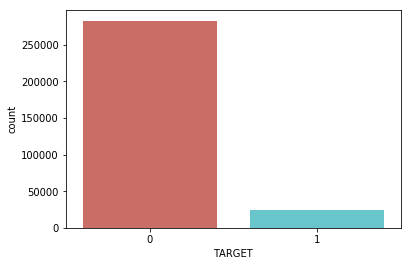

In [30]:
sns.countplot(x='TARGET',data=train,palette='hls')

Data is highly imbalanced.

In [31]:
train.groupby('TARGET').mean()

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL     AMT_CREDIT  \
TARGET                                                                 
0       278244.744536      0.412946     169077.722266  602648.282002   
1       277449.167936      0.463807     165611.760906  557778.527674   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
TARGET                                                              
0       27163.623349    542736.795003                    0.021021   
1       26481.744290    488972.412554                    0.019131   

          DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
TARGET                                                   
0      -16138.176397   65696.146123       -5029.941065   
1      -14884.828077   42394.675448       -4487.127009   

                   ...              FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
TARGET             ...                                                   
0                  ...                      0.008341          0.000605   
1                  ...                      0.005720          0.000483   

        FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
TARGET                                                                   
0               0.000506          0.000315                    0.006380   
1               0.000524          0.000564                    0.006672   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
TARGET                                                          
0                        0.006914                    0.034315   
1                        0.008036                    0.034919   

        AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
TARGET                                                         
0                        0.270697                   0.265939   
1                        0.227926                   0.259923   

        AMT_REQ_CREDIT_BUREAU_YEAR  
TARGET                              
0                         1.889199  
1                         2.028783  

[2 rows x 105 columns]

### dataset: application_train

Text(0,0.5,'Frequency')

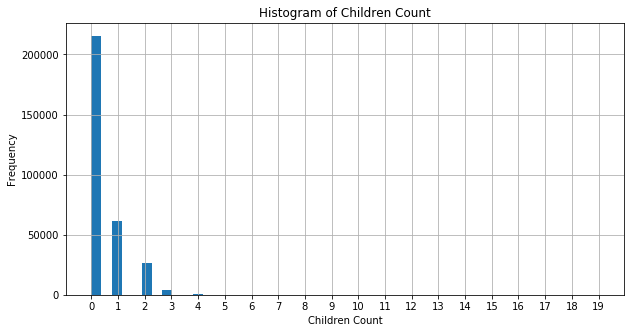

In [3]:
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as ticker
ax = plt.figure(figsize=(10,5)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
#ax.yaxis.set_major_locator(ticker.MultipleLocator(10000))

# Feature 1: CNT_CHILDREN
train.CNT_CHILDREN.hist(bins=50)
plt.title('Histogram of Children Count')
plt.xlabel('Children Count')
plt.ylabel('Frequency')

In [4]:
train.CNT_CHILDREN.value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

Most customers are without children. Note: children count > 7 is for just 0.0068% observations. We may ignore these observations.

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


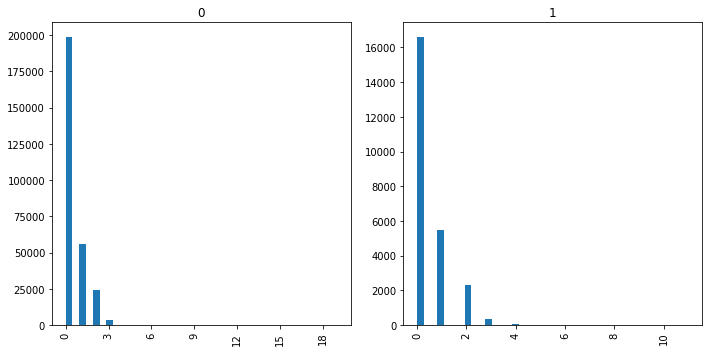

In [24]:
fig, axs = plt.subplots(1, 2,figsize=(10,5), tight_layout=True)
train.hist(column='CNT_CHILDREN',by='TARGET',bins=40,ax=axs)
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

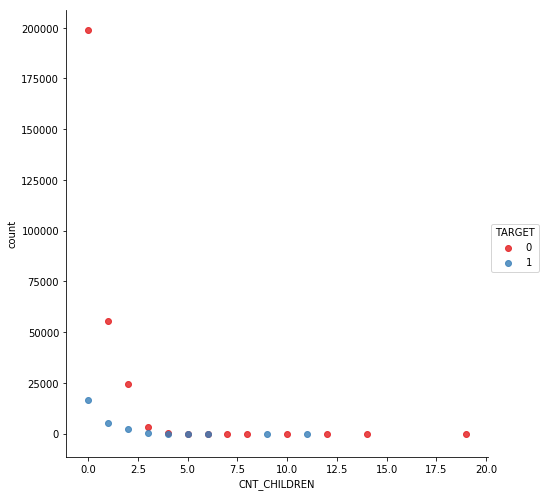

In [28]:
credit_risk_by_children_cnt = train[['CNT_CHILDREN', 'TARGET']].groupby(['CNT_CHILDREN', 'TARGET']).size().reset_index()
credit_risk_by_children_cnt.columns = ['CNT_CHILDREN', 'TARGET', 'count']
sns.lmplot(x = 'CNT_CHILDREN', y = 'count', data = credit_risk_by_children_cnt, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=7)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

Text(0,0.5,'Credit Risk')

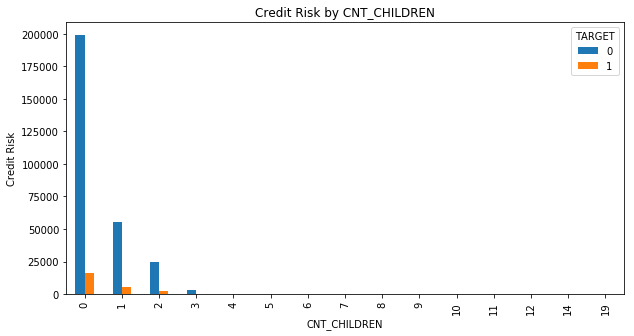

In [33]:
ax=plt.figure(figsize=(10,5)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
pd.crosstab(train['CNT_CHILDREN'],train.TARGET).plot(kind='bar',ax=ax)
plt.title('Credit Risk by CNT_CHILDREN')
plt.xlabel('CNT_CHILDREN')
plt.ylabel('Credit Risk')

CNT_CHILDREN does seem to be influencing the TARGET variable.

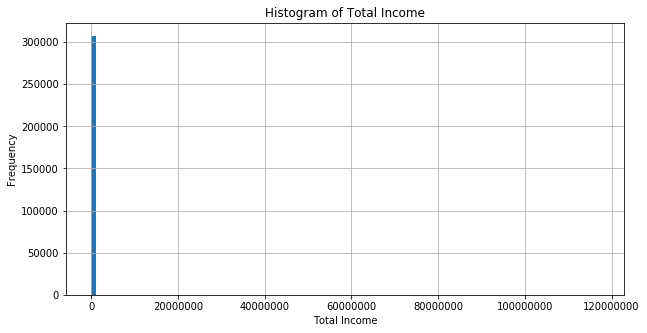

In [46]:
ax = plt.figure(figsize=(10,5)).gca()
# Feature 2: AMT_INCOME_TOTAL
train.AMT_INCOME_TOTAL.hist(bins=100)
plt.title('Histogram of Total Income')
plt.xlabel('Total Income')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


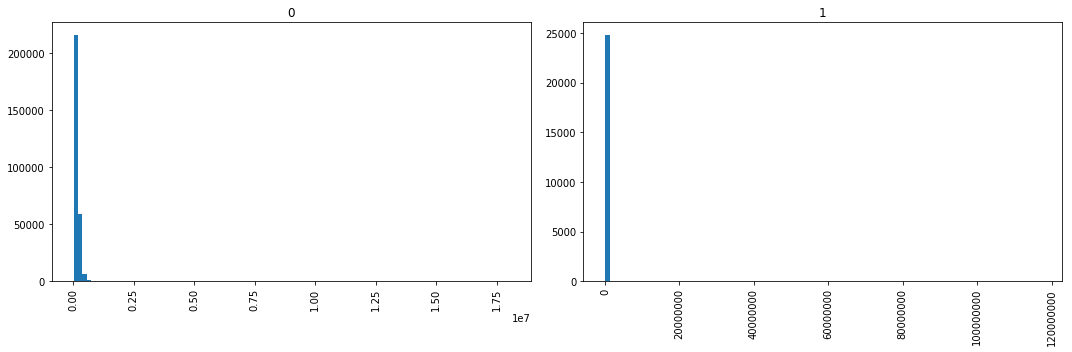

In [45]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='AMT_INCOME_TOTAL',by='TARGET',bins=100,ax=axs)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

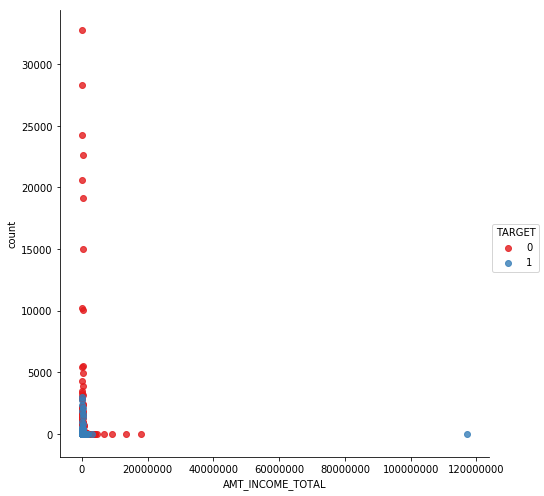

In [50]:
credit_risk_by_tot_incm = train[['AMT_INCOME_TOTAL', 'TARGET']].groupby(['AMT_INCOME_TOTAL', 'TARGET']).size().reset_index()
credit_risk_by_tot_incm.columns = ['AMT_INCOME_TOTAL', 'TARGET', 'count']
sns.lmplot(x = 'AMT_INCOME_TOTAL', y = 'count', data = credit_risk_by_tot_incm, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=7)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

AMT_INCOME_TOTAL data is skewed and hence might need a transformation to see if this can be a good predictor.

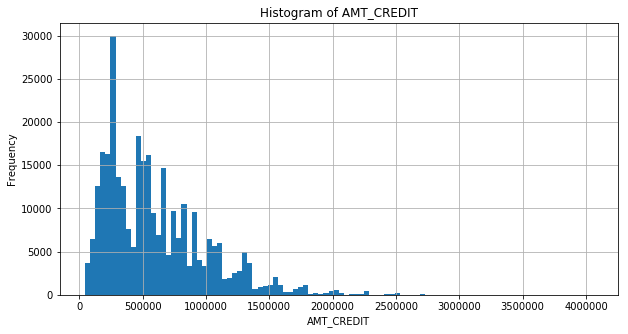

In [47]:
ax = plt.figure(figsize=(10,5)).gca()
# Feature 3: AMT_CREDIT
train.AMT_CREDIT.hist(bins=100)
plt.title('Histogram of AMT_CREDIT')
plt.xlabel('AMT_CREDIT')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


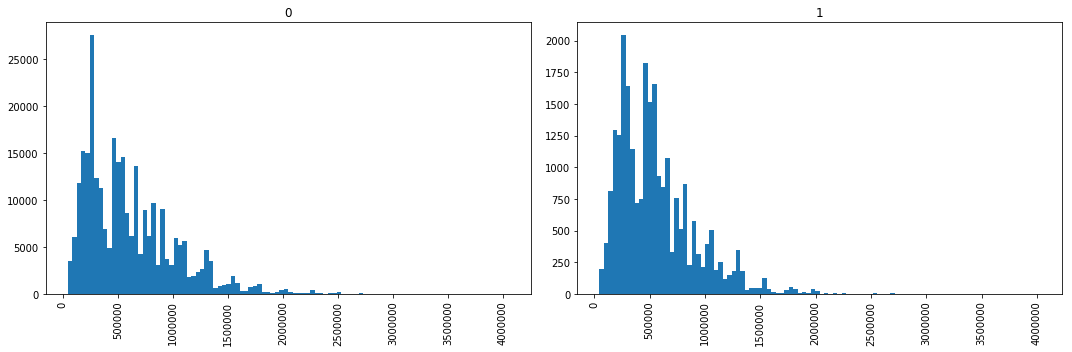

In [48]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='AMT_CREDIT',by='TARGET',bins=100,ax=axs)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

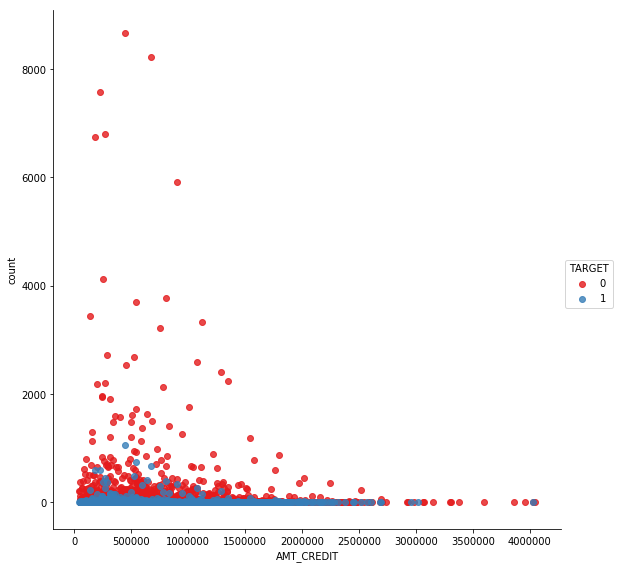

In [55]:
credit_risk_by_credit = train[['AMT_CREDIT', 'TARGET']].groupby(['AMT_CREDIT', 'TARGET']).size().reset_index()
credit_risk_by_credit.columns = ['AMT_CREDIT', 'TARGET', 'count']
sns.lmplot(x = 'AMT_CREDIT', y = 'count', data = credit_risk_by_credit, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=8)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

AMT_CREDIT seems to be a good predictor variable.

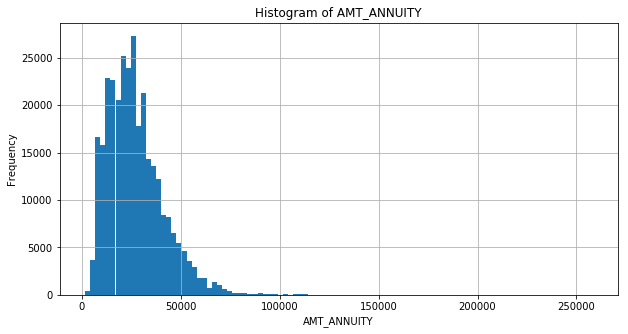

In [52]:
ax = plt.figure(figsize=(10,5)).gca()
# Feature 4: AMT_ANNUITY
train.AMT_ANNUITY.hist(bins=100)
plt.title('Histogram of AMT_ANNUITY')
plt.xlabel('AMT_ANNUITY')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


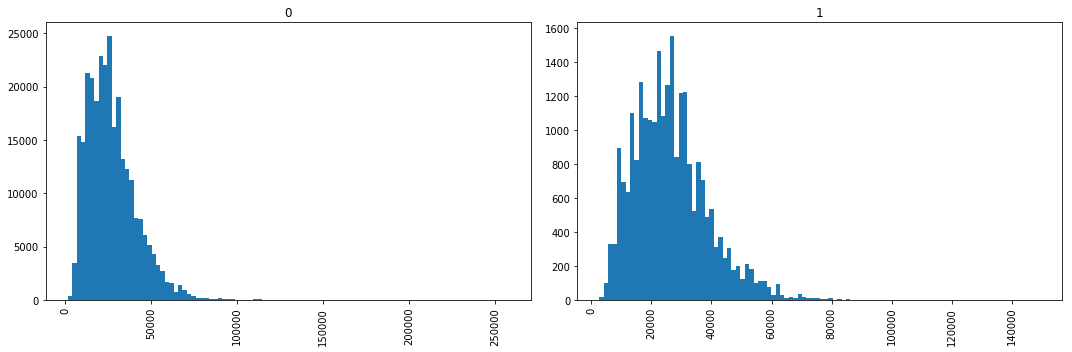

In [53]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='AMT_ANNUITY',by='TARGET',bins=100,ax=axs)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

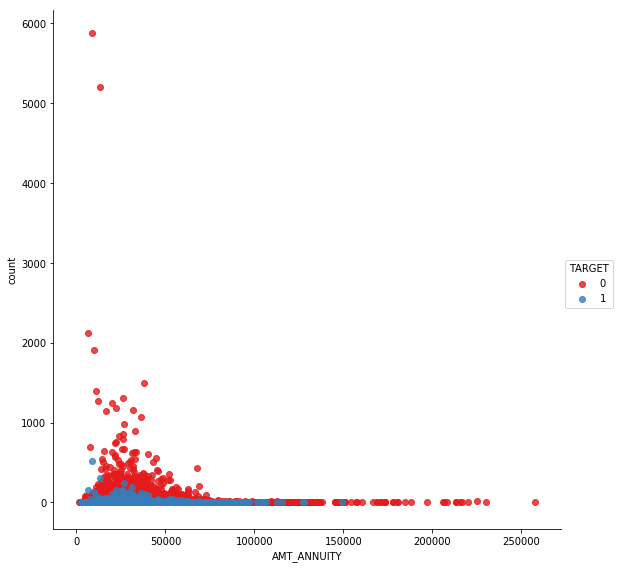

In [56]:
credit_risk_by_annuity = train[['AMT_ANNUITY', 'TARGET']].groupby(['AMT_ANNUITY', 'TARGET']).size().reset_index()
credit_risk_by_annuity.columns = ['AMT_ANNUITY', 'TARGET', 'count']
sns.lmplot(x = 'AMT_ANNUITY', y = 'count', data = credit_risk_by_annuity, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=8)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

AMT_ANNUITY seems to be a good predictor variable.

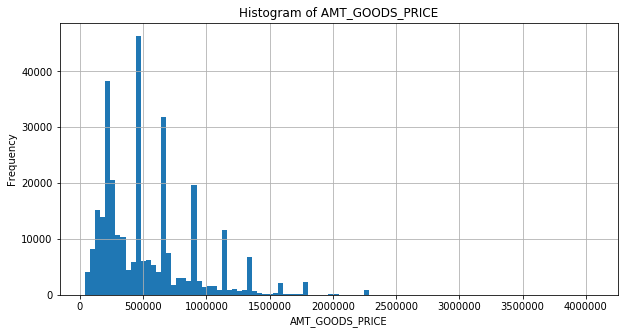

In [57]:
ax = plt.figure(figsize=(10,5)).gca()
# Feature 5: AMT_GOODS_PRICE
train.AMT_GOODS_PRICE.hist(bins=100)
plt.title('Histogram of AMT_GOODS_PRICE')
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


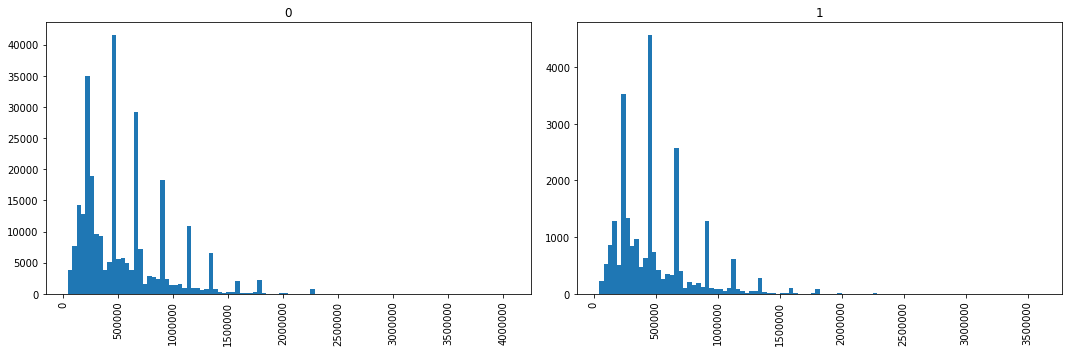

In [58]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='AMT_GOODS_PRICE',by='TARGET',bins=100,ax=axs)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

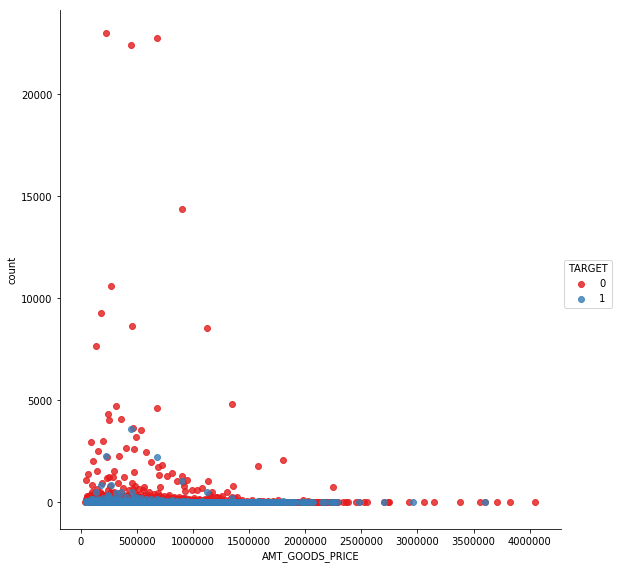

In [59]:
credit_risk_by_AMT_GOODS_PRICE = train[['AMT_GOODS_PRICE', 'TARGET']].groupby(['AMT_GOODS_PRICE', 'TARGET']).size().reset_index()
credit_risk_by_AMT_GOODS_PRICE.columns = ['AMT_GOODS_PRICE', 'TARGET', 'count']
sns.lmplot(x = 'AMT_GOODS_PRICE', y = 'count', data = credit_risk_by_AMT_GOODS_PRICE, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=8)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

AMT_GOODS_PRICE seems to be a good predictor variable.

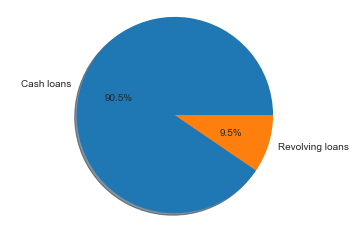

In [49]:
# Feature 6: NAME_CONTRACT_TYPE
temp = train["NAME_CONTRACT_TYPE"].value_counts()
labels = train["NAME_CONTRACT_TYPE"].unique()
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a14bafd30>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


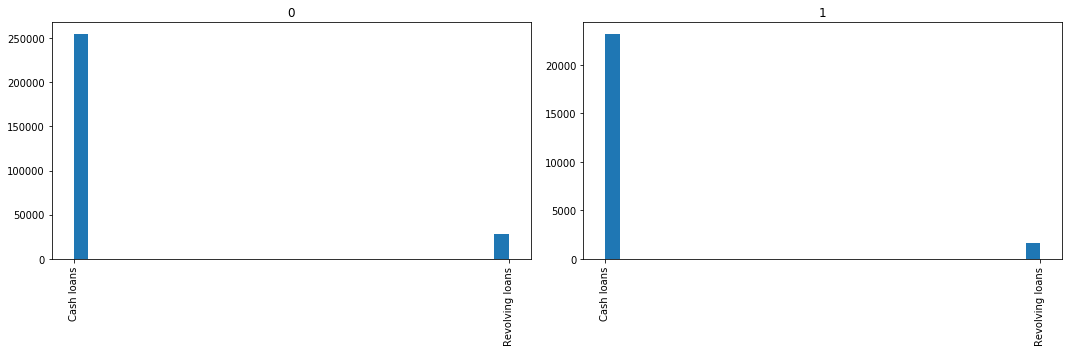

In [64]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='NAME_CONTRACT_TYPE',by='TARGET',bins=30,ax=axs)

In [5]:
train.groupby('NAME_CONTRACT_TYPE').mean()

SK_ID_CURR    TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
NAME_CONTRACT_TYPE                                                            
Cash loans          278125.362338  0.083459      0.410025     169069.513575   
Revolving loans     278704.656375  0.054783      0.483828     166217.017656   

                       AMT_CREDIT   AMT_ANNUITY  AMT_GOODS_PRICE  \
NAME_CONTRACT_TYPE                                                 
Cash loans          627965.732538  28244.263958    560563.664485   
Revolving loans     324017.982172  16316.822637    325724.371573   

                    REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  \
NAME_CONTRACT_TYPE                                                            
Cash loans                            0.020748 -16159.256060   66310.442020   
Revolving loans                       0.022014 -14875.175313   40101.836709   

                               ...              FLAG_DOCUMENT_18  \
NAME_CONTRACT_TYPE             ...                                 
Cash loans                     ...                      0.008349   
Revolving loans                ...                      0.006045   

                    FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
NAME_CONTRACT_TYPE                                                         
Cash loans                  0.000636          0.000561          0.000004   
Revolving loans             0.000205          0.000000          0.003484   

                    AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
NAME_CONTRACT_TYPE                                                          
Cash loans                             0.00639                   0.007183   
Revolving loans                        0.00652                   0.005240   

                    AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
NAME_CONTRACT_TYPE                                                          
Cash loans                            0.035370                   0.271634   
Revolving loans                       0.024641                   0.226529   

                    AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
NAME_CONTRACT_TYPE                                                         
Cash loans                           0.271091                    1.931579  
Revolving loans                      0.211328                    1.595304  

[2 rows x 106 columns]

Text(0,0.5,'Proportion of TARGET')

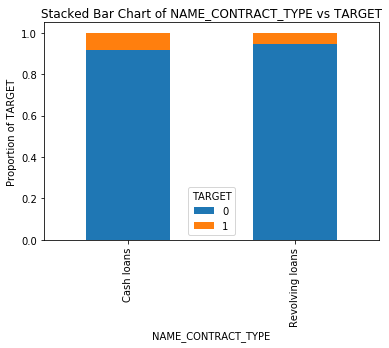

In [6]:
table=pd.crosstab(train.NAME_CONTRACT_TYPE,train.TARGET)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of NAME_CONTRACT_TYPE vs TARGET')
plt.xlabel('NAME_CONTRACT_TYPE')
plt.ylabel('Proportion of TARGET')

The NAME_CONTRACT_TYPE does not seem to be a strong predictor for the outcome variable.

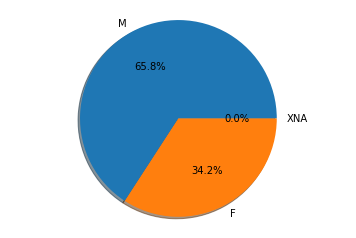

In [67]:
# Feature 7: CODE_GENDER
temp = train["CODE_GENDER"].value_counts()
labels = train["CODE_GENDER"].unique()
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a524e6e80>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


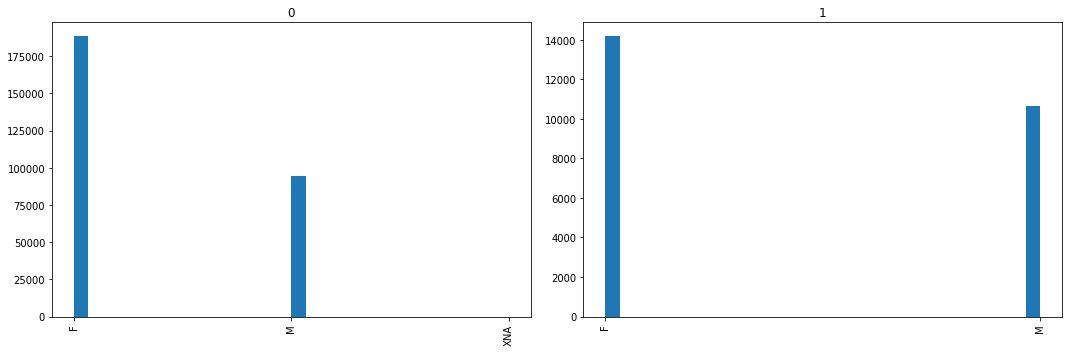

In [68]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='CODE_GENDER',by='TARGET',bins=30,ax=axs)

In [11]:
train.groupby('CODE_GENDER').mean()

SK_ID_CURR    TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
CODE_GENDER                                                            
F            278235.964094  0.069993      0.392397     156032.309247   
M            278076.627828  0.101419      0.464548     193396.482153   
XNA          200636.500000  0.000000      0.750000     186750.000000   

                AMT_CREDIT   AMT_ANNUITY  AMT_GOODS_PRICE  \
CODE_GENDER                                                 
F            592766.717305  26304.815242    532406.220509   
M            611095.197084  28657.681177    549942.314404   
XNA          399375.000000  19968.750000    421875.000000   

             REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  \
CODE_GENDER                                                            
F                              0.020728 -16502.507177   79693.262759   
M                              0.021138 -15140.050562   33220.412187   
XNA                            0.029672 -13561.250000   -4090.500000   

                        ...              FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
CODE_GENDER             ...                                                   
F                       ...                      0.006693          0.000514   
M                       ...                      0.010899          0.000752   
XNA                     ...                      0.000000          0.000000   

             FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
CODE_GENDER                                                                   
F                    0.000454          0.000020                    0.006212   
M                    0.000609          0.000942                    0.006776   
XNA                  0.000000          0.000000                    0.000000   

             AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
CODE_GENDER                                                          
F                             0.006910                    0.034590   
M                             0.007178                    0.033915   
XNA                           0.000000                    0.000000   

             AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
CODE_GENDER                                                         
F                             0.261551                   0.269703   
M                             0.278855                   0.257166   
XNA                           0.750000                   0.250000   

             AMT_REQ_CREDIT_BUREAU_YEAR  
CODE_GENDER                              
F                              1.924312  
M                              1.852091  
XNA                            3.500000  

[3 rows x 106 columns]

Text(0,0.5,'Proportion of TARGET')

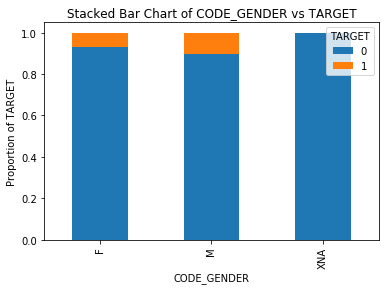

In [7]:
table=pd.crosstab(train.CODE_GENDER,train.TARGET)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of CODE_GENDER vs TARGET')
plt.xlabel('CODE_GENDER')
plt.ylabel('Proportion of TARGET')

In [8]:
train.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

1. XNA denote NA or Unknown - =~0.0% (Only 4 observations and hence, can be dropped)
2. Clearly F:M ratios differ for TARGET=0 and TARGET=1
3. CODE_GENDER maybe a good feature to consider for classification.

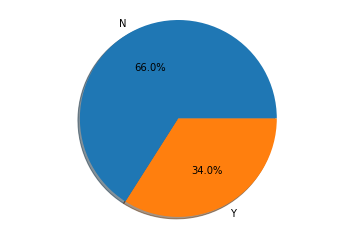

In [69]:
# Feature 8: FLAG_OWN_CAR
temp = train["FLAG_OWN_CAR"].value_counts()
labels = train["FLAG_OWN_CAR"].unique()
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e736cf8>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


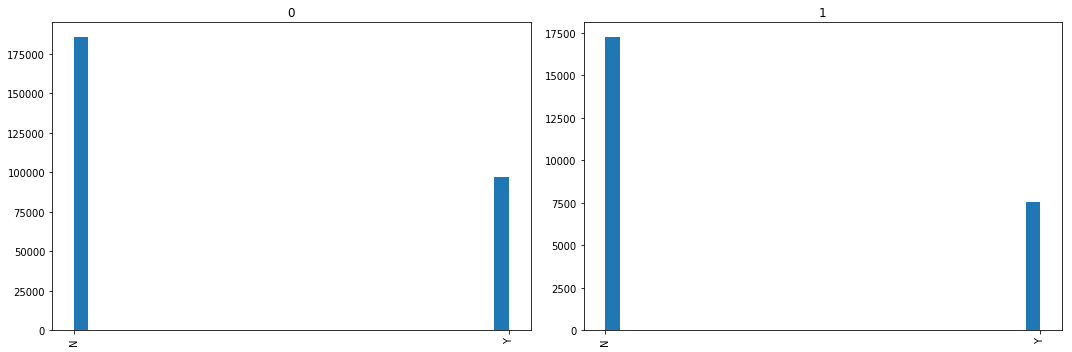

In [70]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='FLAG_OWN_CAR',by='TARGET',bins=30,ax=axs)

In [12]:
train.groupby('FLAG_OWN_CAR').mean()

SK_ID_CURR    TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
FLAG_OWN_CAR                                                            
N             278090.776133  0.085002      0.364161     154603.326933   
Y             278354.640558  0.072437      0.519673     196338.851352   

                 AMT_CREDIT   AMT_ANNUITY  AMT_GOODS_PRICE  \
FLAG_OWN_CAR                                                 
N             565442.540961  25635.303918    506464.376570   
Y             664186.007950  29967.028169    600266.782129   

              REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  \
FLAG_OWN_CAR                                                            
N                               0.020458 -16443.900707   79478.970388   
Y                               0.021664 -15247.500005   33423.255223   

                         ...              FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
FLAG_OWN_CAR             ...                                                   
N                        ...                      0.008136          0.000557   
Y                        ...                      0.008118          0.000669   

              FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
FLAG_OWN_CAR                                                                   
N                     0.000389          0.000246                    0.006239   
Y                     0.000736          0.000507                    0.006709   

              AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
FLAG_OWN_CAR                                                          
N                              0.006954                    0.034326   
Y                              0.007087                    0.034430   

              AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
FLAG_OWN_CAR                                                         
N                              0.253692                   0.271238   
Y                              0.293070                   0.254675   

              AMT_REQ_CREDIT_BUREAU_YEAR  
FLAG_OWN_CAR                              
N                               1.949610  
Y                               1.806979  

[2 rows x 106 columns]

Text(0,0.5,'Proportion of TARGET')

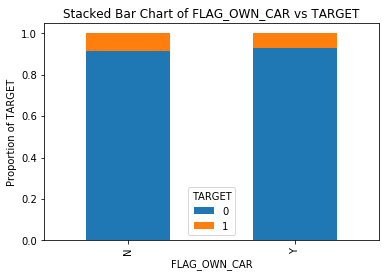

In [9]:
table=pd.crosstab(train.FLAG_OWN_CAR,train.TARGET)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of FLAG_OWN_CAR vs TARGET')
plt.xlabel('FLAG_OWN_CAR')
plt.ylabel('Proportion of TARGET')

FLAG_OWN_CAR may not be a good predictor of the outcome.

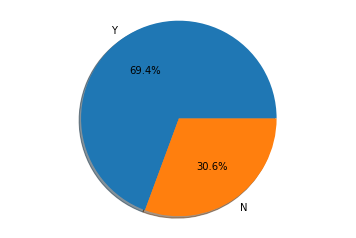

In [71]:
# Feature 9: FLAG_OWN_REALTY
temp = train["FLAG_OWN_REALTY"].value_counts()
labels = train["FLAG_OWN_REALTY"].unique()
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a4bcb7e80>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


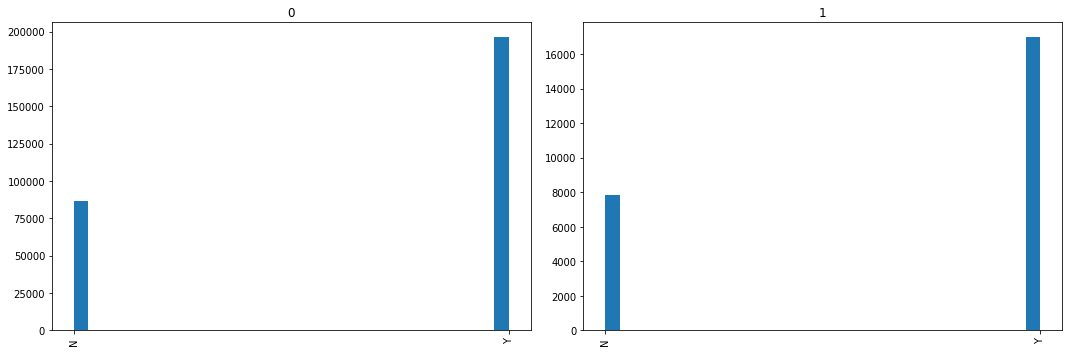

In [72]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='FLAG_OWN_REALTY',by='TARGET',bins=30,ax=axs)

In [13]:
train.groupby('FLAG_OWN_REALTY').mean()

SK_ID_CURR    TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
FLAG_OWN_REALTY                                                            
N                278071.779159  0.083249      0.419622     167750.922371   
Y                278228.538118  0.079616      0.415917     169260.275205   

                    AMT_CREDIT   AMT_ANNUITY  AMT_GOODS_PRICE  \
FLAG_OWN_REALTY                                                 
N                622810.942568  27222.540217    563706.827164   
Y                588522.522017  27058.250264    527213.823616   

                 REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  \
FLAG_OWN_REALTY                                                            
N                                  0.020552 -15254.565516   49002.104407   
Y                                  0.021008 -16382.517500   70356.470091   

                            ...              FLAG_DOCUMENT_18  \
FLAG_OWN_REALTY             ...                                 
N                           ...                      0.019979   
Y                           ...                      0.002897   

                 FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
FLAG_OWN_REALTY                                                         
N                        0.001306          0.001359          0.000340   
Y                        0.000281          0.000131          0.000333   

                 AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
FLAG_OWN_REALTY                                                          
N                                  0.006918                   0.008532   
Y                                  0.006171                   0.006313   

                 AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
FLAG_OWN_REALTY                                                          
N                                  0.032078                   0.273522   
Y                                  0.035387                   0.264646   

                 AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
FLAG_OWN_REALTY                                                         
N                                 0.247160                    1.711756  
Y                                 0.273693                    1.984439  

[2 rows x 106 columns]

Text(0,0.5,'Proportion of TARGET')

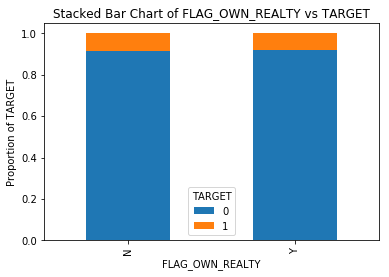

In [10]:
table=pd.crosstab(train.FLAG_OWN_REALTY,train.TARGET)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of FLAG_OWN_REALTY vs TARGET')
plt.xlabel('FLAG_OWN_REALTY')
plt.ylabel('Proportion of TARGET')

The FLAG_OWN_REALTY does not seem to be a strong predictor for the outcome variable.

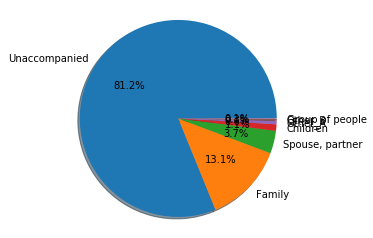

In [95]:
# Feature 10: NAME_TYPE_SUITE
temp = train["NAME_TYPE_SUITE"].value_counts()
labels = train["NAME_TYPE_SUITE"].unique()
# handle nan
labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a51949be0>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


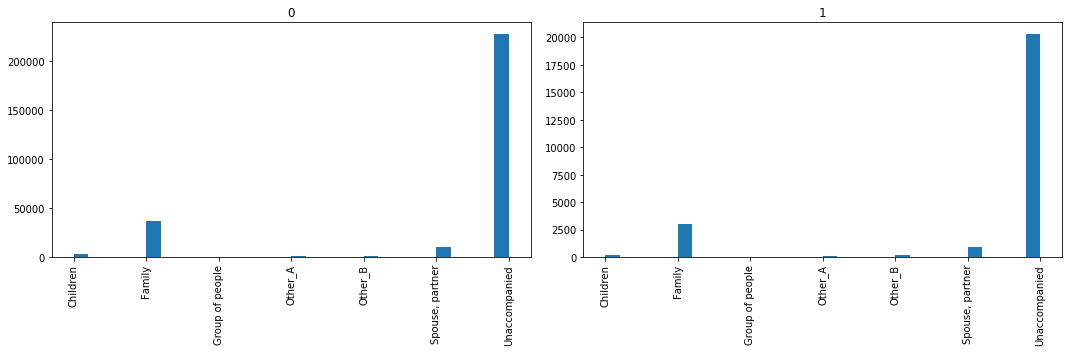

In [96]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='NAME_TYPE_SUITE',by='TARGET',bins=30,ax=axs)

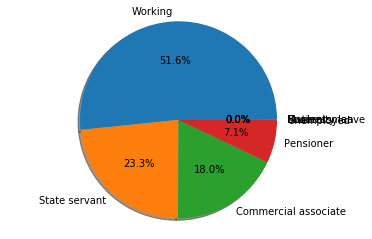

In [97]:
# Feature 11: NAME_INCOME_TYPE
temp = train["NAME_INCOME_TYPE"].value_counts()
labels = train["NAME_INCOME_TYPE"].unique()
# handle nan
#labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a512e5278>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


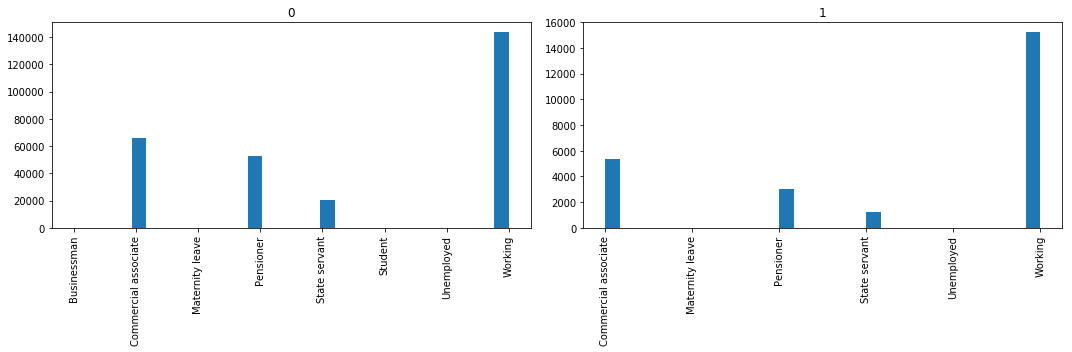

In [98]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='NAME_INCOME_TYPE',by='TARGET',bins=30,ax=axs)

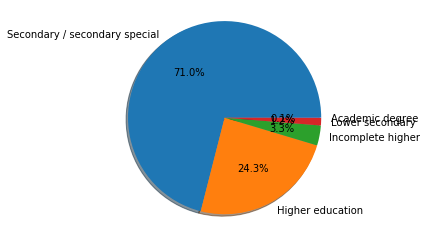

In [103]:
# Feature 12: NAME_EDUCATION_TYPE
temp = train["NAME_EDUCATION_TYPE"].value_counts()
labels = train["NAME_EDUCATION_TYPE"].unique()
# handle nan
#labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a4b90bf28>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


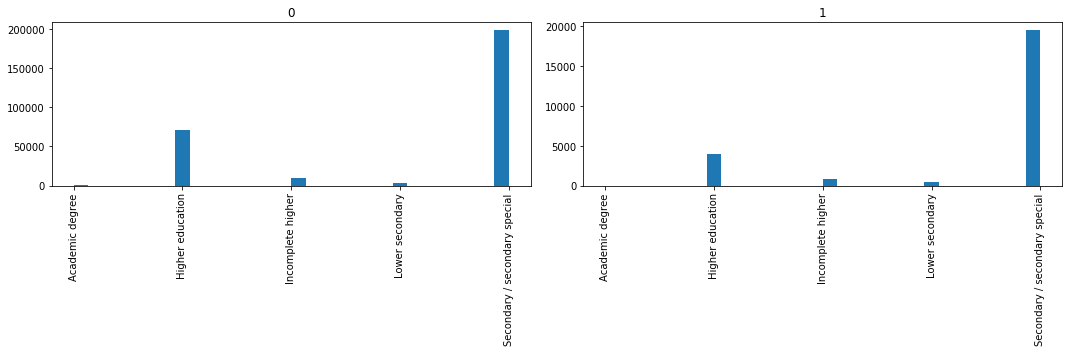

In [100]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='NAME_EDUCATION_TYPE',by='TARGET',bins=30,ax=axs)

NAME_EDUCATION_TYPE maybe a good predictor variable.

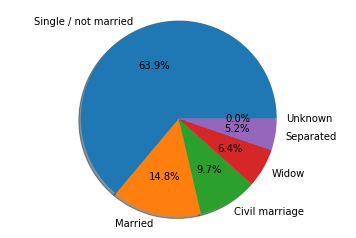

In [104]:
# Feature 13: NAME_FAMILY_STATUS
temp = train["NAME_FAMILY_STATUS"].value_counts()
labels = train["NAME_FAMILY_STATUS"].unique()
# handle nan
#labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a4bc02748>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


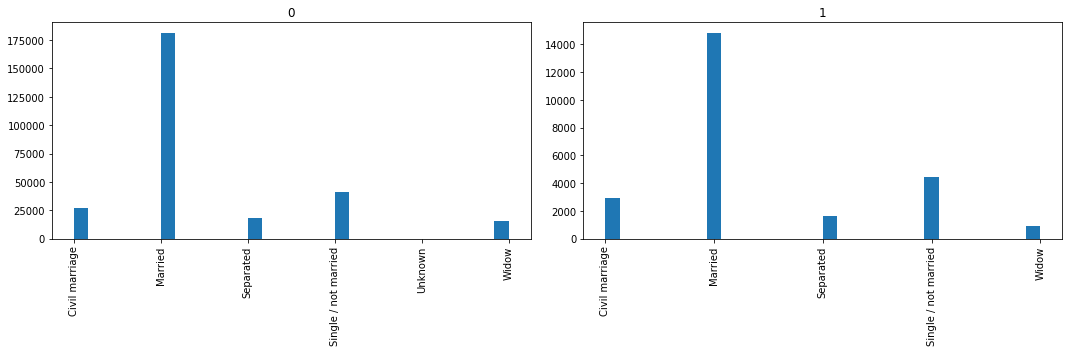

In [105]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='NAME_FAMILY_STATUS',by='TARGET',bins=30,ax=axs)

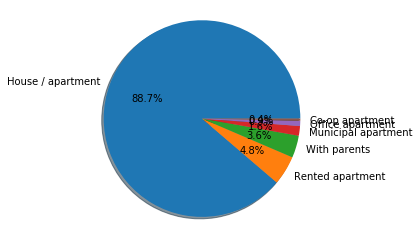

In [106]:
# Feature 14: NAME_HOUSING_TYPE
temp = train["NAME_HOUSING_TYPE"].value_counts()
labels = train["NAME_HOUSING_TYPE"].unique()
# handle nan
#labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a529eb320>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


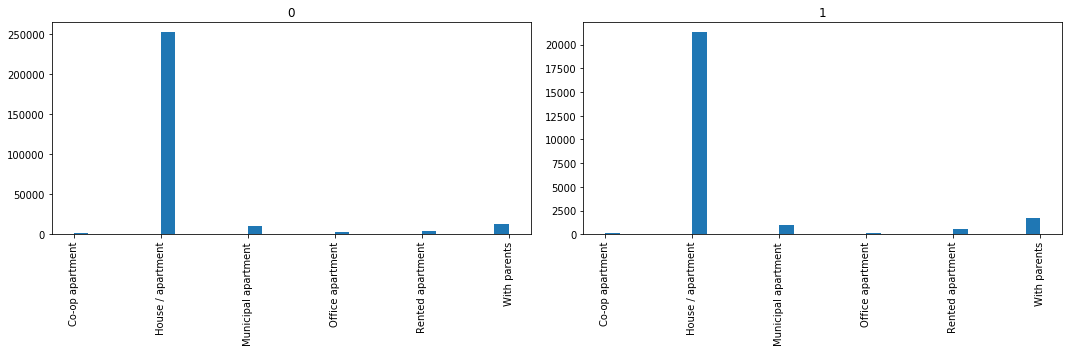

In [107]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='NAME_HOUSING_TYPE',by='TARGET',bins=30,ax=axs)

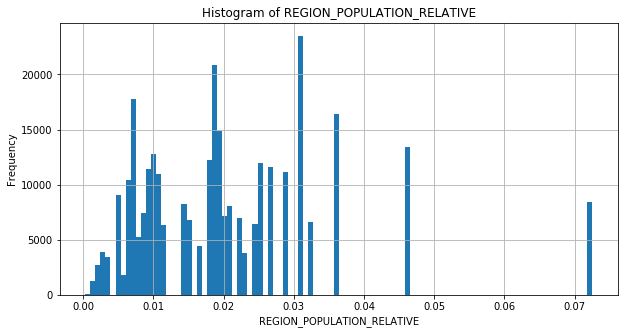

In [108]:
# Feature 15: REGION_POPULATION_RELATIVE
ax = plt.figure(figsize=(10,5)).gca()
train.REGION_POPULATION_RELATIVE.hist(bins=100)
plt.title('Histogram of REGION_POPULATION_RELATIVE')
plt.xlabel('REGION_POPULATION_RELATIVE')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


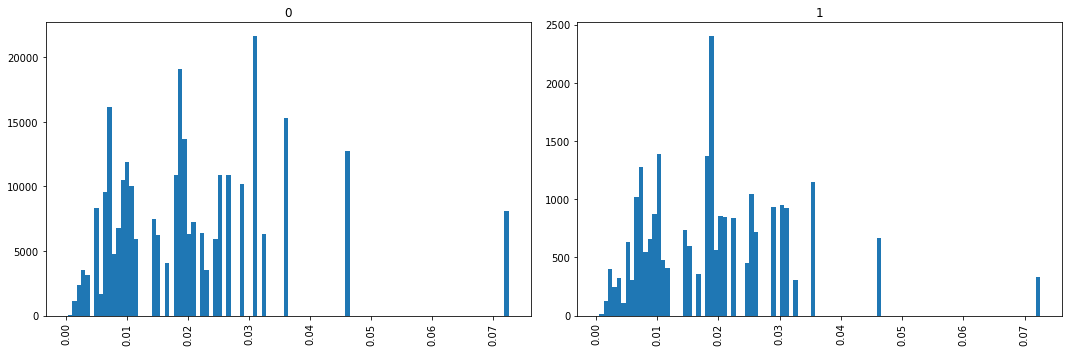

In [109]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='REGION_POPULATION_RELATIVE',by='TARGET',bins=100,ax=axs)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

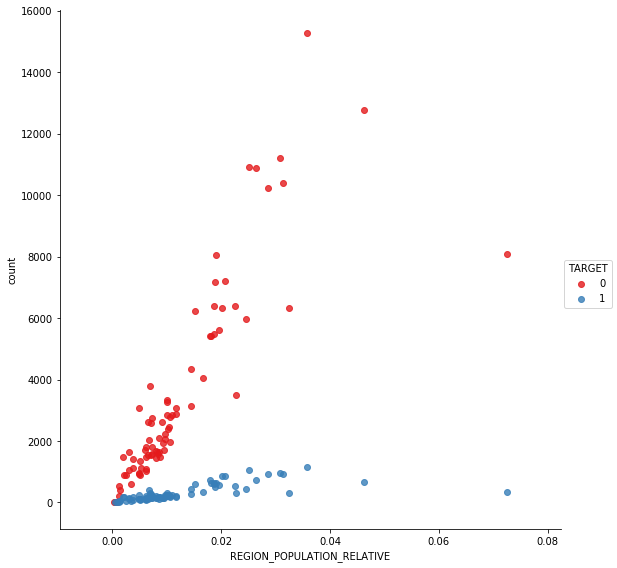

In [110]:
credit_risk_by_REGION_POPULATION_RELATIVE = train[['REGION_POPULATION_RELATIVE', 'TARGET']].groupby(['REGION_POPULATION_RELATIVE', 'TARGET']).size().reset_index()
credit_risk_by_REGION_POPULATION_RELATIVE.columns = ['REGION_POPULATION_RELATIVE', 'TARGET', 'count']
sns.lmplot(x = 'REGION_POPULATION_RELATIVE', y = 'count', data = credit_risk_by_REGION_POPULATION_RELATIVE, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=8)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

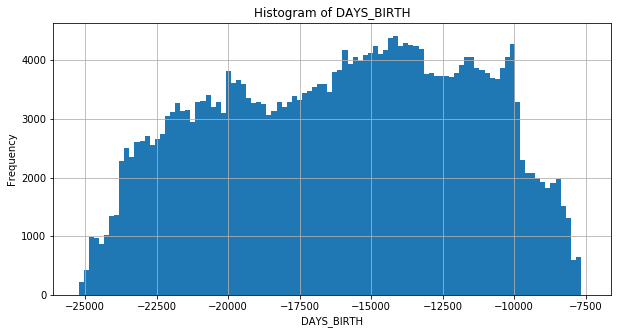

In [111]:
# Feature 16: DAYS_BIRTH
ax = plt.figure(figsize=(10,5)).gca()
train.DAYS_BIRTH.hist(bins=100)
plt.title('Histogram of DAYS_BIRTH')
plt.xlabel('DAYS_BIRTH')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


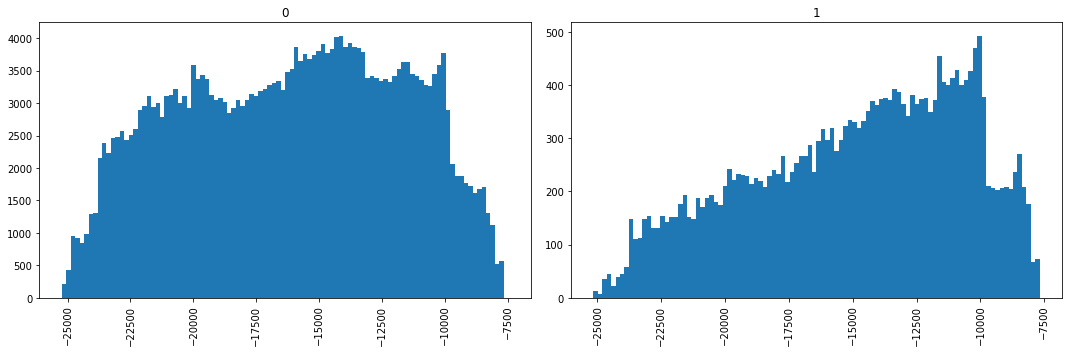

In [113]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='DAYS_BIRTH',by='TARGET',bins=100,ax=axs)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

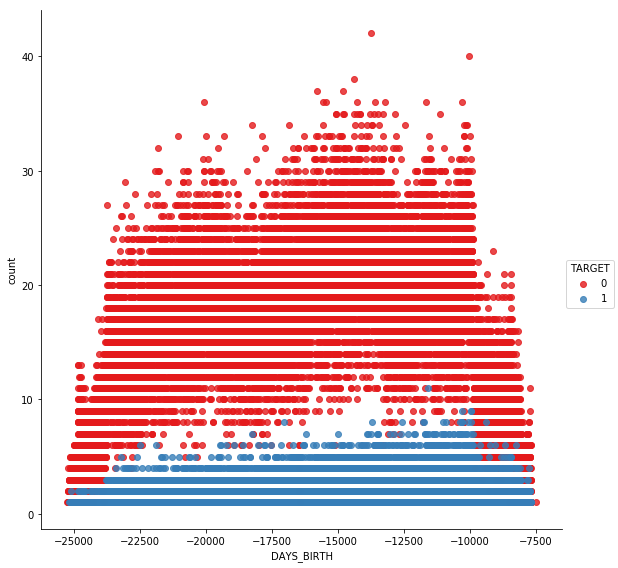

In [114]:
credit_risk_by_DAYS_BIRTH = train[['DAYS_BIRTH', 'TARGET']].groupby(['DAYS_BIRTH', 'TARGET']).size().reset_index()
credit_risk_by_DAYS_BIRTH.columns = ['DAYS_BIRTH', 'TARGET', 'count']
sns.lmplot(x = 'DAYS_BIRTH', y = 'count', data = credit_risk_by_DAYS_BIRTH, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=8)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

DAYS_BIRTH looks to be a good predictor variable.

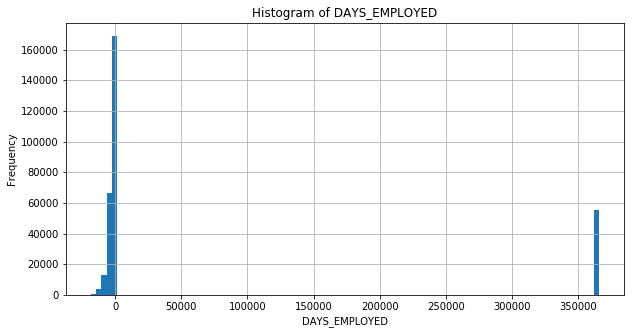

In [115]:
# Feature 17: DAYS_EMPLOYED
ax = plt.figure(figsize=(10,5)).gca()
train.DAYS_EMPLOYED.hist(bins=100)
plt.title('Histogram of DAYS_EMPLOYED')
plt.xlabel('DAYS_EMPLOYED')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


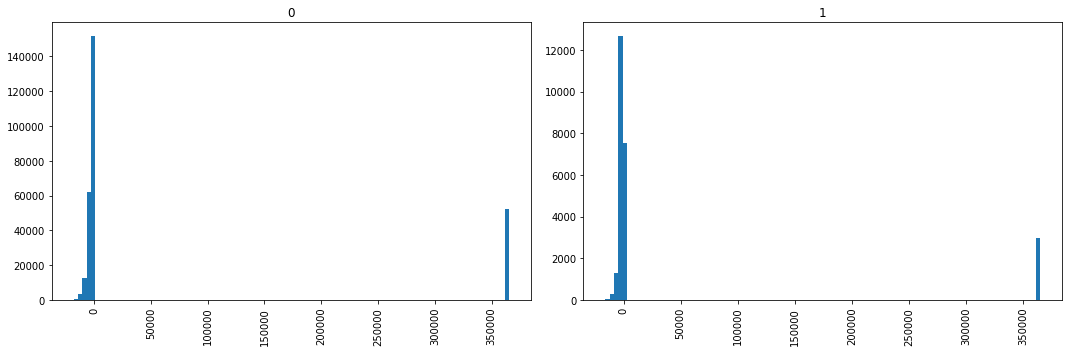

In [116]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='DAYS_EMPLOYED',by='TARGET',bins=100,ax=axs)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

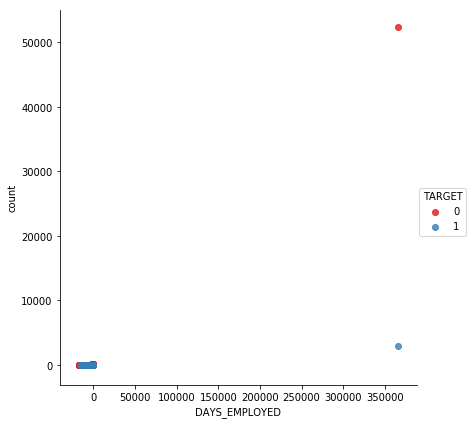

In [118]:
credit_risk_by_DAYS_EMPLOYED = train[['DAYS_EMPLOYED', 'TARGET']].groupby(['DAYS_EMPLOYED', 'TARGET']).size().reset_index()
credit_risk_by_DAYS_EMPLOYED.columns = ['DAYS_EMPLOYED', 'TARGET', 'count']
sns.lmplot(x = 'DAYS_EMPLOYED', y = 'count', data = credit_risk_by_DAYS_EMPLOYED, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=6)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

DAYS_EMPLOYED maybe a good predictor variable.

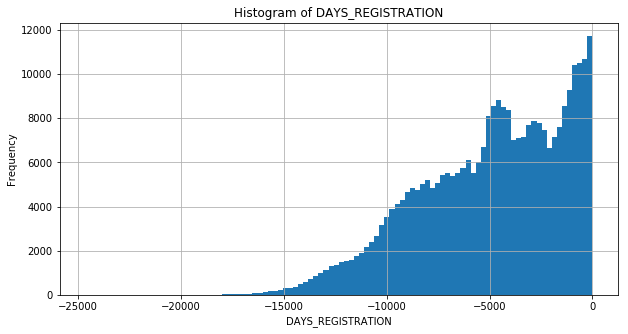

In [119]:
# Feature 18: DAYS_REGISTRATION
ax = plt.figure(figsize=(10,5)).gca()
train.DAYS_REGISTRATION.hist(bins=100)
plt.title('Histogram of DAYS_REGISTRATION')
plt.xlabel('DAYS_REGISTRATION')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


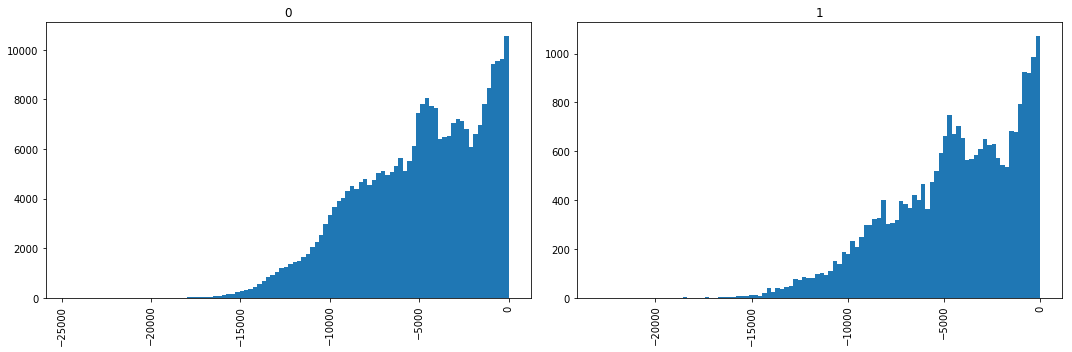

In [120]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='DAYS_REGISTRATION',by='TARGET',bins=100,ax=axs)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

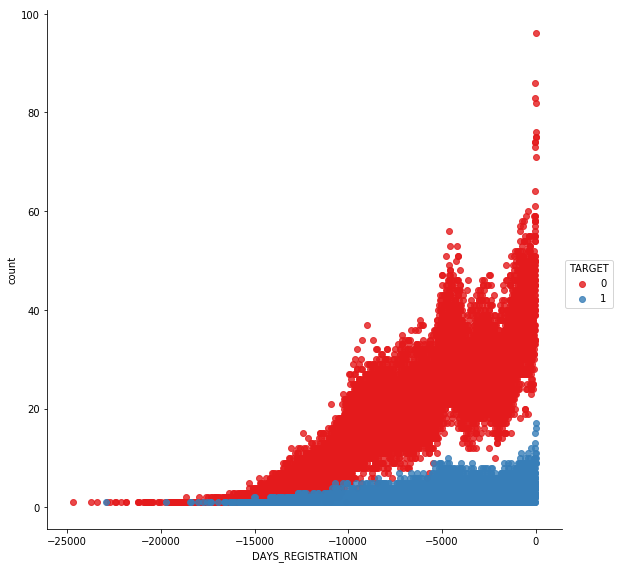

In [122]:
credit_risk_by_DAYS_REGISTRATION = train[['DAYS_REGISTRATION', 'TARGET']].groupby(['DAYS_REGISTRATION', 'TARGET']).size().reset_index()
credit_risk_by_DAYS_REGISTRATION.columns = ['DAYS_REGISTRATION', 'TARGET', 'count']
sns.lmplot(x = 'DAYS_REGISTRATION', y = 'count', data = credit_risk_by_DAYS_REGISTRATION, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=8)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

DAYS_REGISTRATION looks to be a good predictor variable.

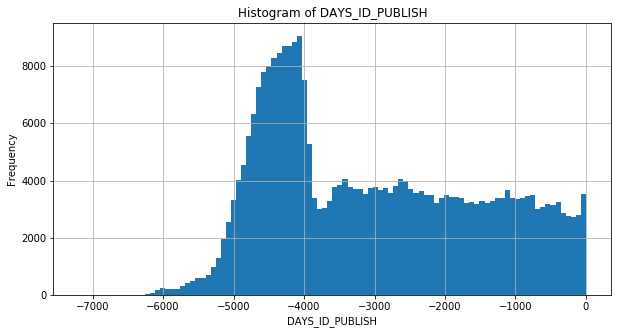

In [123]:
# Feature 19: DAYS_ID_PUBLISH
ax = plt.figure(figsize=(10,5)).gca()
train.DAYS_ID_PUBLISH.hist(bins=100)
plt.title('Histogram of DAYS_ID_PUBLISH')
plt.xlabel('DAYS_ID_PUBLISH')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


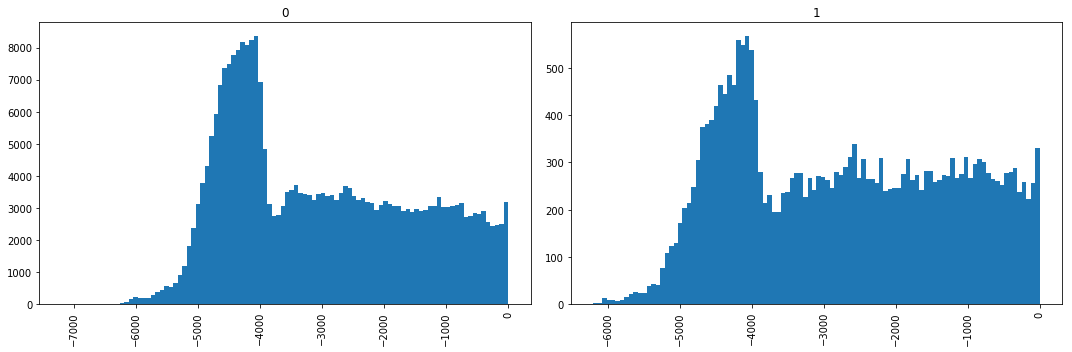

In [124]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='DAYS_ID_PUBLISH',by='TARGET',bins=100,ax=axs)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

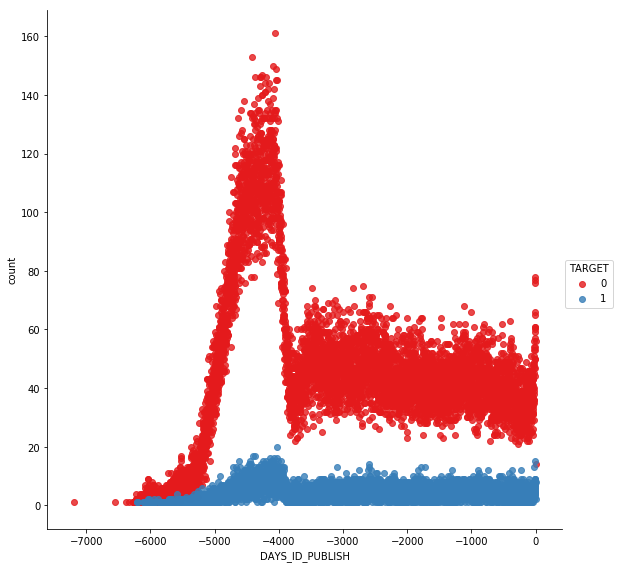

In [125]:
credit_risk_by_DAYS_ID_PUBLISH = train[['DAYS_ID_PUBLISH', 'TARGET']].groupby(['DAYS_ID_PUBLISH', 'TARGET']).size().reset_index()
credit_risk_by_DAYS_ID_PUBLISH.columns = ['DAYS_ID_PUBLISH', 'TARGET', 'count']
sns.lmplot(x = 'DAYS_ID_PUBLISH', y = 'count', data = credit_risk_by_DAYS_ID_PUBLISH, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=8)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

DAYS_ID_PUBLISH looks to be a good predictor variable.

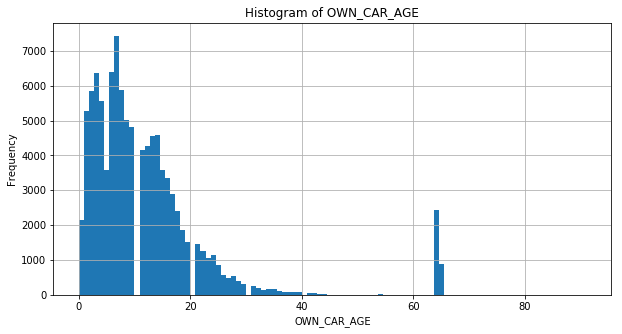

In [126]:
# Feature 20: OWN_CAR_AGE
ax = plt.figure(figsize=(10,5)).gca()
train.OWN_CAR_AGE.hist(bins=100)
plt.title('Histogram of OWN_CAR_AGE')
plt.xlabel('OWN_CAR_AGE')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


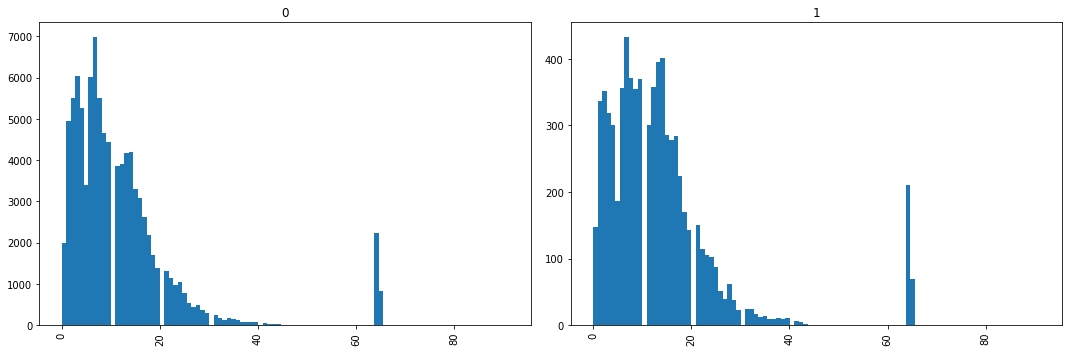

In [127]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='OWN_CAR_AGE',by='TARGET',bins=100,ax=axs)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

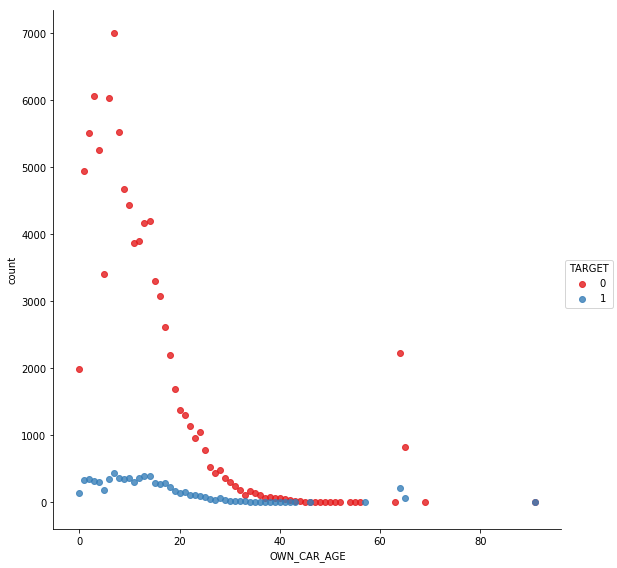

In [128]:
credit_risk_by_OWN_CAR_AGE = train[['OWN_CAR_AGE', 'TARGET']].groupby(['OWN_CAR_AGE', 'TARGET']).size().reset_index()
credit_risk_by_OWN_CAR_AGE.columns = ['OWN_CAR_AGE', 'TARGET', 'count']
sns.lmplot(x = 'OWN_CAR_AGE', y = 'count', data = credit_risk_by_OWN_CAR_AGE, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=8)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

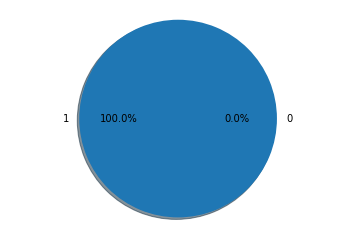

In [129]:
# Feature 21: FLAG_MOBIL
temp = train["FLAG_MOBIL"].value_counts()
labels = train["FLAG_MOBIL"].unique()
# handle nan
#labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

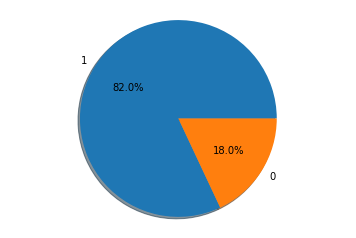

In [131]:
# Feature 22: FLAG_EMP_PHONE
temp = train["FLAG_EMP_PHONE"].value_counts()
labels = train["FLAG_EMP_PHONE"].unique()
# handle nan
#labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


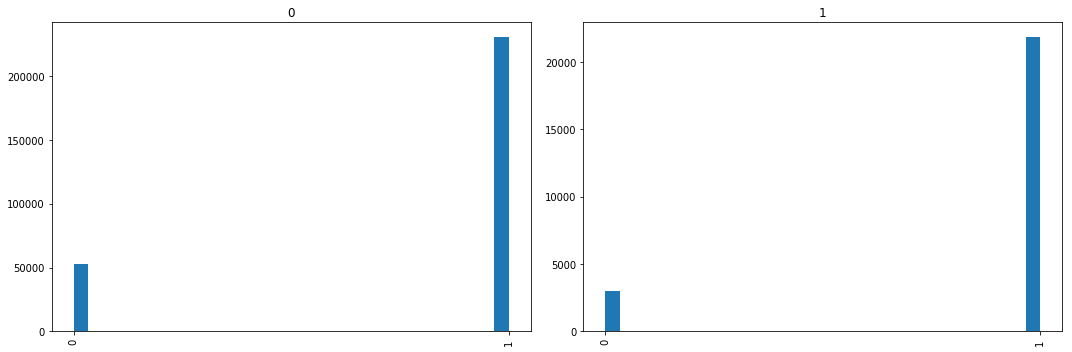

In [164]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='FLAG_EMP_PHONE',by='TARGET',bins=30,ax=axs)
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

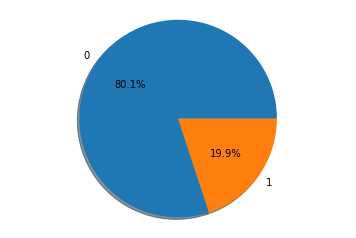

In [133]:
# Feature 23: FLAG_WORK_PHONE
temp = train["FLAG_WORK_PHONE"].value_counts()
labels = train["FLAG_WORK_PHONE"].unique()
# handle nan
#labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


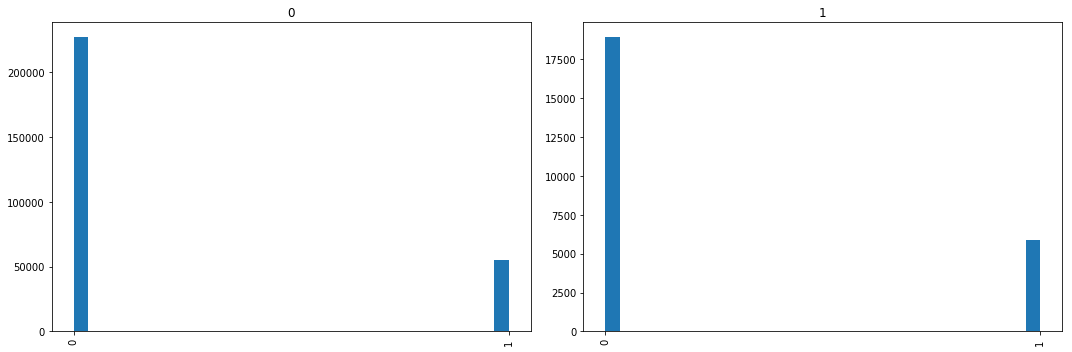

In [165]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='FLAG_WORK_PHONE',by='TARGET',bins=30,ax=axs)
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

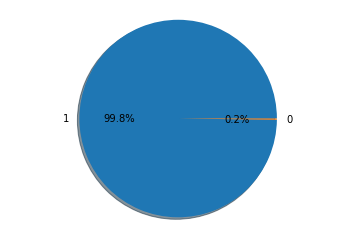

In [135]:
# Feature 24: FLAG_CONT_MOBILE
temp = train["FLAG_CONT_MOBILE"].value_counts()
labels = train["FLAG_CONT_MOBILE"].unique()
# handle nan
#labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


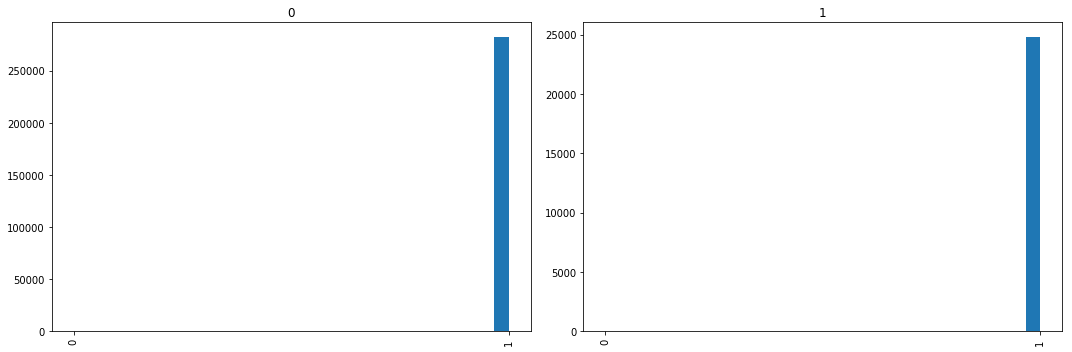

In [166]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='FLAG_CONT_MOBILE',by='TARGET',bins=30,ax=axs)
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

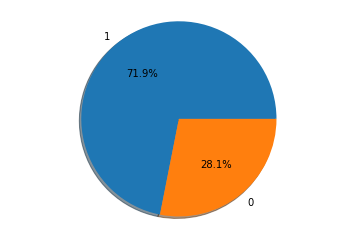

In [137]:
# Feature 25: FLAG_PHONE
temp = train["FLAG_PHONE"].value_counts()
labels = train["FLAG_PHONE"].unique()
# handle nan
#labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


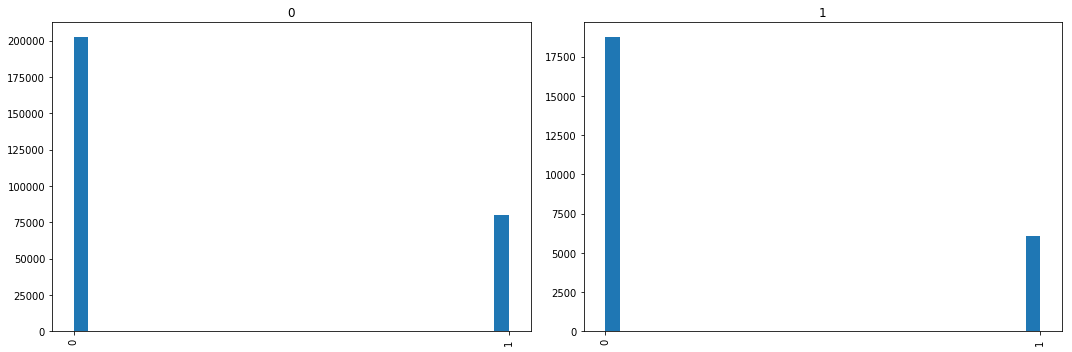

In [167]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='FLAG_PHONE',by='TARGET',bins=30,ax=axs)
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

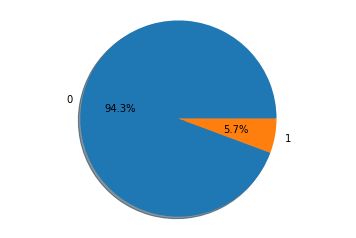

In [139]:
# Feature 26: FLAG_EMAIL
temp = train["FLAG_EMAIL"].value_counts()
labels = train["FLAG_EMAIL"].unique()
# handle nan
#labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


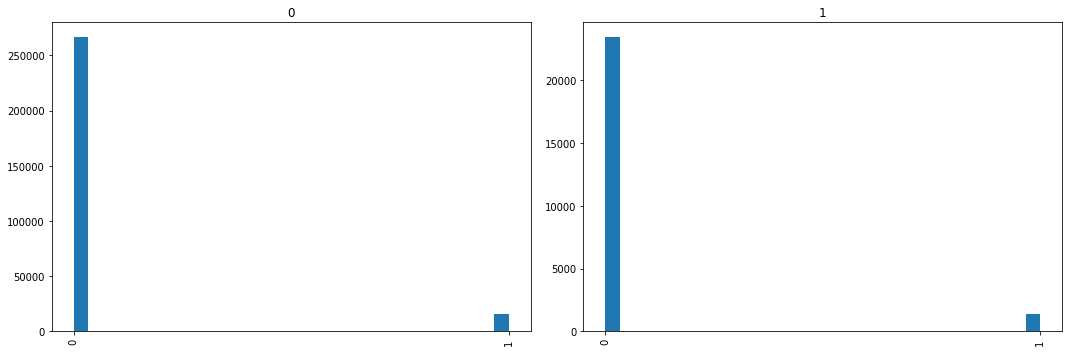

In [168]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='FLAG_EMAIL',by='TARGET',bins=30,ax=axs)
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

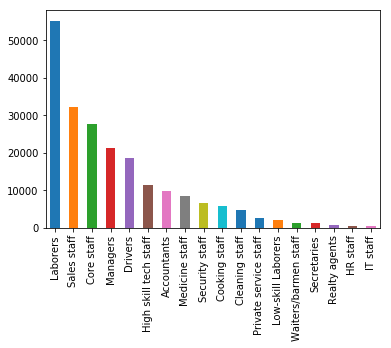

In [147]:
# Feature 27: OCCUPATION_TYPE
temp = train["OCCUPATION_TYPE"].value_counts()
temp.plot.bar()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a58608eb8>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


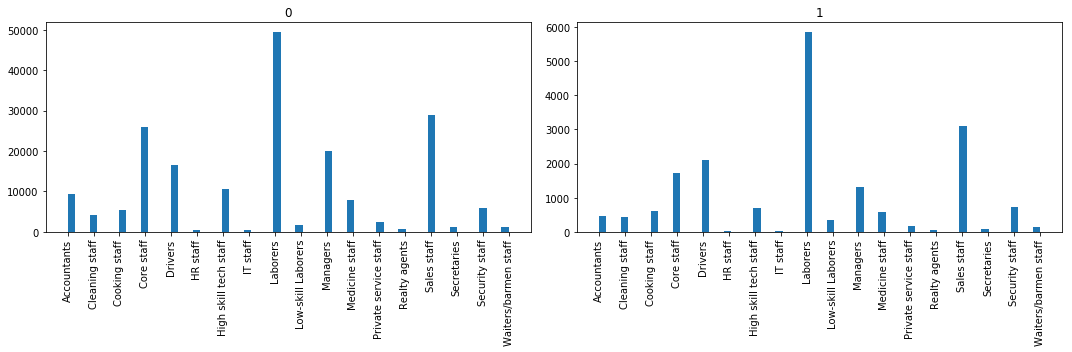

In [149]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='OCCUPATION_TYPE',by='TARGET',bins=60,ax=axs)

Text(0,0.5,'Frequency')

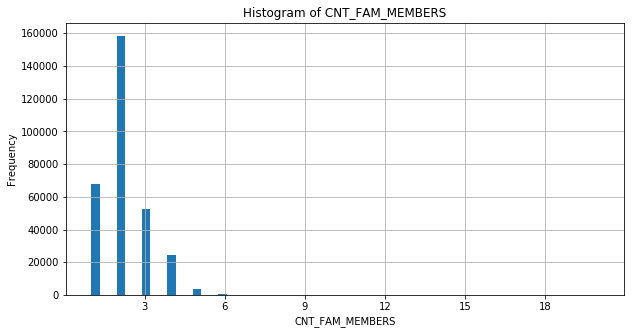

In [152]:
# Feature 28: CNT_FAM_MEMBERS
ax = plt.figure(figsize=(10,5)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.CNT_FAM_MEMBERS.hist(bins=60)
plt.title('Histogram of CNT_FAM_MEMBERS')
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('Frequency')

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


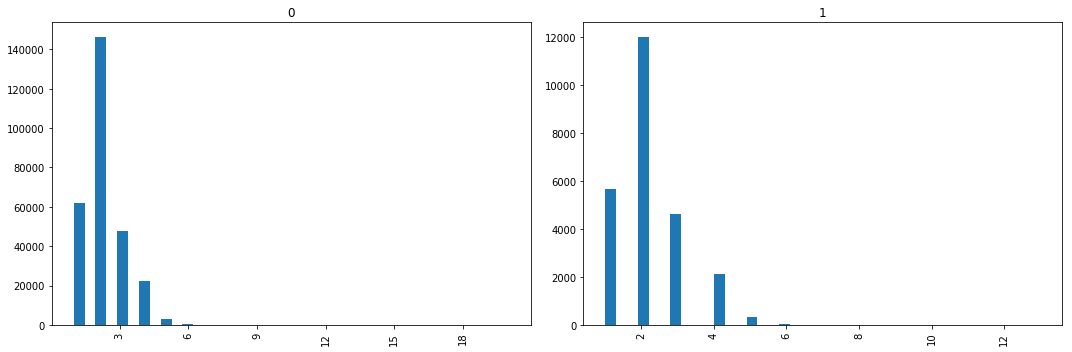

In [157]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='CNT_FAM_MEMBERS',by='TARGET',bins=40,ax=axs)
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

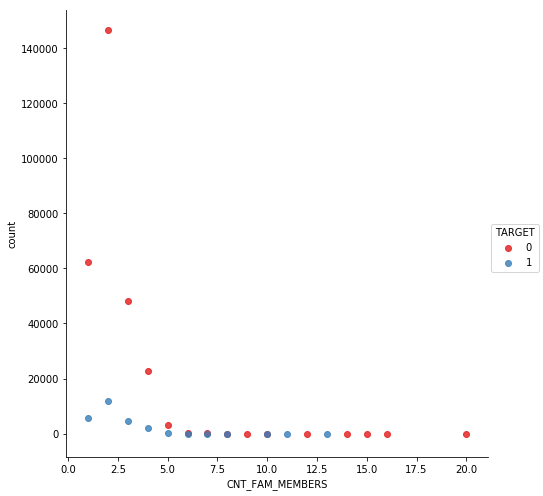

In [158]:
credit_risk_by_CNT_FAM_MEMBERS = train[['CNT_FAM_MEMBERS', 'TARGET']].groupby(['CNT_FAM_MEMBERS', 'TARGET']).size().reset_index()
credit_risk_by_CNT_FAM_MEMBERS.columns = ['CNT_FAM_MEMBERS', 'TARGET', 'count']
sns.lmplot(x = 'CNT_FAM_MEMBERS', y = 'count', data = credit_risk_by_CNT_FAM_MEMBERS, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=7)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

Text(0,0.5,'Credit Risk')

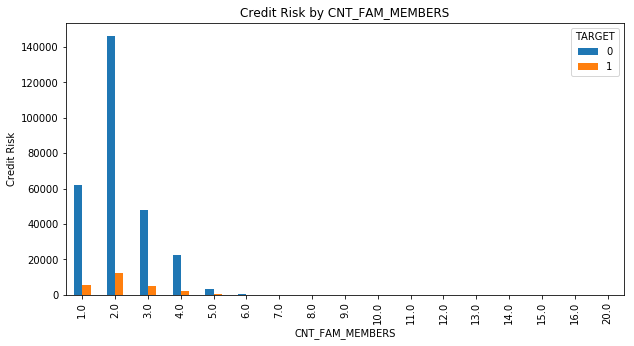

In [172]:
ax=plt.figure(figsize=(10,5)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
pd.crosstab(train['CNT_FAM_MEMBERS'],train.TARGET).plot(kind='bar',ax=ax)
plt.title('Credit Risk by CNT_FAM_MEMBERS')
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('Credit Risk')

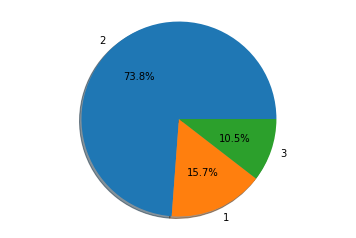

In [160]:
# Feature 29: REGION_RATING_CLIENT
temp = train["REGION_RATING_CLIENT"].value_counts()
labels = train["REGION_RATING_CLIENT"].unique()
# handle nan
#labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


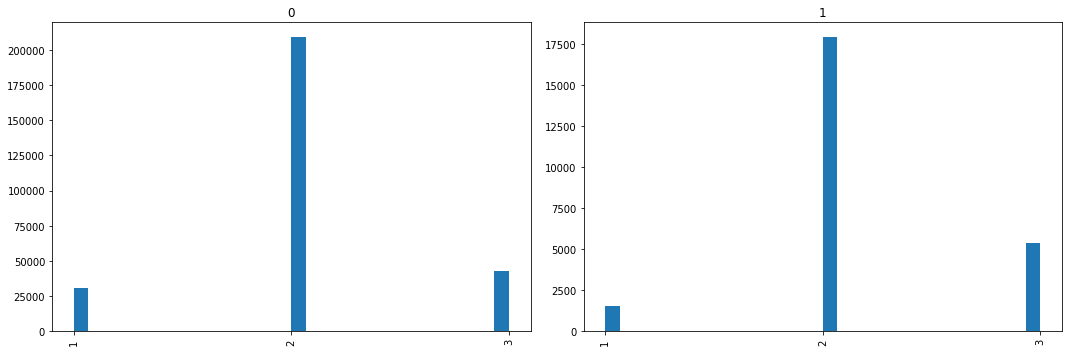

In [169]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='REGION_RATING_CLIENT',by='TARGET',bins=30,ax=axs)
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

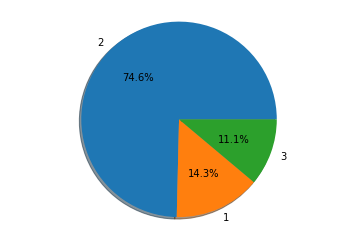

In [162]:
# Feature 30: REGION_RATING_CLIENT_W_CITY
temp = train["REGION_RATING_CLIENT_W_CITY"].value_counts()
labels = train["REGION_RATING_CLIENT_W_CITY"].unique()
# handle nan
#labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


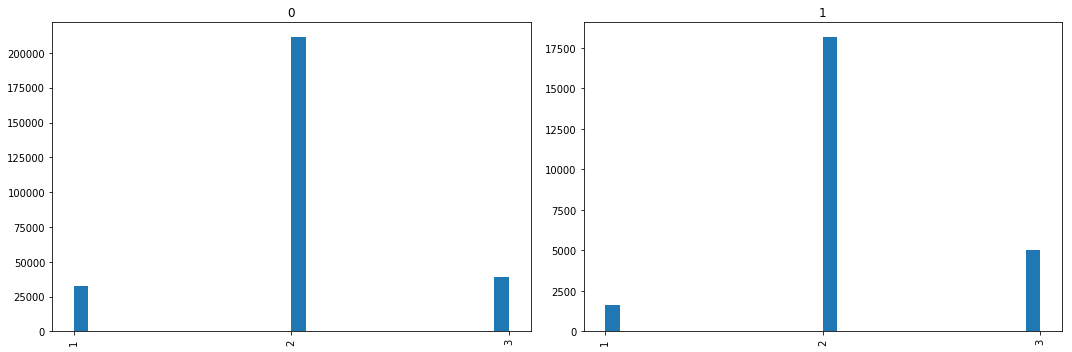

In [170]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='REGION_RATING_CLIENT_W_CITY',by='TARGET',bins=30,ax=axs)
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

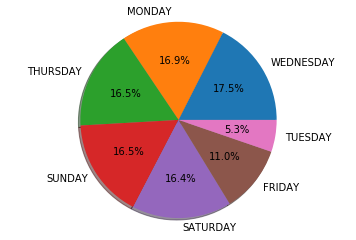

In [173]:
# Feature 31: WEEKDAY_APPR_PROCESS_START
temp = train["WEEKDAY_APPR_PROCESS_START"].value_counts()
labels = train["WEEKDAY_APPR_PROCESS_START"].unique()
# handle nan
#labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a88a52c88>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


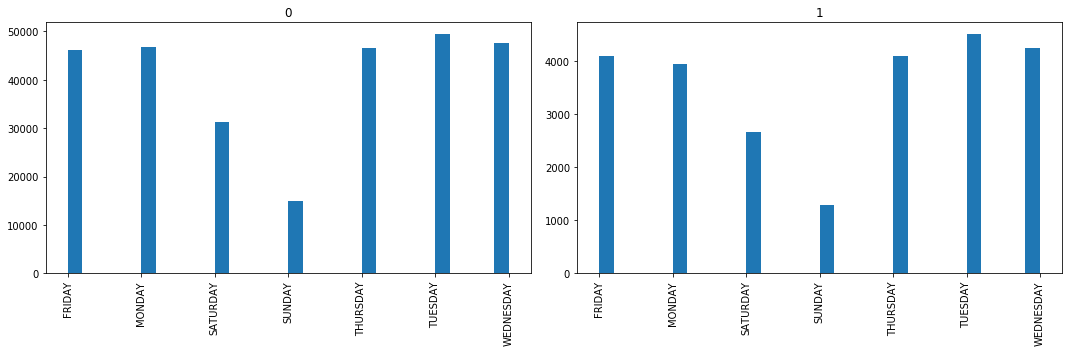

In [174]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='WEEKDAY_APPR_PROCESS_START',by='TARGET',bins=30,ax=axs)

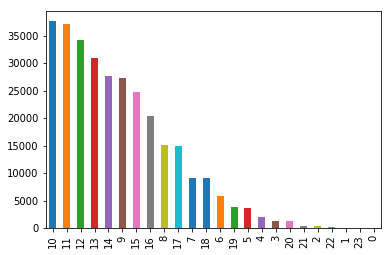

In [176]:
# Feature 32: HOUR_APPR_PROCESS_START
temp = train["HOUR_APPR_PROCESS_START"].value_counts()
temp.plot.bar()

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


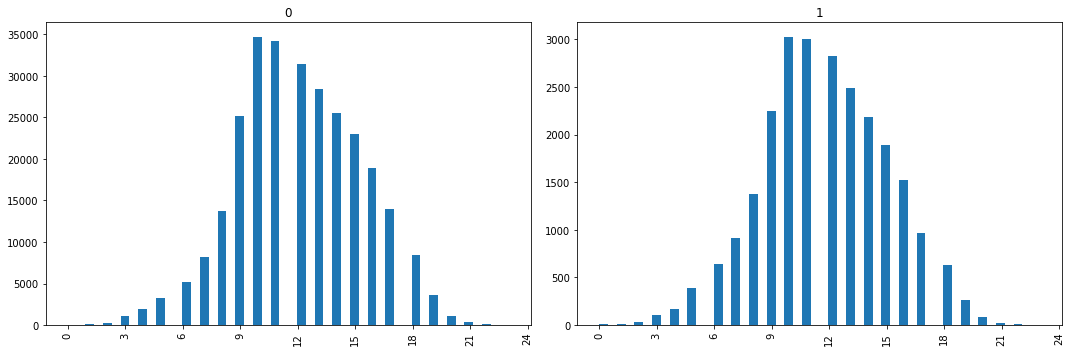

In [179]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='HOUR_APPR_PROCESS_START',by='TARGET',bins=50,ax=axs)
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

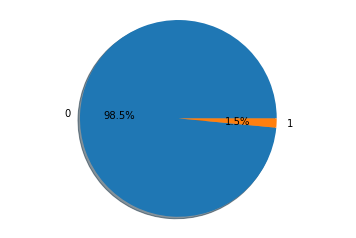

In [180]:
# Feature 33: REG_REGION_NOT_LIVE_REGION
temp = train["REG_REGION_NOT_LIVE_REGION"].value_counts()
labels = train["REG_REGION_NOT_LIVE_REGION"].unique()
# handle nan
#labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


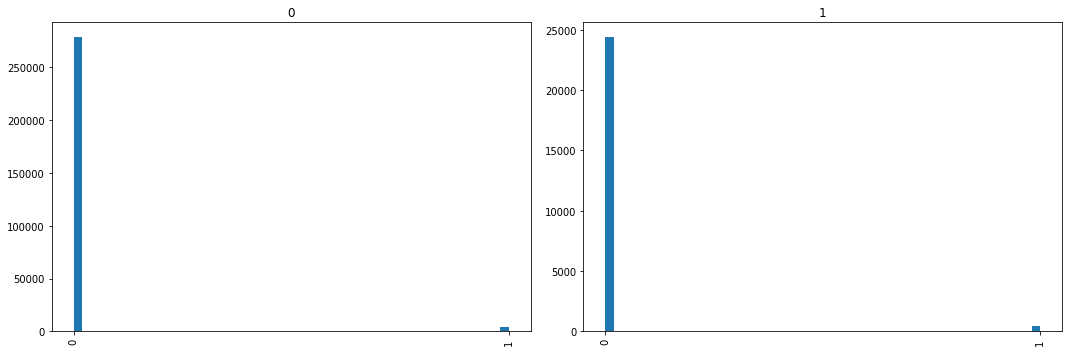

In [181]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='REG_REGION_NOT_LIVE_REGION',by='TARGET',bins=50,ax=axs)
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

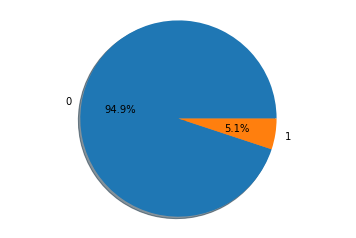

In [182]:
# Feature 34: REG_REGION_NOT_WORK_REGION
temp = train["REG_REGION_NOT_WORK_REGION"].value_counts()
labels = train["REG_REGION_NOT_WORK_REGION"].unique()
# handle nan
#labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


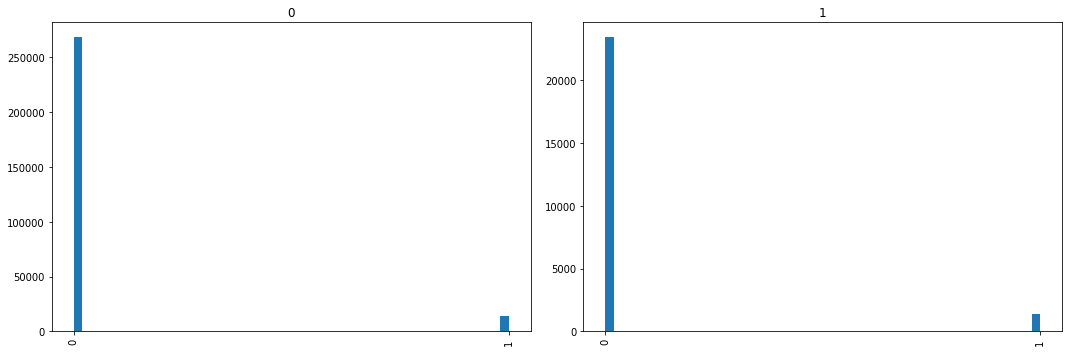

In [183]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='REG_REGION_NOT_WORK_REGION',by='TARGET',bins=50,ax=axs)
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

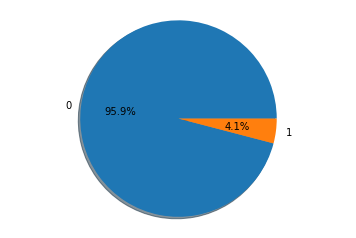

In [184]:
# Feature 35: LIVE_REGION_NOT_WORK_REGION
temp = train["LIVE_REGION_NOT_WORK_REGION"].value_counts()
labels = train["LIVE_REGION_NOT_WORK_REGION"].unique()
# handle nan
#labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


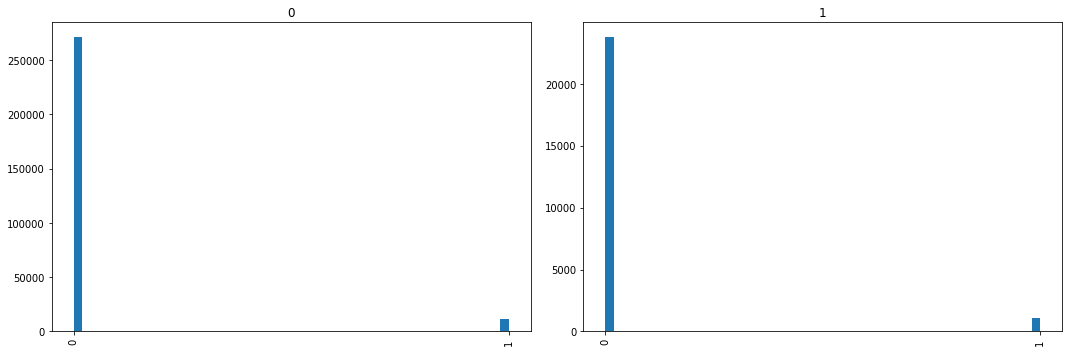

In [185]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='LIVE_REGION_NOT_WORK_REGION',by='TARGET',bins=50,ax=axs)
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

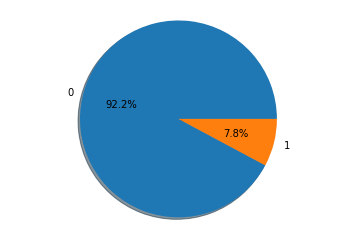

In [3]:
# Feature 36: REG_CITY_NOT_LIVE_CITY
temp = train["REG_CITY_NOT_LIVE_CITY"].value_counts()
labels = train["REG_CITY_NOT_LIVE_CITY"].unique()
# handle nan
#labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


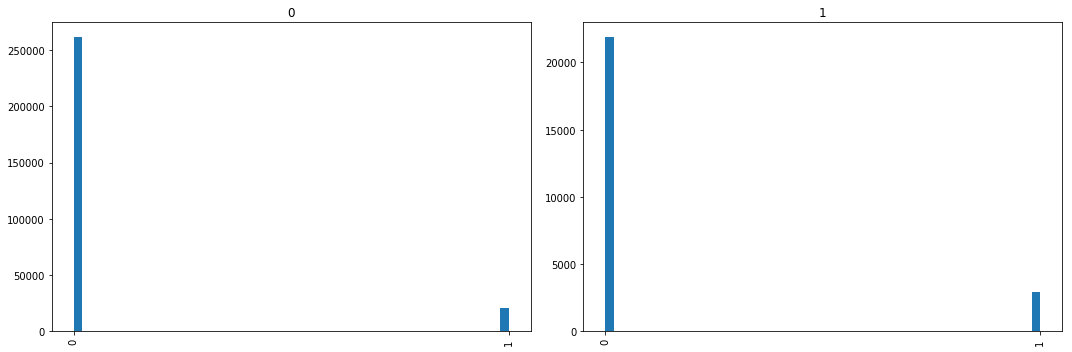

In [6]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='REG_CITY_NOT_LIVE_CITY',by='TARGET',bins=50,ax=axs)
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

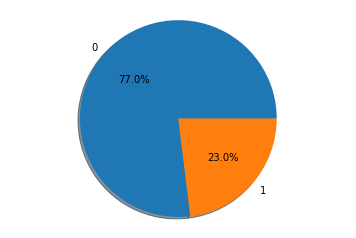

In [7]:
# Feature 37: REG_CITY_NOT_WORK_CITY
temp = train["REG_CITY_NOT_WORK_CITY"].value_counts()
labels = train["REG_CITY_NOT_WORK_CITY"].unique()
# handle nan
#labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


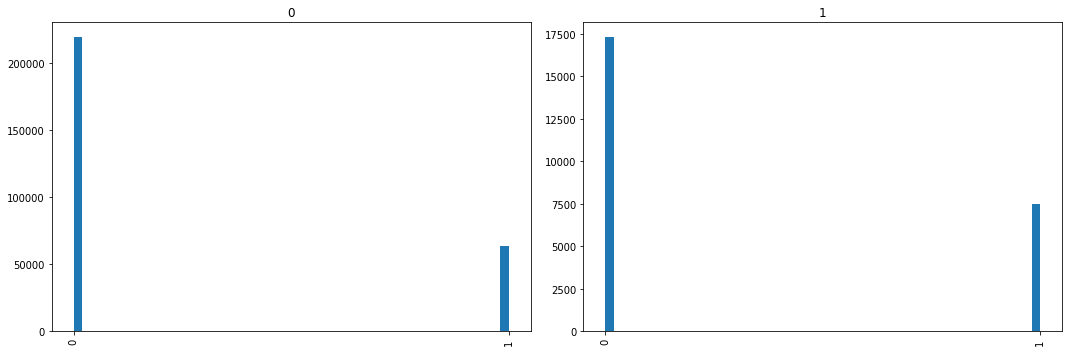

In [8]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='REG_CITY_NOT_WORK_CITY',by='TARGET',bins=50,ax=axs)
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

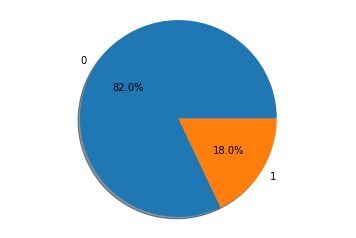

In [9]:
# Feature 38: LIVE_CITY_NOT_WORK_CITY
temp = train["LIVE_CITY_NOT_WORK_CITY"].value_counts()
labels = train["LIVE_CITY_NOT_WORK_CITY"].unique()
# handle nan
#labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


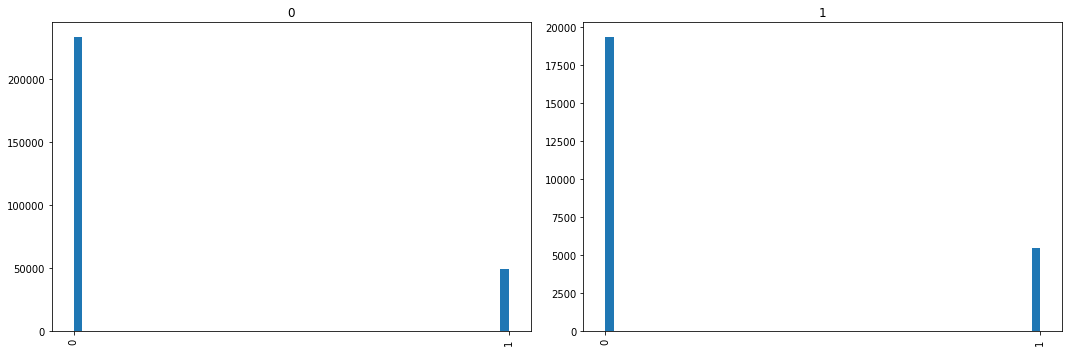

In [10]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='LIVE_CITY_NOT_WORK_CITY',by='TARGET',bins=50,ax=axs)
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

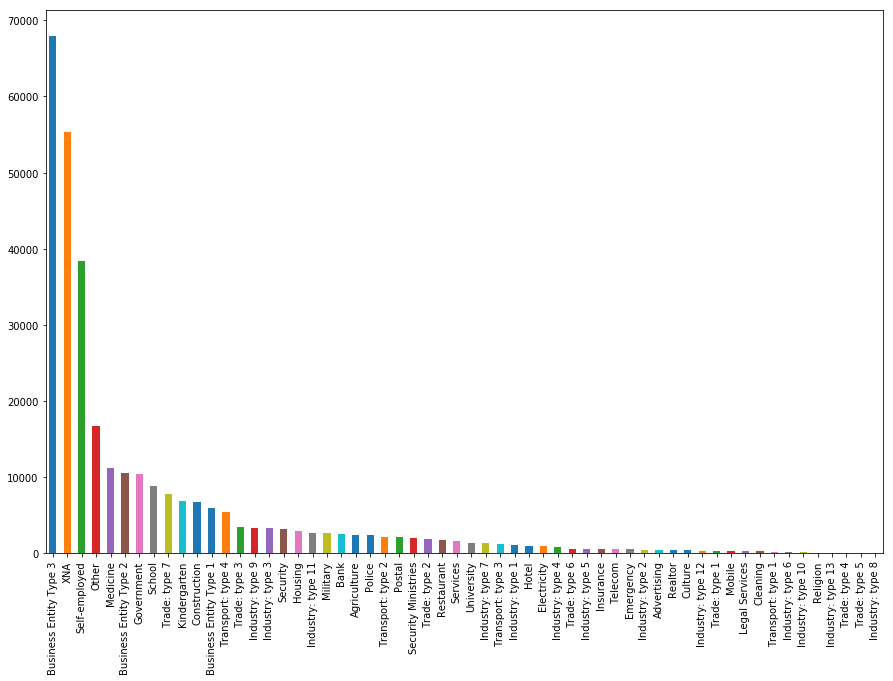

In [17]:
# Feature 39: ORGANIZATION_TYPE
fig1, ax = plt.subplots(figsize=(15,10))
temp = train["ORGANIZATION_TYPE"].value_counts()
temp.plot.bar()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e0f8940>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


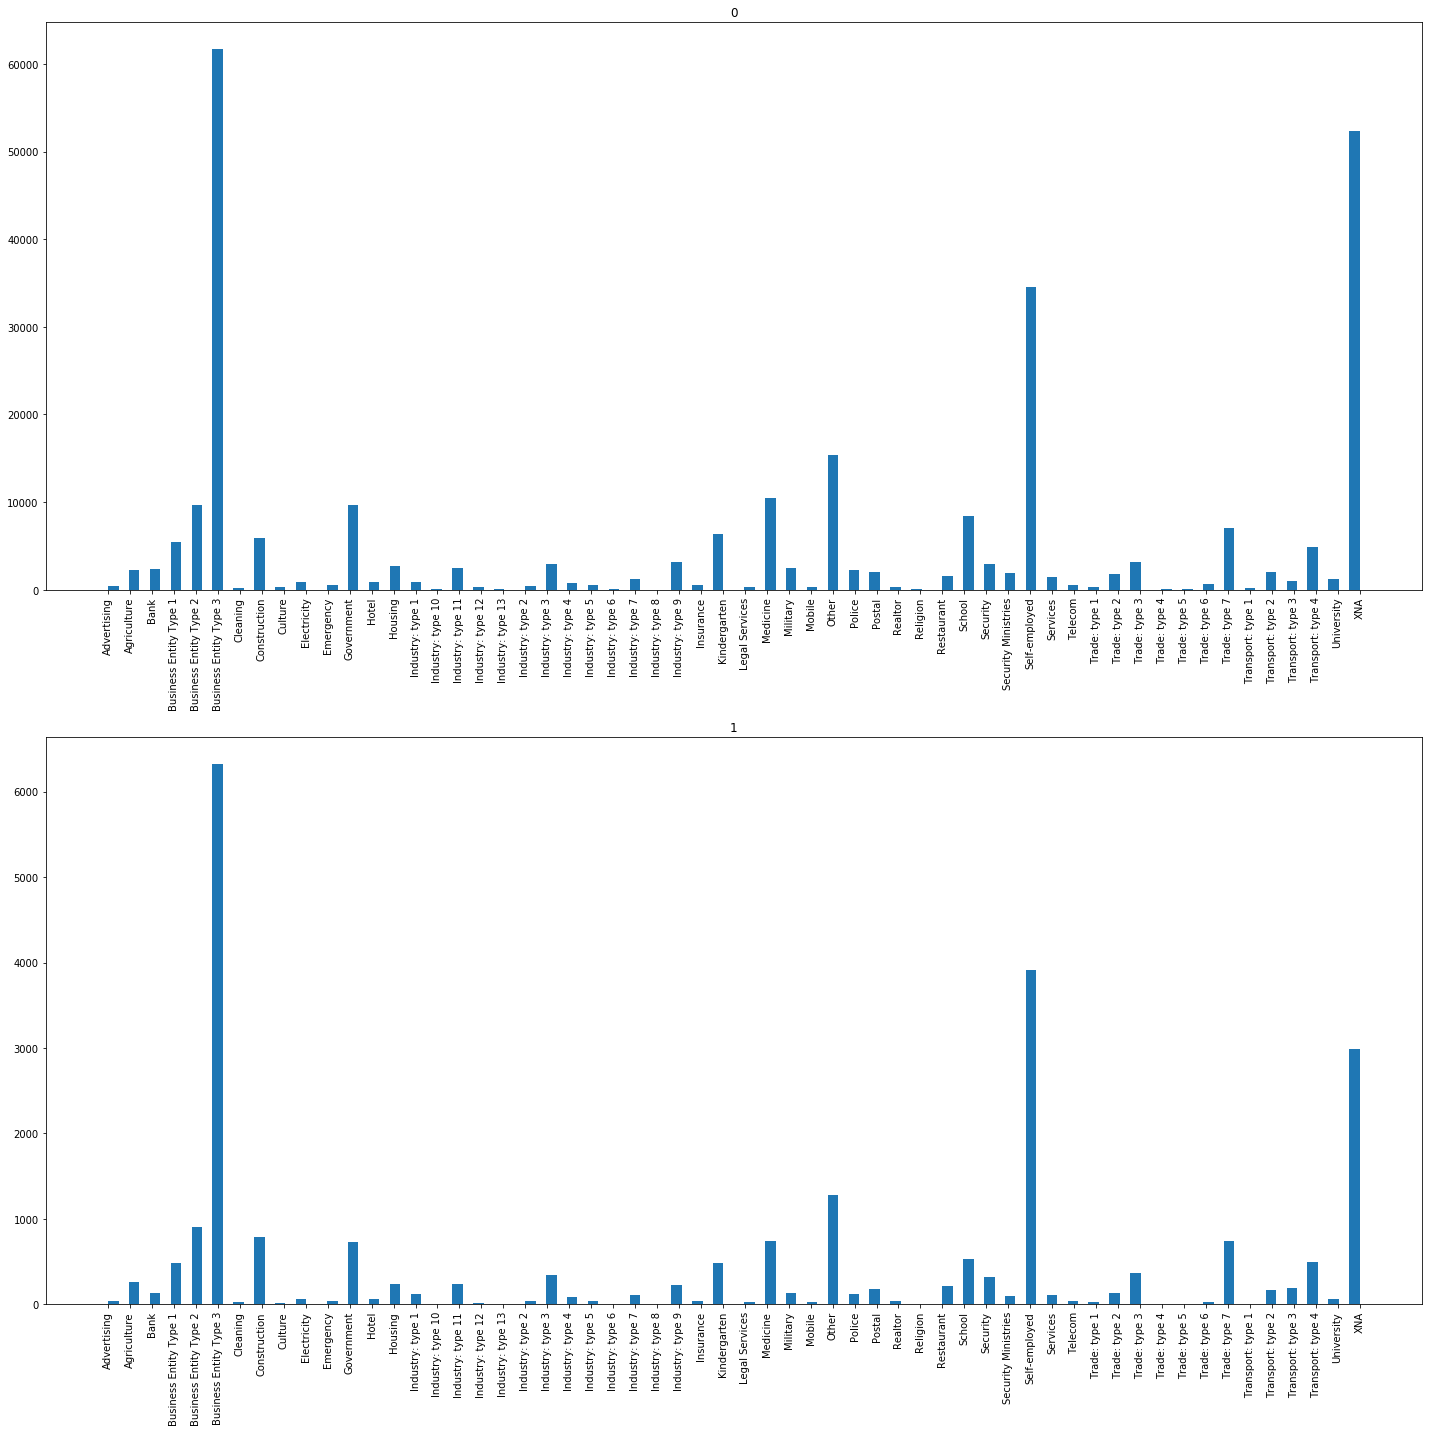

In [26]:
fig, axs = plt.subplots(2, 1,figsize=(20,20), tight_layout=True)
train.hist(column='ORGANIZATION_TYPE',by='TARGET',bins=120,ax=axs)

Text(0,0.5,'Frequency')

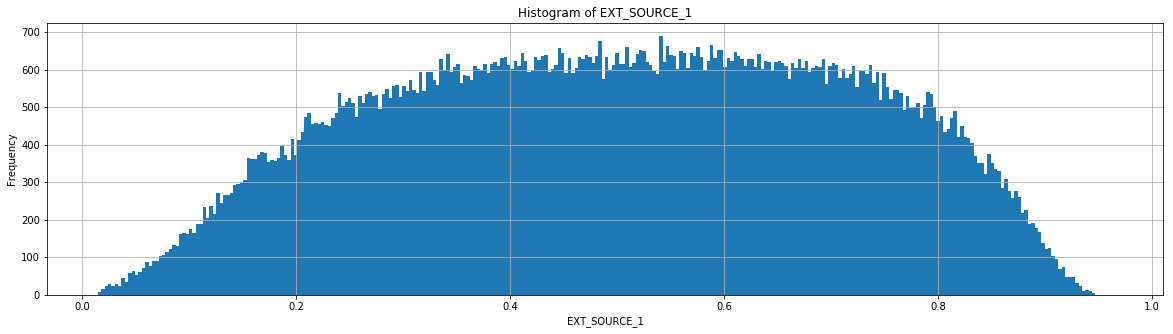

In [31]:
# Feature 40: EXT_SOURCE_1
ax = plt.figure(figsize=(20,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.EXT_SOURCE_1.hist(bins=300)
plt.title('Histogram of EXT_SOURCE_1')
plt.xlabel('EXT_SOURCE_1')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e758dd8>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


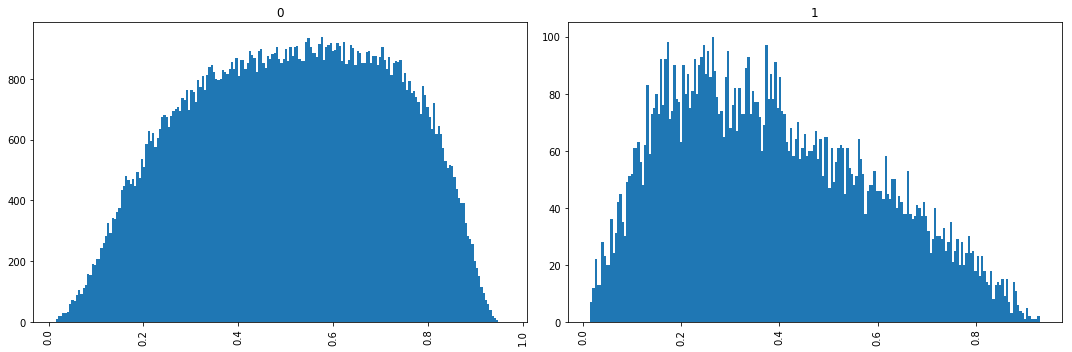

In [33]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='EXT_SOURCE_1',by='TARGET',bins=200,ax=axs)

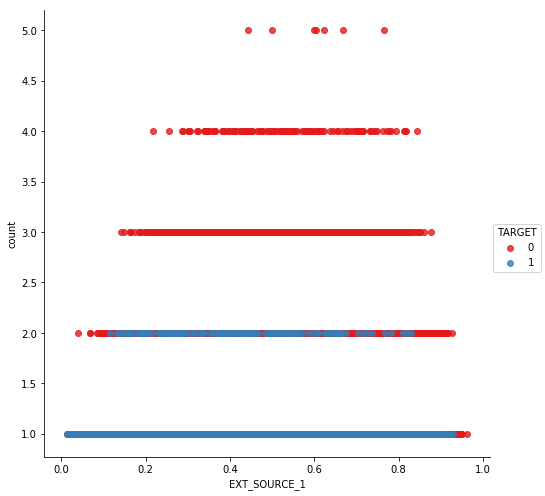

In [34]:
credit_risk_by_EXT_SOURCE_1 = train[['EXT_SOURCE_1', 'TARGET']].groupby(['EXT_SOURCE_1', 'TARGET']).size().reset_index()
credit_risk_by_EXT_SOURCE_1.columns = ['EXT_SOURCE_1', 'TARGET', 'count']
sns.lmplot(x = 'EXT_SOURCE_1', y = 'count', data = credit_risk_by_EXT_SOURCE_1, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=7)

EXT_SOURCE_1 seems to be a good predictor variable.

Text(0,0.5,'Frequency')

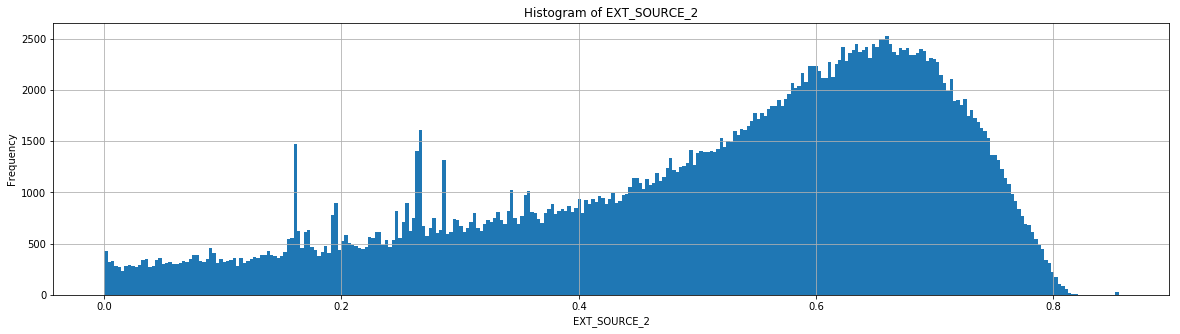

In [35]:
# Feature 41: EXT_SOURCE_2
ax = plt.figure(figsize=(20,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.EXT_SOURCE_2.hist(bins=300)
plt.title('Histogram of EXT_SOURCE_2')
plt.xlabel('EXT_SOURCE_2')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x116c640b8>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


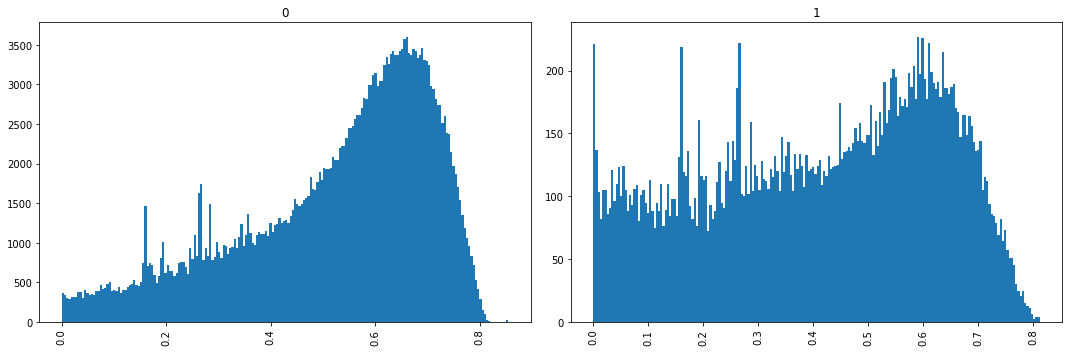

In [36]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='EXT_SOURCE_2',by='TARGET',bins=200,ax=axs)

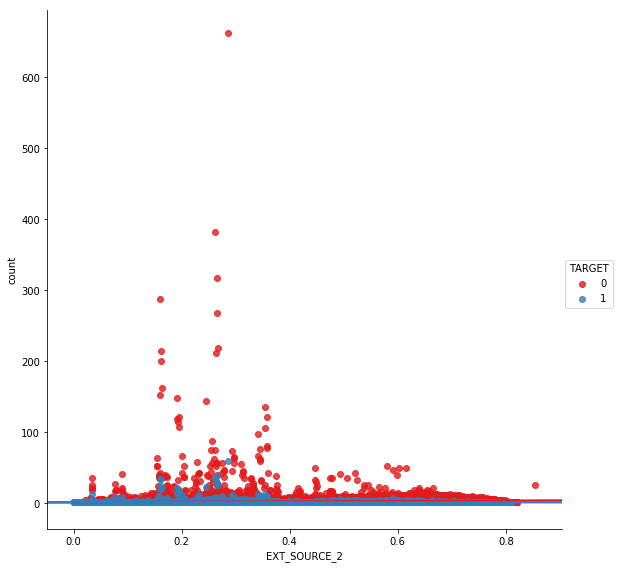

In [39]:
credit_risk_by_EXT_SOURCE_2 = train[['EXT_SOURCE_2', 'TARGET']].groupby(['EXT_SOURCE_2', 'TARGET']).size().reset_index()
credit_risk_by_EXT_SOURCE_2.columns = ['EXT_SOURCE_2', 'TARGET', 'count']
sns.lmplot(x = 'EXT_SOURCE_2', y = 'count', data = credit_risk_by_EXT_SOURCE_2, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=8)

EXT_SOURCE_2 looks to be a good predictor variable.

Text(0,0.5,'Frequency')

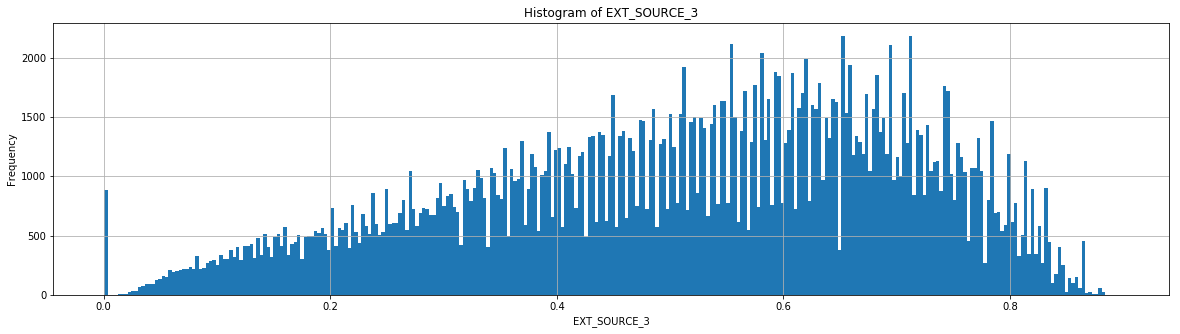

In [40]:
# Feature 42: EXT_SOURCE_3
ax = plt.figure(figsize=(20,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.EXT_SOURCE_3.hist(bins=300)
plt.title('Histogram of EXT_SOURCE_3')
plt.xlabel('EXT_SOURCE_3')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a224c4518>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


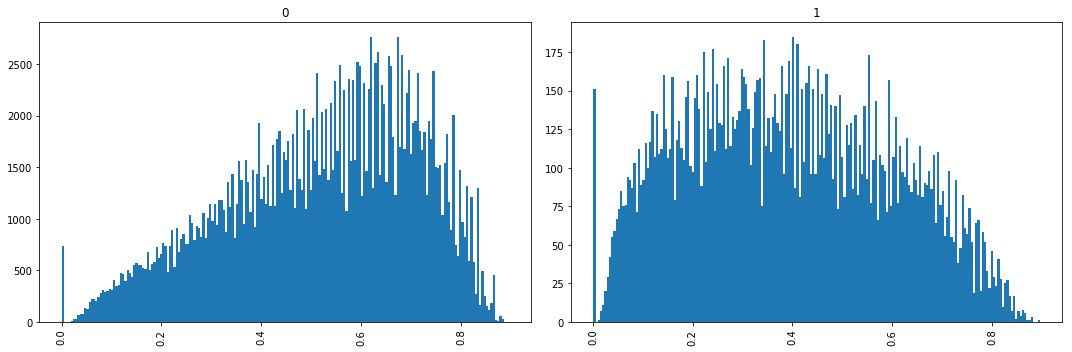

In [41]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='EXT_SOURCE_3',by='TARGET',bins=200,ax=axs)

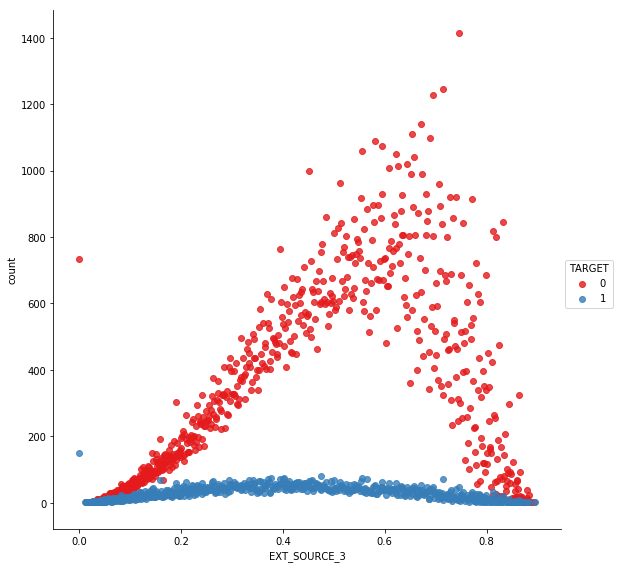

In [42]:
credit_risk_by_EXT_SOURCE_3 = train[['EXT_SOURCE_3', 'TARGET']].groupby(['EXT_SOURCE_3', 'TARGET']).size().reset_index()
credit_risk_by_EXT_SOURCE_3.columns = ['EXT_SOURCE_3', 'TARGET', 'count']
sns.lmplot(x = 'EXT_SOURCE_3', y = 'count', data = credit_risk_by_EXT_SOURCE_3, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=8)

EXT_SOURCE_3 looks to be a good predictor variable.

Text(0,0.5,'Frequency')

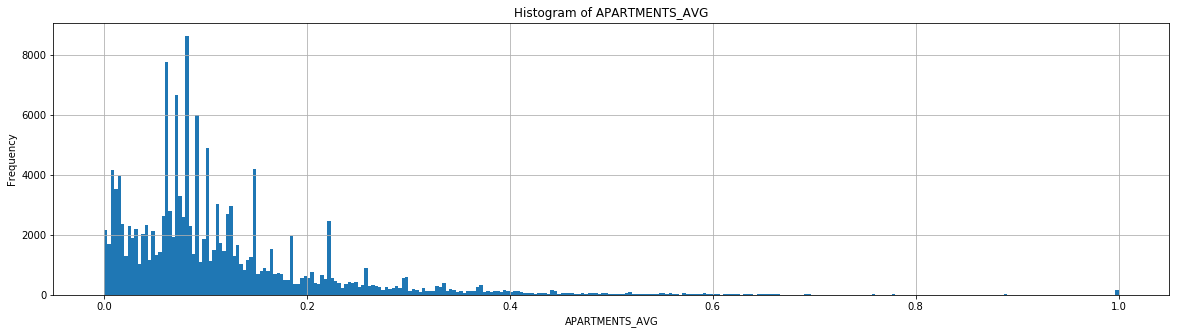

In [43]:
# Feature 43: APARTMENTS_AVG
ax = plt.figure(figsize=(20,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.APARTMENTS_AVG.hist(bins=300)
plt.title('Histogram of APARTMENTS_AVG')
plt.xlabel('APARTMENTS_AVG')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a22e16908>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


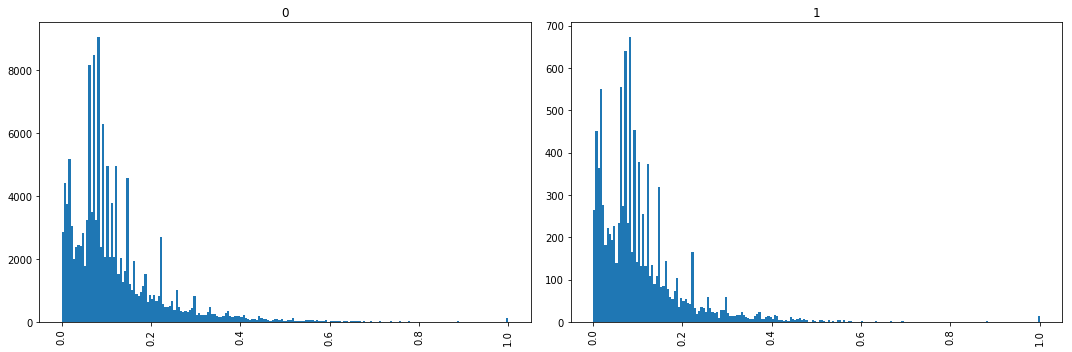

In [44]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='APARTMENTS_AVG',by='TARGET',bins=200,ax=axs)

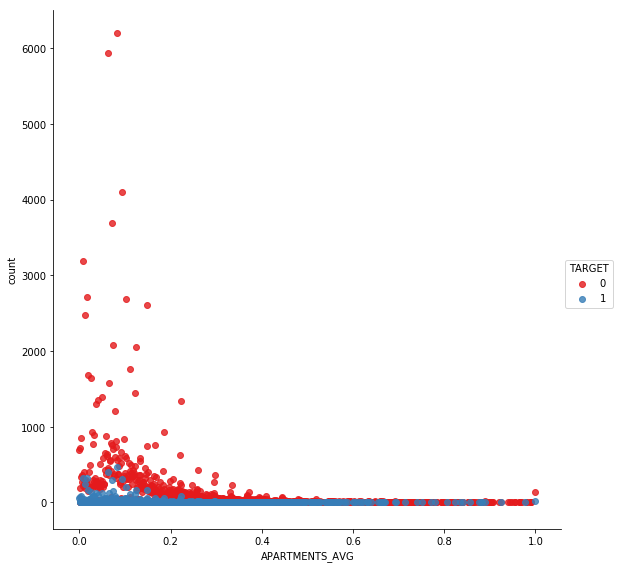

In [45]:
credit_risk_by_APARTMENTS_AVG = train[['APARTMENTS_AVG', 'TARGET']].groupby(['APARTMENTS_AVG', 'TARGET']).size().reset_index()
credit_risk_by_APARTMENTS_AVG.columns = ['APARTMENTS_AVG', 'TARGET', 'count']
sns.lmplot(x = 'APARTMENTS_AVG', y = 'count', data = credit_risk_by_APARTMENTS_AVG, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=8)

Text(0,0.5,'Frequency')

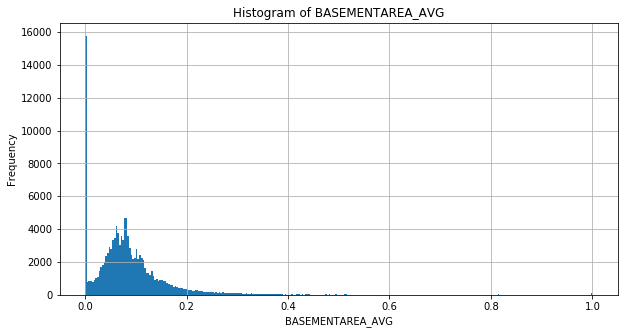

In [47]:
# Feature 44: BASEMENTAREA_AVG
ax = plt.figure(figsize=(10,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.BASEMENTAREA_AVG.hist(bins=300)
plt.title('Histogram of BASEMENTAREA_AVG')
plt.xlabel('BASEMENTAREA_AVG')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a3d8e0320>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


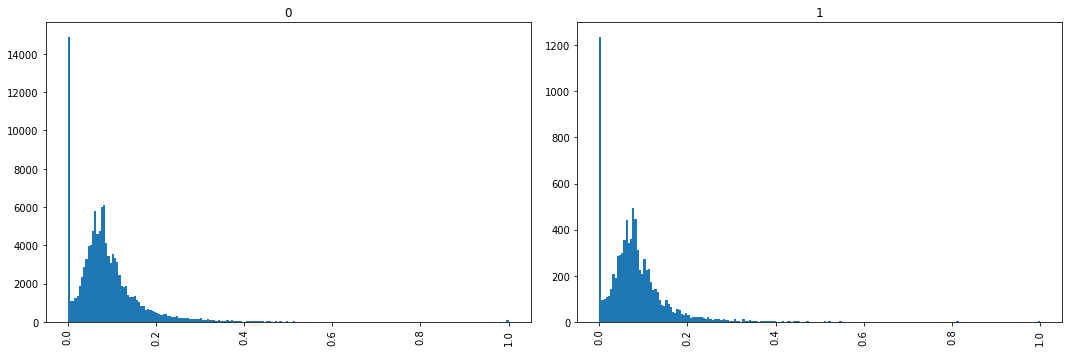

In [48]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='BASEMENTAREA_AVG',by='TARGET',bins=200,ax=axs)

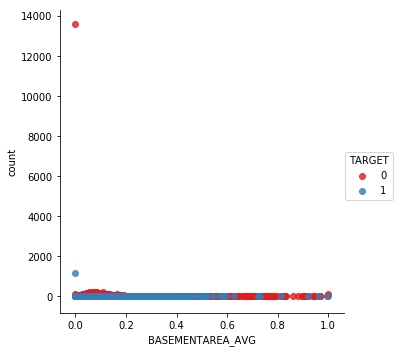

In [50]:
credit_risk_by_BASEMENTAREA_AVG = train[['BASEMENTAREA_AVG', 'TARGET']].groupby(['BASEMENTAREA_AVG', 'TARGET']).size().reset_index()
credit_risk_by_BASEMENTAREA_AVG.columns = ['BASEMENTAREA_AVG', 'TARGET', 'count']
sns.lmplot(x = 'BASEMENTAREA_AVG', y = 'count', data = credit_risk_by_BASEMENTAREA_AVG, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=5)

Text(0,0.5,'Frequency')

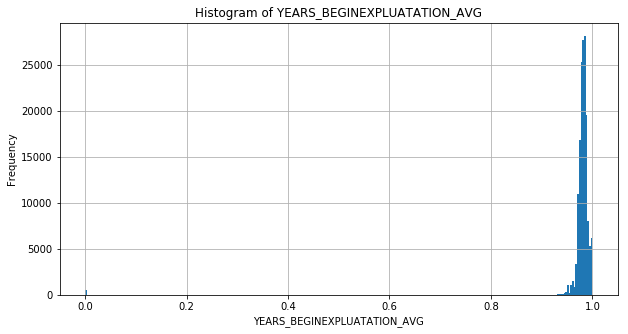

In [51]:
# Feature 45: YEARS_BEGINEXPLUATATION_AVG
ax = plt.figure(figsize=(10,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.YEARS_BEGINEXPLUATATION_AVG.hist(bins=300)
plt.title('Histogram of YEARS_BEGINEXPLUATATION_AVG')
plt.xlabel('YEARS_BEGINEXPLUATATION_AVG')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a39ab6a90>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


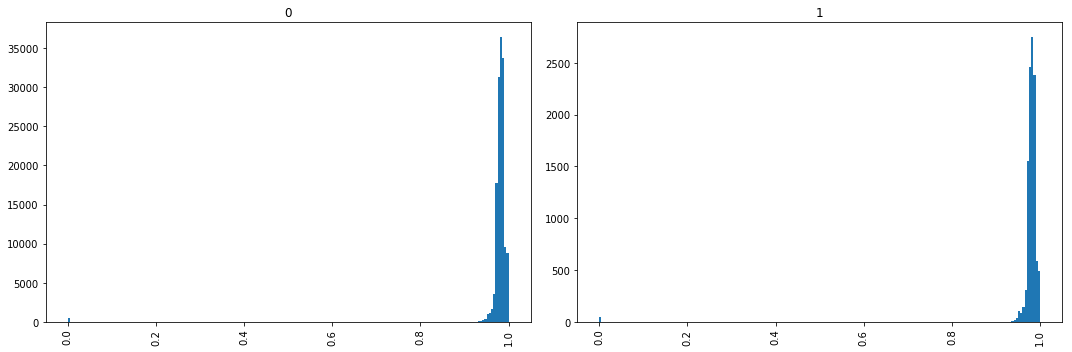

In [52]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='YEARS_BEGINEXPLUATATION_AVG',by='TARGET',bins=200,ax=axs)

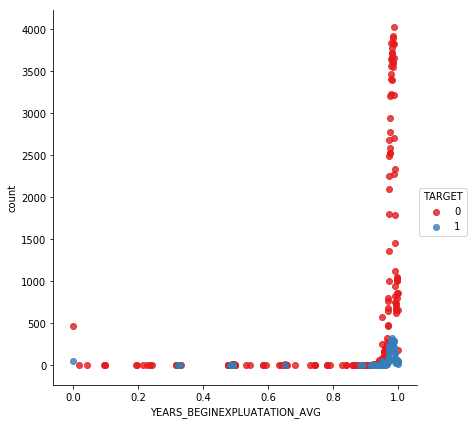

In [54]:
credit_risk_by_YEARS_BEGINEXPLUATATION_AVG = train[['YEARS_BEGINEXPLUATATION_AVG', 'TARGET']].groupby(['YEARS_BEGINEXPLUATATION_AVG', 'TARGET']).size().reset_index()
credit_risk_by_YEARS_BEGINEXPLUATATION_AVG.columns = ['YEARS_BEGINEXPLUATATION_AVG', 'TARGET', 'count']
sns.lmplot(x = 'YEARS_BEGINEXPLUATATION_AVG', y = 'count', data = credit_risk_by_YEARS_BEGINEXPLUATATION_AVG, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=6)

Text(0,0.5,'Frequency')

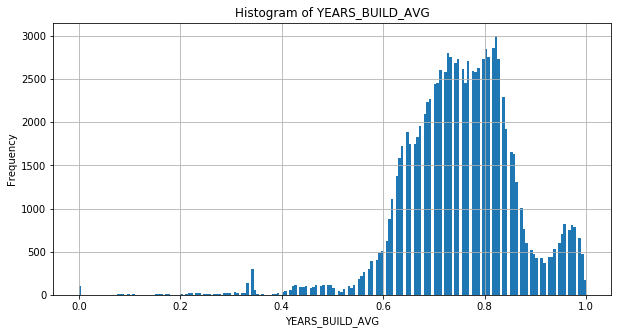

In [56]:
# Feature 46: YEARS_BUILD_AVG
ax = plt.figure(figsize=(10,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.YEARS_BUILD_AVG.hist(bins=200)
plt.title('Histogram of YEARS_BUILD_AVG')
plt.xlabel('YEARS_BUILD_AVG')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a3d051be0>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


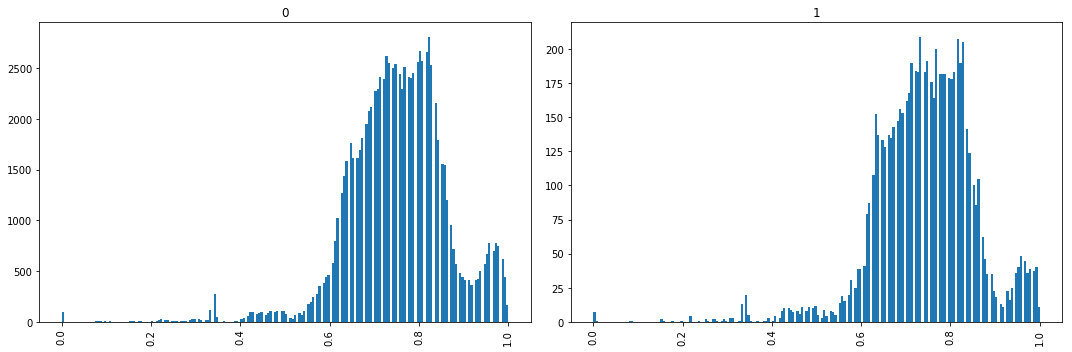

In [57]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='YEARS_BUILD_AVG',by='TARGET',bins=200,ax=axs)

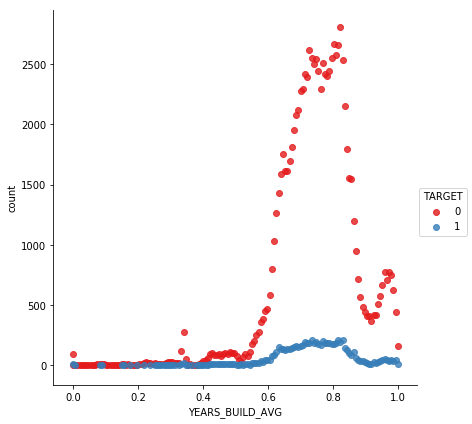

In [58]:
credit_risk_by_YEARS_BUILD_AVG = train[['YEARS_BUILD_AVG', 'TARGET']].groupby(['YEARS_BUILD_AVG', 'TARGET']).size().reset_index()
credit_risk_by_YEARS_BUILD_AVG.columns = ['YEARS_BUILD_AVG', 'TARGET', 'count']
sns.lmplot(x = 'YEARS_BUILD_AVG', y = 'count', data = credit_risk_by_YEARS_BUILD_AVG, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=6)

Text(0,0.5,'Frequency')

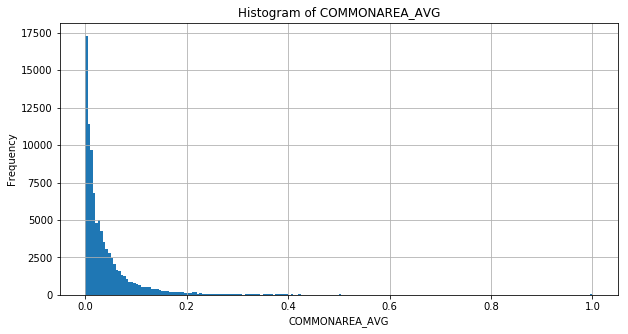

In [59]:
# Feature 47: COMMONAREA_AVG
ax = plt.figure(figsize=(10,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.COMMONAREA_AVG.hist(bins=200)
plt.title('Histogram of COMMONAREA_AVG')
plt.xlabel('COMMONAREA_AVG')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a3fe2f9e8>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


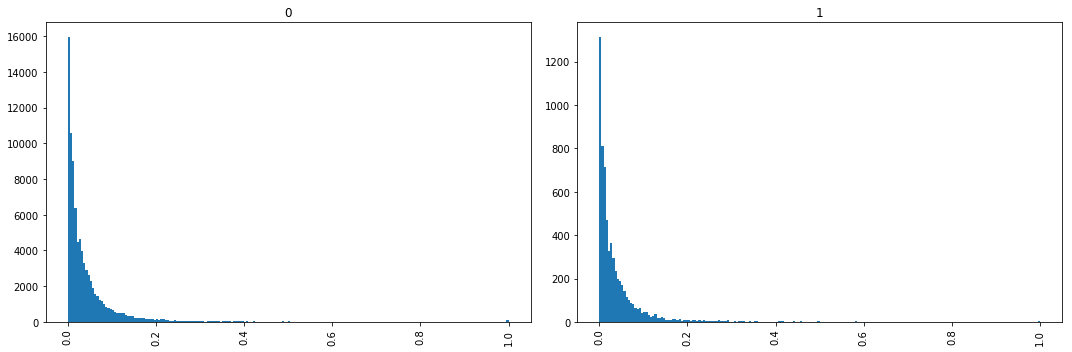

In [60]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='COMMONAREA_AVG',by='TARGET',bins=200,ax=axs)

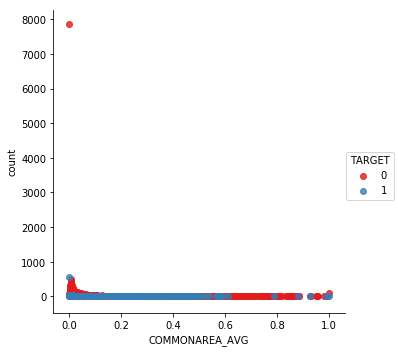

In [63]:
credit_risk_by_COMMONAREA_AVG = train[['COMMONAREA_AVG', 'TARGET']].groupby(['COMMONAREA_AVG', 'TARGET']).size().reset_index()
credit_risk_by_COMMONAREA_AVG.columns = ['COMMONAREA_AVG', 'TARGET', 'count']
sns.lmplot(x = 'COMMONAREA_AVG', y = 'count', data = credit_risk_by_COMMONAREA_AVG, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=5)

Text(0,0.5,'Frequency')

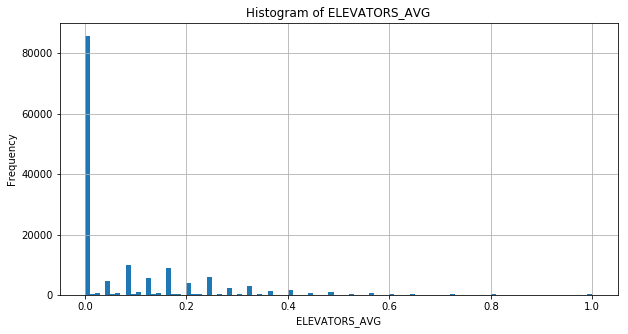

In [65]:
# Feature 48: ELEVATORS_AVG
ax = plt.figure(figsize=(10,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.ELEVATORS_AVG.hist(bins=100)
plt.title('Histogram of ELEVATORS_AVG')
plt.xlabel('ELEVATORS_AVG')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a42b5d940>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


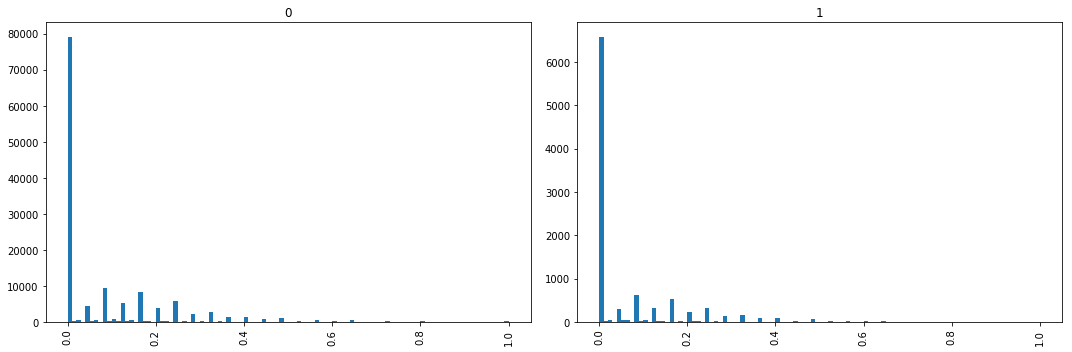

In [67]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='ELEVATORS_AVG',by='TARGET',bins=100,ax=axs)

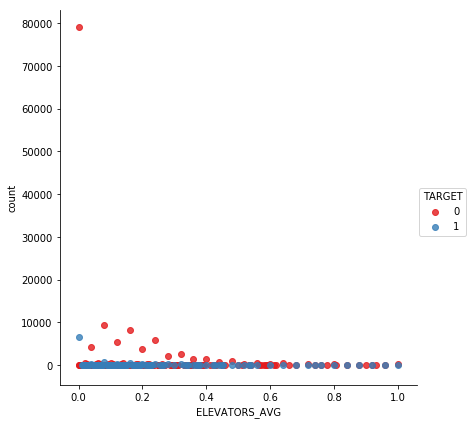

In [69]:
credit_risk_by_ELEVATORS_AVG = train[['ELEVATORS_AVG', 'TARGET']].groupby(['ELEVATORS_AVG', 'TARGET']).size().reset_index()
credit_risk_by_ELEVATORS_AVG.columns = ['ELEVATORS_AVG', 'TARGET', 'count']
sns.lmplot(x = 'ELEVATORS_AVG', y = 'count', data = credit_risk_by_ELEVATORS_AVG, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=6)

Text(0,0.5,'Frequency')

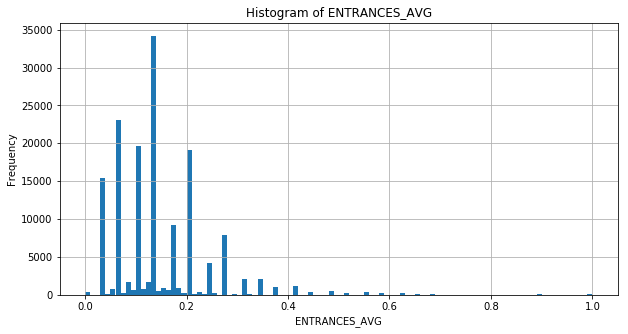

In [70]:
# Feature 49: ENTRANCES_AVG
ax = plt.figure(figsize=(10,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.ENTRANCES_AVG.hist(bins=100)
plt.title('Histogram of ENTRANCES_AVG')
plt.xlabel('ENTRANCES_AVG')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a3e8b2be0>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


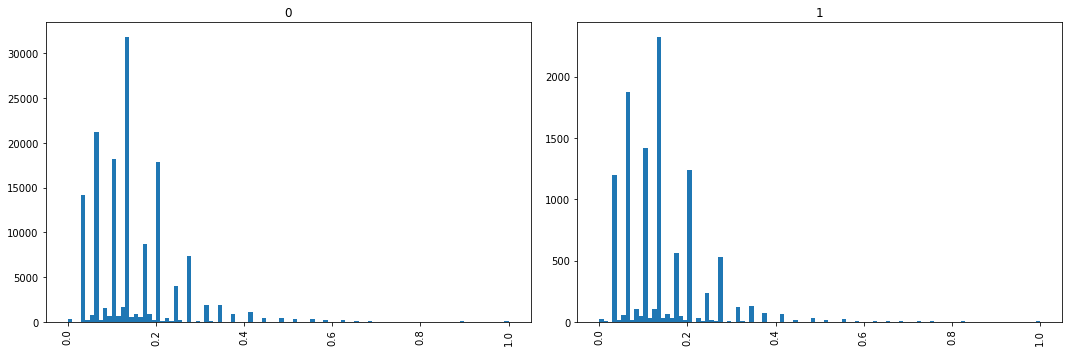

In [71]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='ENTRANCES_AVG',by='TARGET',bins=100,ax=axs)

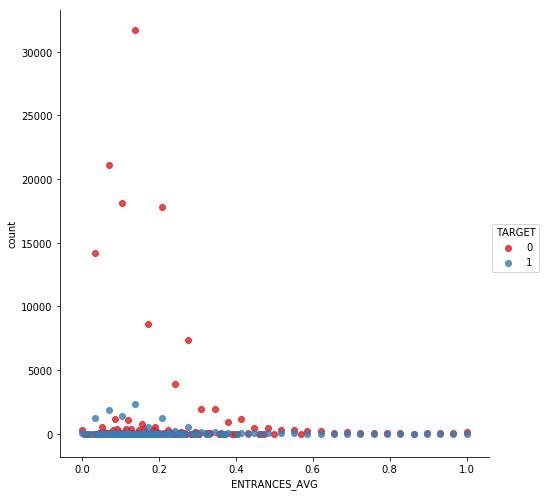

In [74]:
credit_risk_by_ENTRANCES_AVG = train[['ENTRANCES_AVG', 'TARGET']].groupby(['ENTRANCES_AVG', 'TARGET']).size().reset_index()
credit_risk_by_ENTRANCES_AVG.columns = ['ENTRANCES_AVG', 'TARGET', 'count']
sns.lmplot(x = 'ENTRANCES_AVG', y = 'count', data = credit_risk_by_ENTRANCES_AVG, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=7)

Text(0,0.5,'Frequency')

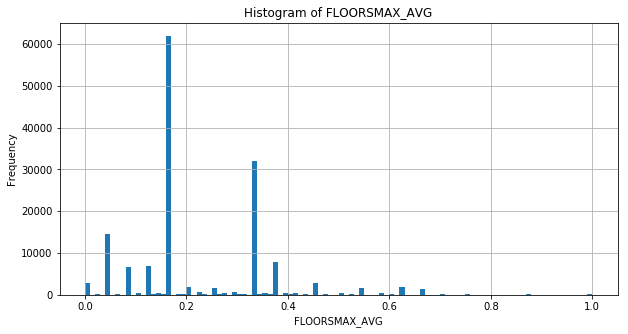

In [75]:
# Feature 50: FLOORSMAX_AVG
ax = plt.figure(figsize=(10,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.FLOORSMAX_AVG.hist(bins=100)
plt.title('Histogram of FLOORSMAX_AVG')
plt.xlabel('FLOORSMAX_AVG')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a4530bc88>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


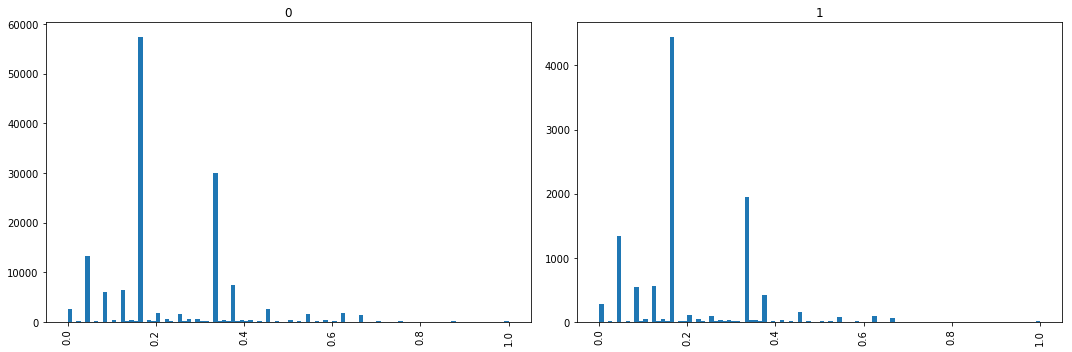

In [76]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='FLOORSMAX_AVG',by='TARGET',bins=100,ax=axs)

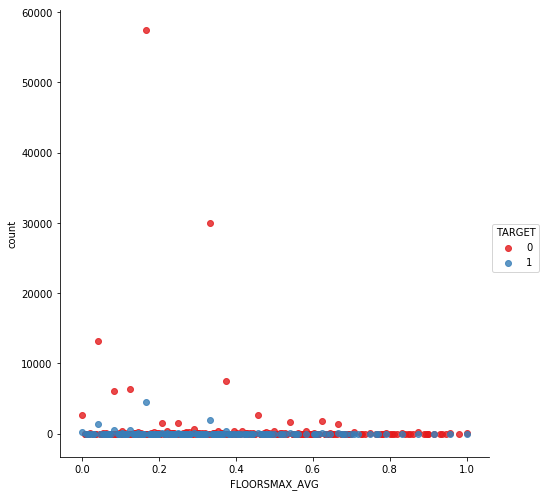

In [77]:
credit_risk_by_FLOORSMAX_AVG = train[['FLOORSMAX_AVG', 'TARGET']].groupby(['FLOORSMAX_AVG', 'TARGET']).size().reset_index()
credit_risk_by_FLOORSMAX_AVG.columns = ['FLOORSMAX_AVG', 'TARGET', 'count']
sns.lmplot(x = 'FLOORSMAX_AVG', y = 'count', data = credit_risk_by_FLOORSMAX_AVG, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=7)

Text(0,0.5,'Frequency')

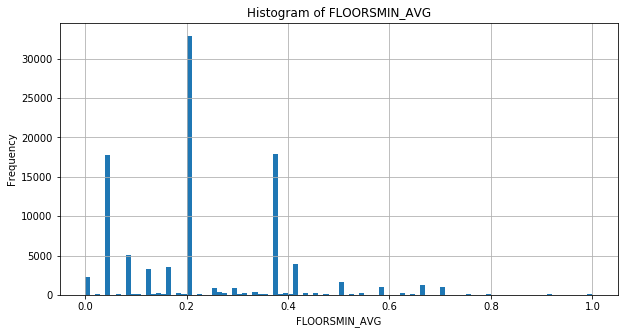

In [78]:
# Feature 51: FLOORSMIN_AVG
ax = plt.figure(figsize=(10,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.FLOORSMIN_AVG.hist(bins=100)
plt.title('Histogram of FLOORSMIN_AVG')
plt.xlabel('FLOORSMIN_AVG')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a462965c0>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


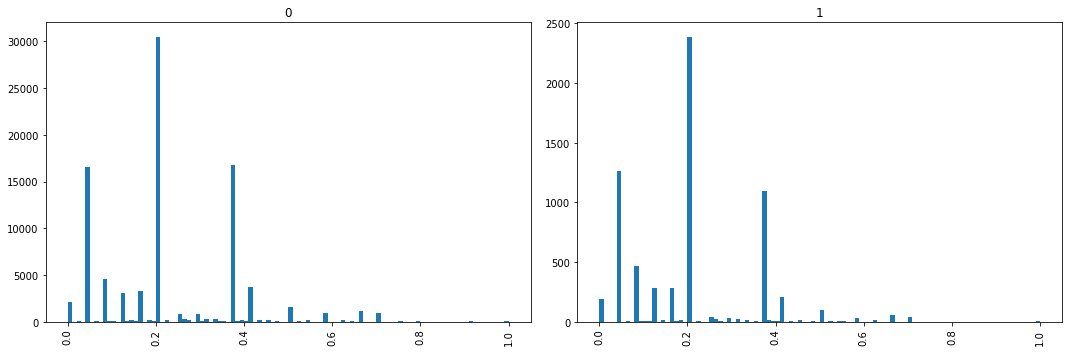

In [79]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='FLOORSMIN_AVG',by='TARGET',bins=100,ax=axs)

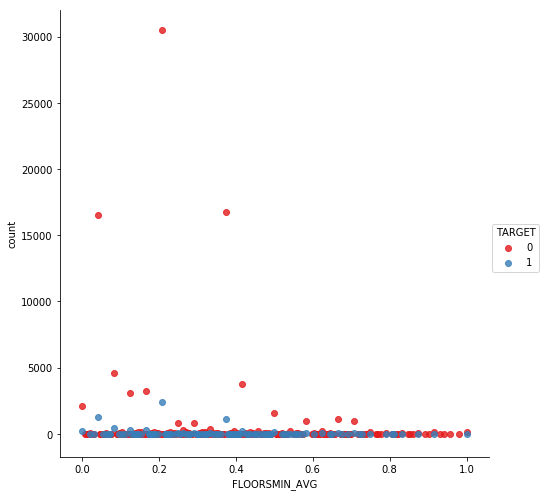

In [80]:
credit_risk_by_FLOORSMIN_AVG = train[['FLOORSMIN_AVG', 'TARGET']].groupby(['FLOORSMIN_AVG', 'TARGET']).size().reset_index()
credit_risk_by_FLOORSMIN_AVG.columns = ['FLOORSMIN_AVG', 'TARGET', 'count']
sns.lmplot(x = 'FLOORSMIN_AVG', y = 'count', data = credit_risk_by_FLOORSMIN_AVG, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=7)

Text(0,0.5,'Frequency')

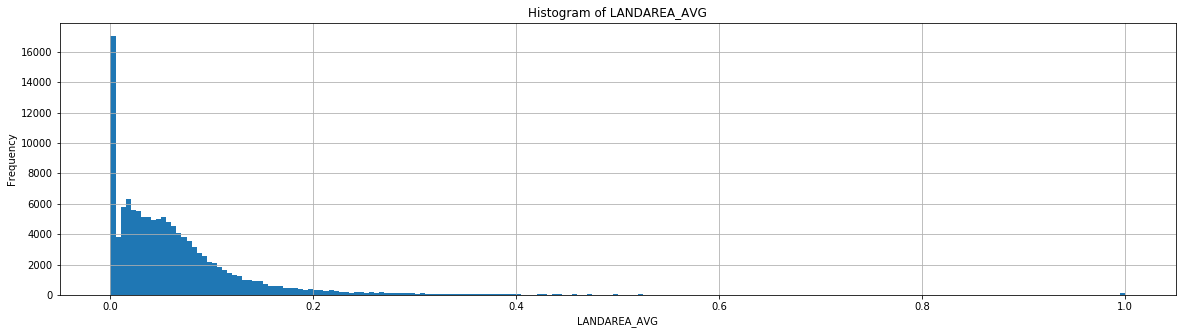

In [83]:
# Feature 52: LANDAREA_AVG
ax = plt.figure(figsize=(20,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.LANDAREA_AVG.hist(bins=200)
plt.title('Histogram of LANDAREA_AVG')
plt.xlabel('LANDAREA_AVG')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a49121400>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


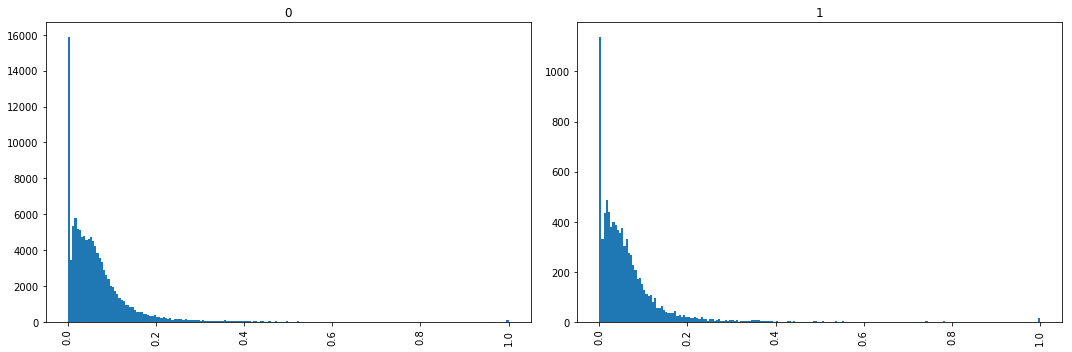

In [90]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='LANDAREA_AVG',by='TARGET',bins=200,ax=axs)

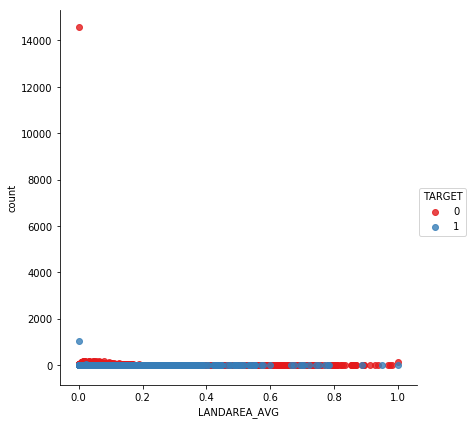

In [92]:
credit_risk_by_LANDAREA_AVG = train[['LANDAREA_AVG', 'TARGET']].groupby(['LANDAREA_AVG', 'TARGET']).size().reset_index()
credit_risk_by_LANDAREA_AVG.columns = ['LANDAREA_AVG', 'TARGET', 'count']
sns.lmplot(x = 'LANDAREA_AVG', y = 'count', data = credit_risk_by_LANDAREA_AVG, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=6)

Text(0,0.5,'Frequency')

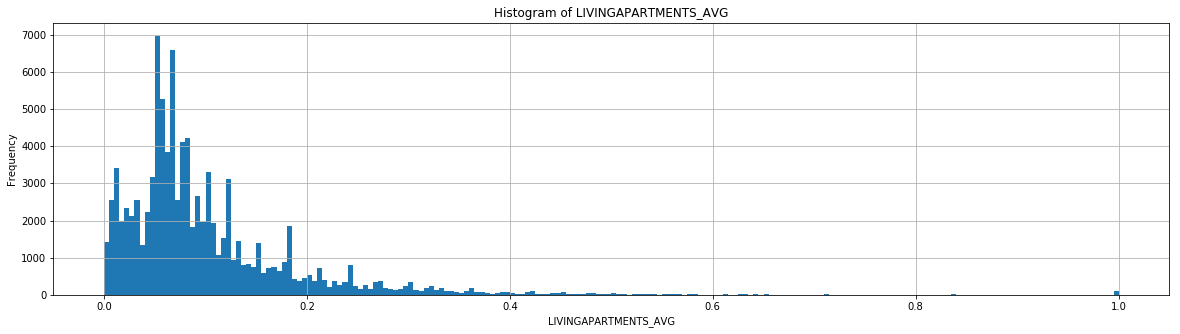

In [93]:
# Feature 53: LIVINGAPARTMENTS_AVG
ax = plt.figure(figsize=(20,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.LIVINGAPARTMENTS_AVG.hist(bins=200)
plt.title('Histogram of LIVINGAPARTMENTS_AVG')
plt.xlabel('LIVINGAPARTMENTS_AVG')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a46c10b00>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


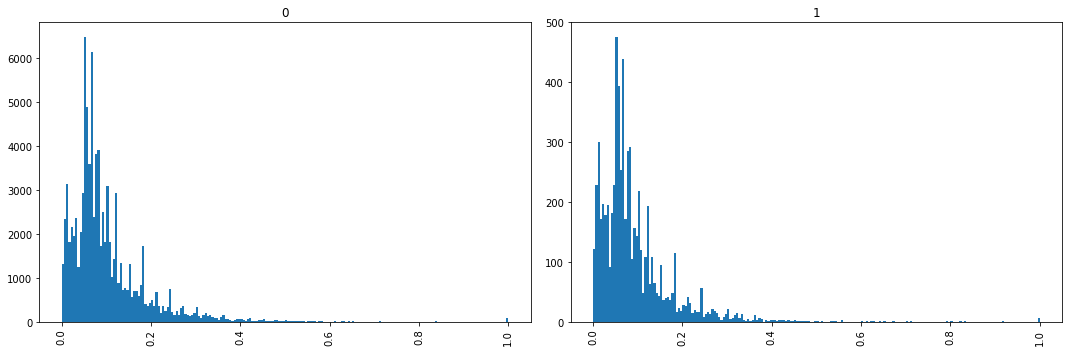

In [94]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='LIVINGAPARTMENTS_AVG',by='TARGET',bins=200,ax=axs)

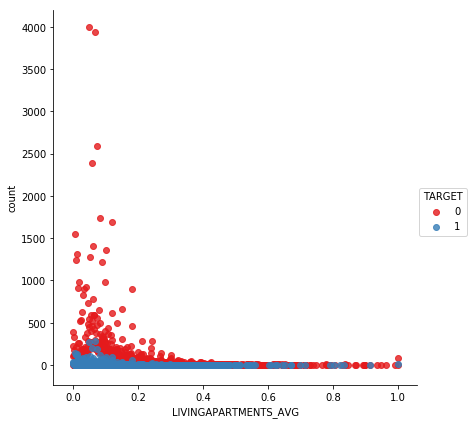

In [95]:
credit_risk_by_LIVINGAPARTMENTS_AVG = train[['LIVINGAPARTMENTS_AVG', 'TARGET']].groupby(['LIVINGAPARTMENTS_AVG', 'TARGET']).size().reset_index()
credit_risk_by_LIVINGAPARTMENTS_AVG.columns = ['LIVINGAPARTMENTS_AVG', 'TARGET', 'count']
sns.lmplot(x = 'LIVINGAPARTMENTS_AVG', y = 'count', data = credit_risk_by_LIVINGAPARTMENTS_AVG, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=6)

Text(0,0.5,'Frequency')

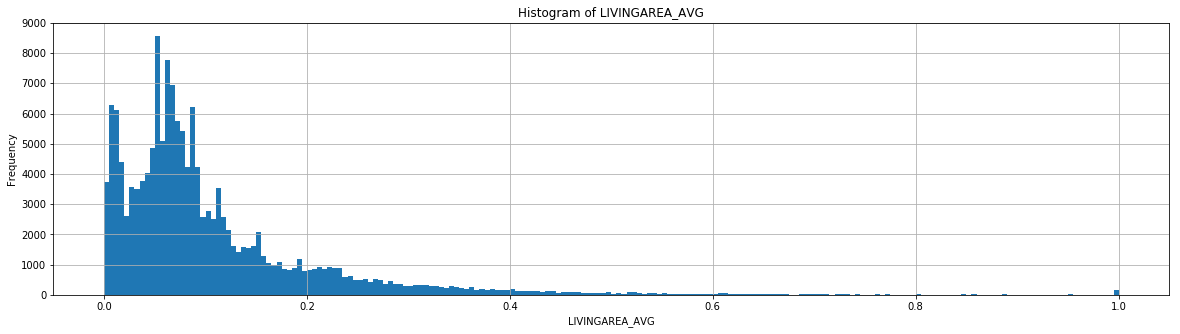

In [96]:
# Feature 54: LIVINGAREA_AVG
ax = plt.figure(figsize=(20,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.LIVINGAREA_AVG.hist(bins=200)
plt.title('Histogram of LIVINGAREA_AVG')
plt.xlabel('LIVINGAREA_AVG')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a47aa6dd8>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


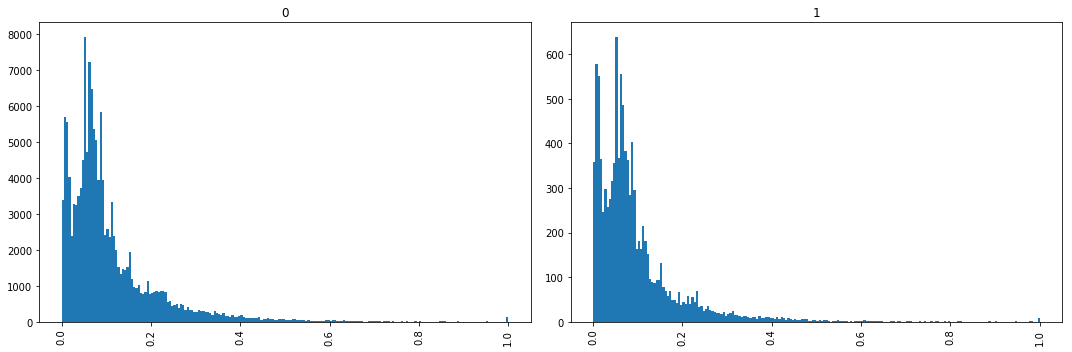

In [97]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='LIVINGAREA_AVG',by='TARGET',bins=200,ax=axs)

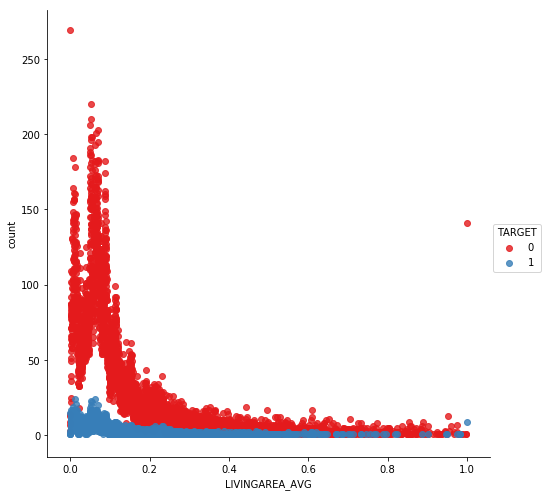

In [99]:
credit_risk_by_LIVINGAREA_AVG = train[['LIVINGAREA_AVG', 'TARGET']].groupby(['LIVINGAREA_AVG', 'TARGET']).size().reset_index()
credit_risk_by_LIVINGAREA_AVG.columns = ['LIVINGAREA_AVG', 'TARGET', 'count']
sns.lmplot(x = 'LIVINGAREA_AVG', y = 'count', data = credit_risk_by_LIVINGAREA_AVG, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=7)

Text(0,0.5,'Frequency')

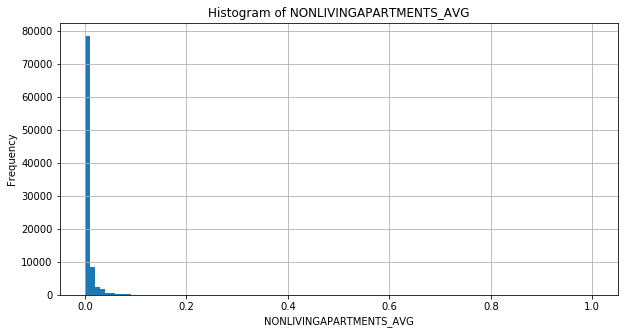

In [104]:
# Feature 55: NONLIVINGAPARTMENTS_AVG
ax = plt.figure(figsize=(10,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.NONLIVINGAPARTMENTS_AVG.hist(bins=100)
plt.title('Histogram of NONLIVINGAPARTMENTS_AVG')
plt.xlabel('NONLIVINGAPARTMENTS_AVG')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a48ce4518>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


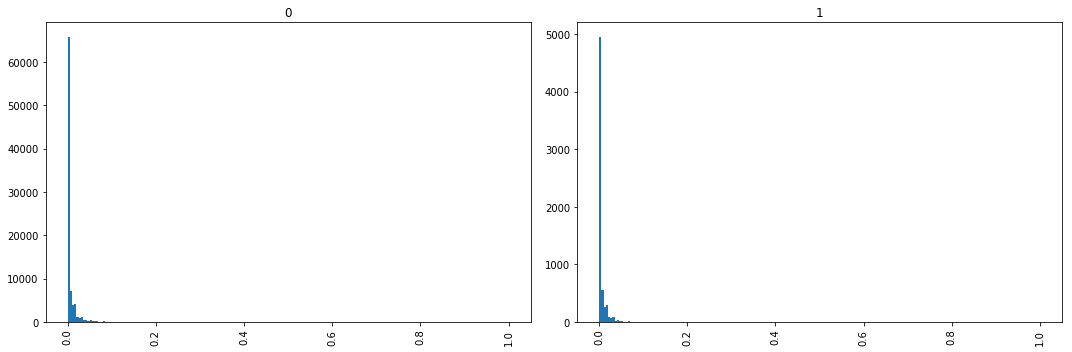

In [105]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='NONLIVINGAPARTMENTS_AVG',by='TARGET',bins=200,ax=axs)

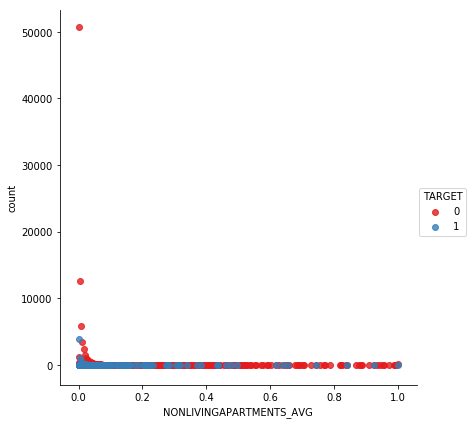

In [107]:
credit_risk_by_NONLIVINGAPARTMENTS_AVG = train[['NONLIVINGAPARTMENTS_AVG', 'TARGET']].groupby(['NONLIVINGAPARTMENTS_AVG', 'TARGET']).size().reset_index()
credit_risk_by_NONLIVINGAPARTMENTS_AVG.columns = ['NONLIVINGAPARTMENTS_AVG', 'TARGET', 'count']
sns.lmplot(x = 'NONLIVINGAPARTMENTS_AVG', y = 'count', data = credit_risk_by_NONLIVINGAPARTMENTS_AVG, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=6)

Text(0,0.5,'Frequency')

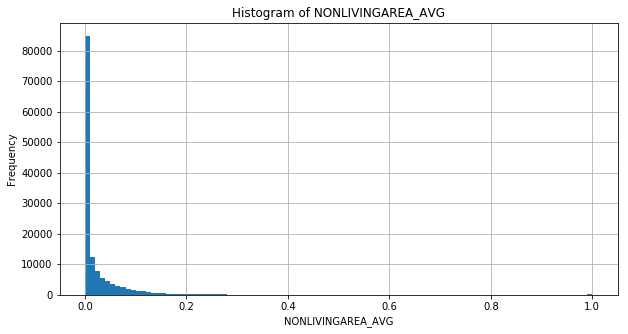

In [108]:
# Feature 56: NONLIVINGAREA_AVG
ax = plt.figure(figsize=(10,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.NONLIVINGAREA_AVG.hist(bins=100)
plt.title('Histogram of NONLIVINGAREA_AVG')
plt.xlabel('NONLIVINGAREA_AVG')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a4b9bc208>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


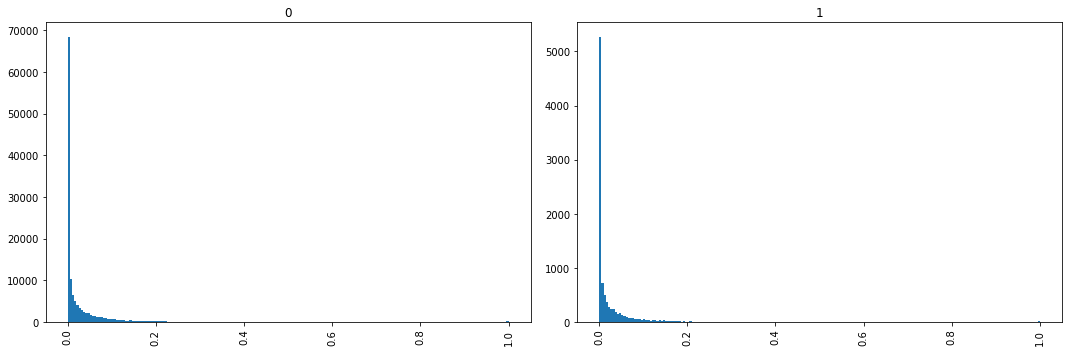

In [109]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='NONLIVINGAREA_AVG',by='TARGET',bins=200,ax=axs)

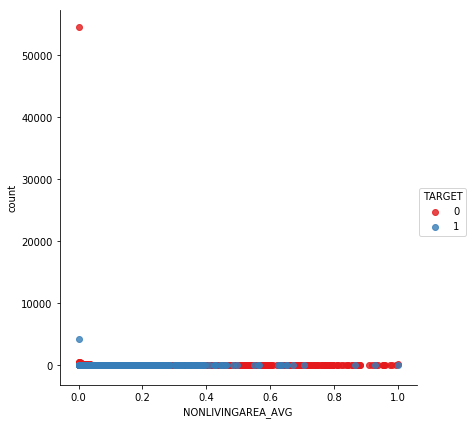

In [110]:
credit_risk_by_NONLIVINGAREA_AVG = train[['NONLIVINGAREA_AVG', 'TARGET']].groupby(['NONLIVINGAREA_AVG', 'TARGET']).size().reset_index()
credit_risk_by_NONLIVINGAREA_AVG.columns = ['NONLIVINGAREA_AVG', 'TARGET', 'count']
sns.lmplot(x = 'NONLIVINGAREA_AVG', y = 'count', data = credit_risk_by_NONLIVINGAREA_AVG, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=6)

Text(0,0.5,'Frequency')

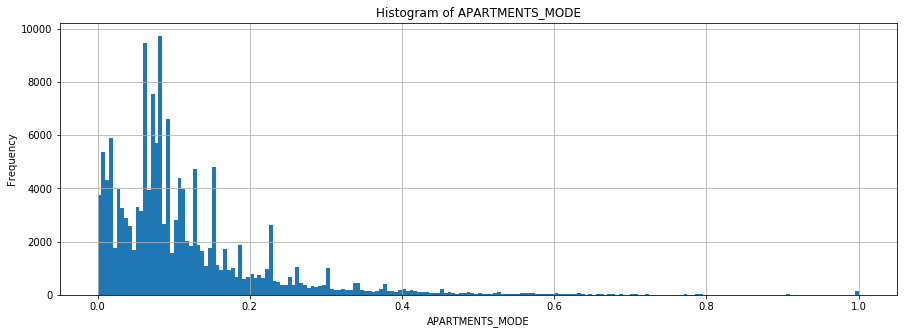

In [6]:
# Feature 57: APARTMENTS_MODE
ax = plt.figure(figsize=(15,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.APARTMENTS_MODE.hist(bins=200)
plt.title('Histogram of APARTMENTS_MODE')
plt.xlabel('APARTMENTS_MODE')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x117ea99b0>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


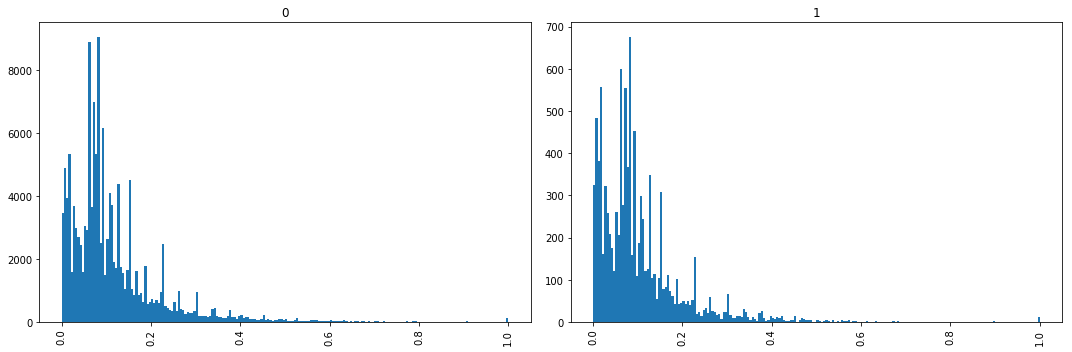

In [7]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='APARTMENTS_MODE',by='TARGET',bins=200,ax=axs)

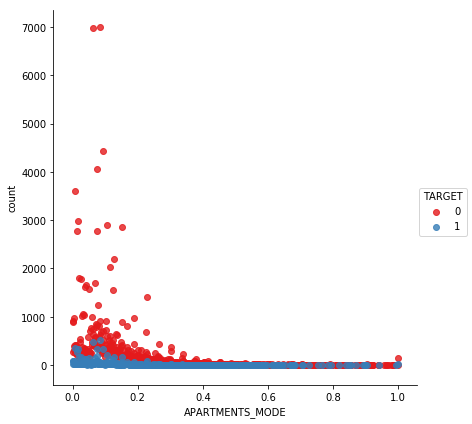

In [8]:
credit_risk_by_APARTMENTS_MODE = train[['APARTMENTS_MODE', 'TARGET']].groupby(['APARTMENTS_MODE', 'TARGET']).size().reset_index()
credit_risk_by_APARTMENTS_MODE.columns = ['APARTMENTS_MODE', 'TARGET', 'count']
sns.lmplot(x = 'APARTMENTS_MODE', y = 'count', data = credit_risk_by_APARTMENTS_MODE, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=6)

Text(0,0.5,'Frequency')

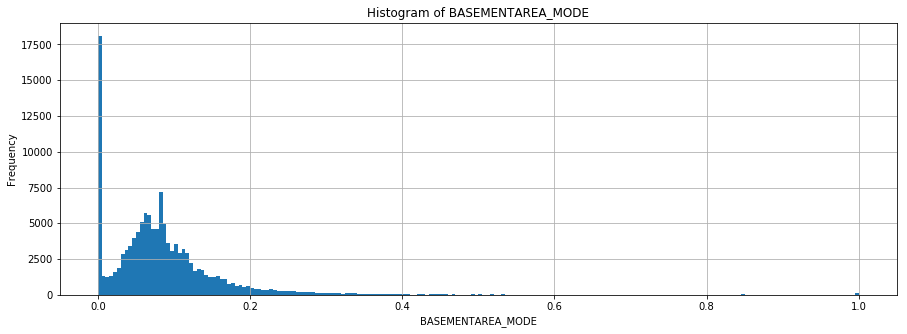

In [9]:
# Feature 58: BASEMENTAREA_MODE
ax = plt.figure(figsize=(15,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.BASEMENTAREA_MODE.hist(bins=200)
plt.title('Histogram of BASEMENTAREA_MODE')
plt.xlabel('BASEMENTAREA_MODE')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d5789e8>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


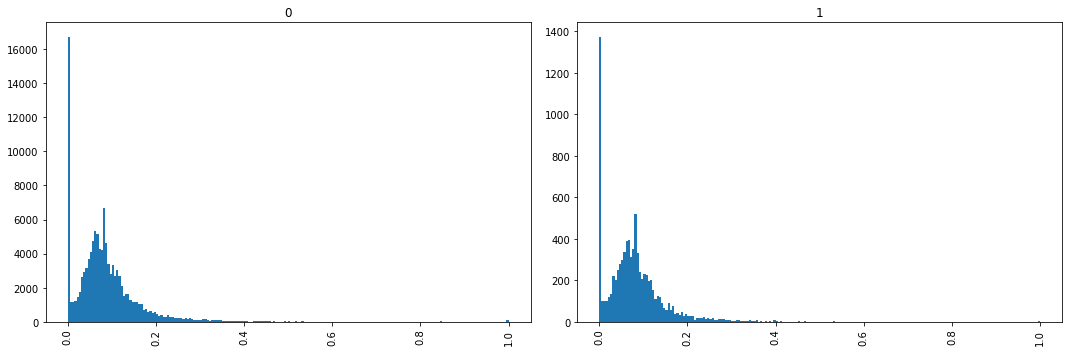

In [10]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='BASEMENTAREA_MODE',by='TARGET',bins=200,ax=axs)

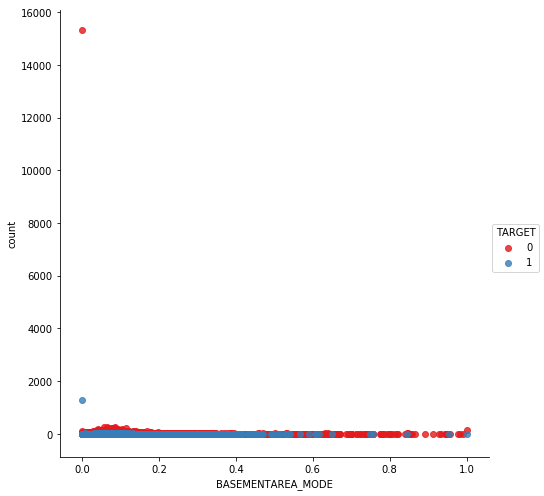

In [14]:
credit_risk_by_BASEMENTAREA_MODE = train[['BASEMENTAREA_MODE', 'TARGET']].groupby(['BASEMENTAREA_MODE', 'TARGET']).size().reset_index()
credit_risk_by_BASEMENTAREA_MODE.columns = ['BASEMENTAREA_MODE', 'TARGET', 'count']
sns.lmplot(x = 'BASEMENTAREA_MODE', y = 'count', data = credit_risk_by_BASEMENTAREA_MODE, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=7)

Text(0,0.5,'Frequency')

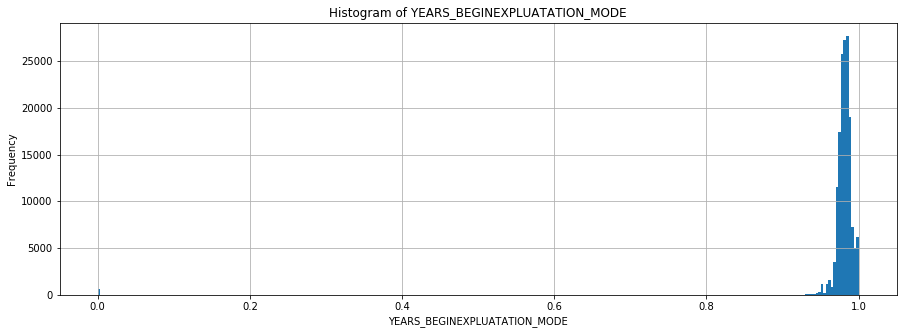

In [16]:
# Feature 59: YEARS_BEGINEXPLUATATION_MODE
ax = plt.figure(figsize=(15,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.YEARS_BEGINEXPLUATATION_MODE.hist(bins=300)
plt.title('Histogram of YEARS_BEGINEXPLUATATION_MODE')
plt.xlabel('YEARS_BEGINEXPLUATATION_MODE')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1eeeab70>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


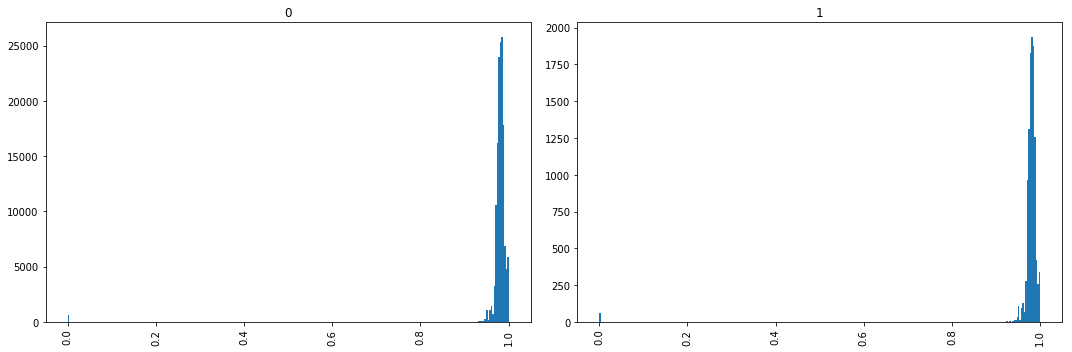

In [18]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='YEARS_BEGINEXPLUATATION_MODE',by='TARGET',bins=300,ax=axs)

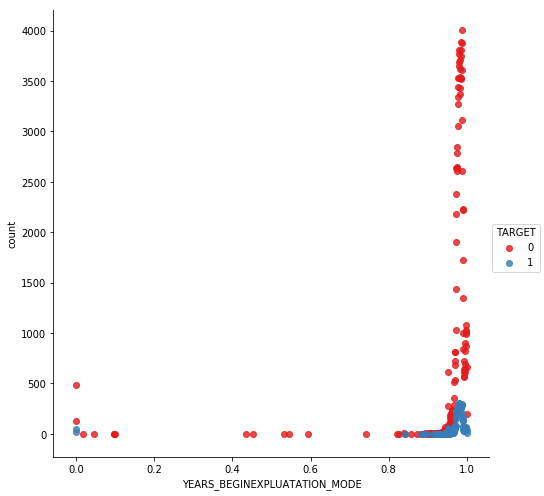

In [19]:
credit_risk_by_YEARS_BEGINEXPLUATATION_MODE = train[['YEARS_BEGINEXPLUATATION_MODE', 'TARGET']].groupby(['YEARS_BEGINEXPLUATATION_MODE', 'TARGET']).size().reset_index()
credit_risk_by_YEARS_BEGINEXPLUATATION_MODE.columns = ['YEARS_BEGINEXPLUATATION_MODE', 'TARGET', 'count']
sns.lmplot(x = 'YEARS_BEGINEXPLUATATION_MODE', y = 'count', data = credit_risk_by_YEARS_BEGINEXPLUATATION_MODE, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=7)

Text(0,0.5,'Frequency')

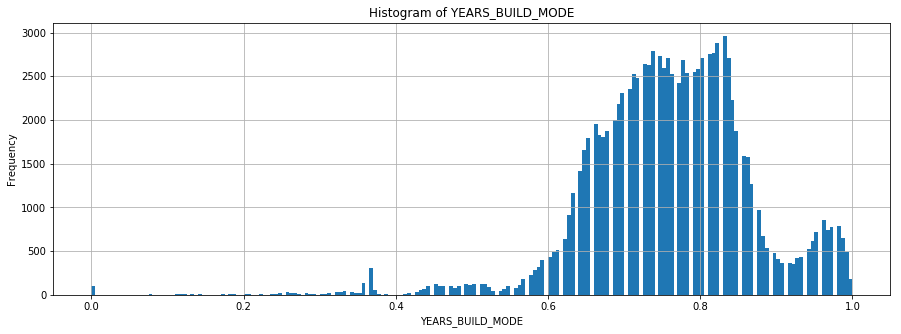

In [21]:
# Feature 60: YEARS_BUILD_MODE
ax = plt.figure(figsize=(15,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.YEARS_BUILD_MODE.hist(bins=200)
plt.title('Histogram of YEARS_BUILD_MODE')
plt.xlabel('YEARS_BUILD_MODE')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1cc06080>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


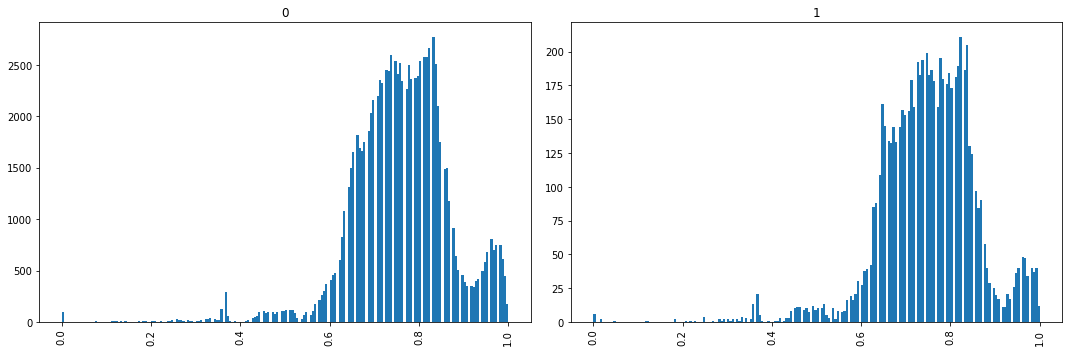

In [23]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='YEARS_BUILD_MODE',by='TARGET',bins=200,ax=axs)

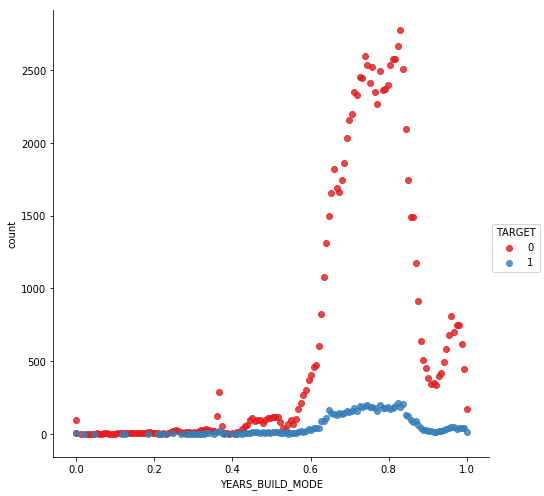

In [24]:
credit_risk_by_YEARS_BUILD_MODE = train[['YEARS_BUILD_MODE', 'TARGET']].groupby(['YEARS_BUILD_MODE', 'TARGET']).size().reset_index()
credit_risk_by_YEARS_BUILD_MODE.columns = ['YEARS_BUILD_MODE', 'TARGET', 'count']
sns.lmplot(x = 'YEARS_BUILD_MODE', y = 'count', data = credit_risk_by_YEARS_BUILD_MODE, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=7)

Text(0,0.5,'Frequency')

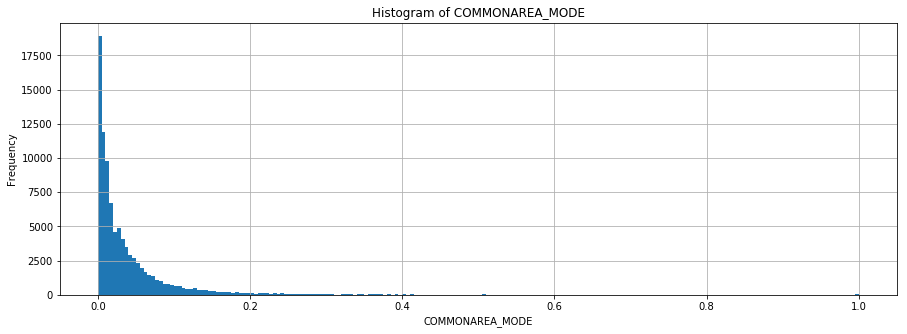

In [29]:
# Feature 61: COMMONAREA_MODE
ax = plt.figure(figsize=(15,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.COMMONAREA_MODE.hist(bins=200)
plt.title('Histogram of COMMONAREA_MODE')
plt.xlabel('COMMONAREA_MODE')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a20cdccf8>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


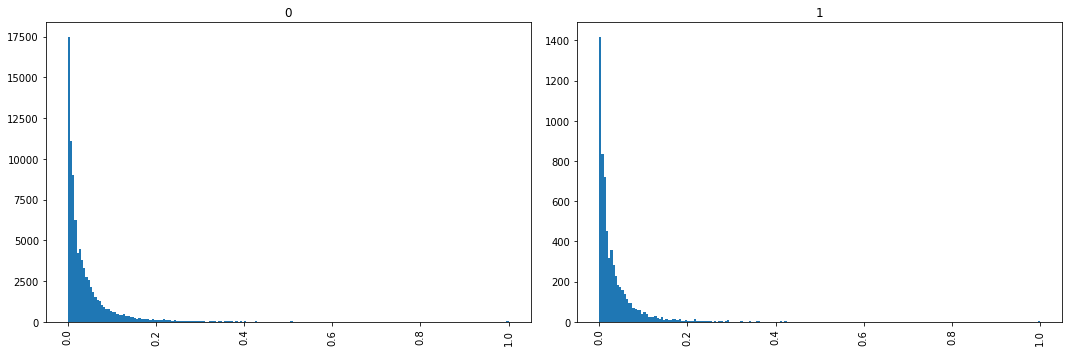

In [30]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='COMMONAREA_MODE',by='TARGET',bins=200,ax=axs)

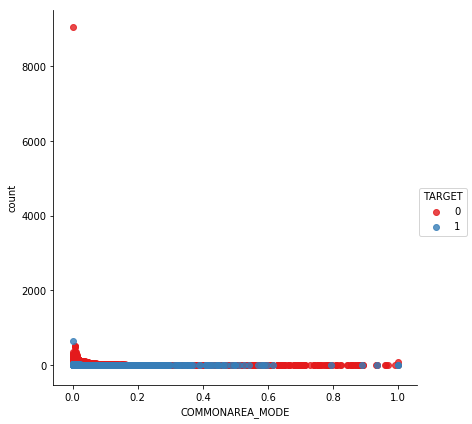

In [31]:
credit_risk_by_COMMONAREA_MODE = train[['COMMONAREA_MODE', 'TARGET']].groupby(['COMMONAREA_MODE', 'TARGET']).size().reset_index()
credit_risk_by_COMMONAREA_MODE.columns = ['COMMONAREA_MODE', 'TARGET', 'count']
sns.lmplot(x = 'COMMONAREA_MODE', y = 'count', data = credit_risk_by_COMMONAREA_MODE, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=6)

Text(0,0.5,'Frequency')

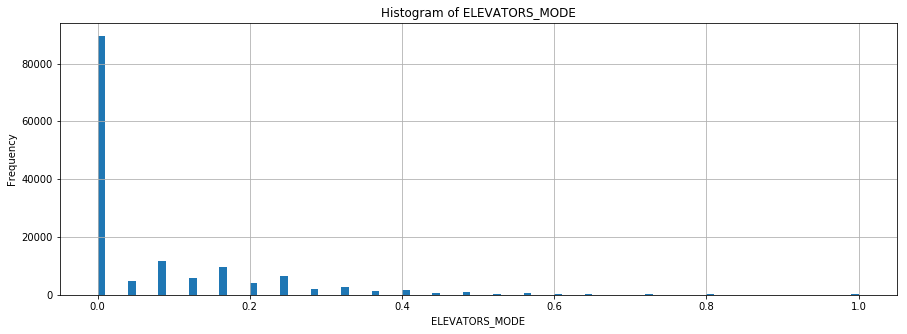

In [33]:
# Feature 62: ELEVATORS_MODE
ax = plt.figure(figsize=(15,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.ELEVATORS_MODE.hist(bins=100)
plt.title('Histogram of ELEVATORS_MODE')
plt.xlabel('ELEVATORS_MODE')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a227c1400>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


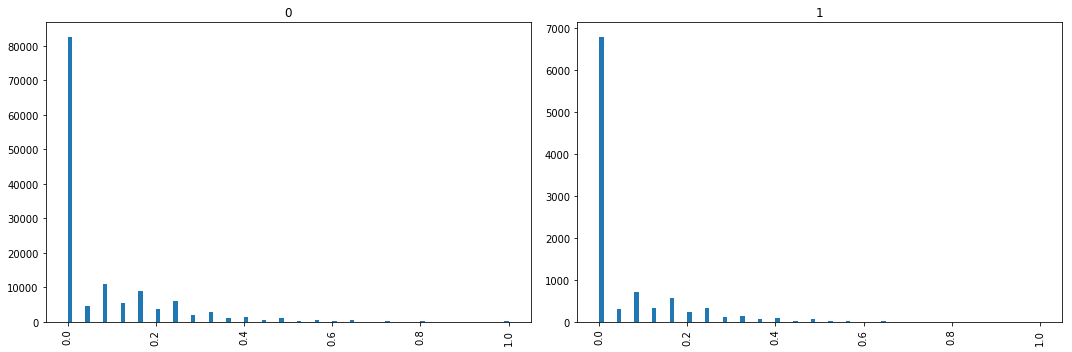

In [34]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='ELEVATORS_MODE',by='TARGET',bins=100,ax=axs)

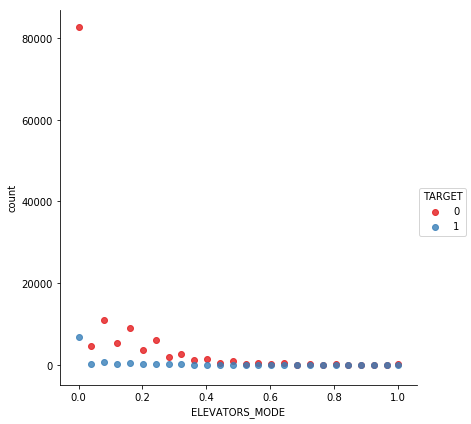

In [35]:
credit_risk_by_ELEVATORS_MODE = train[['ELEVATORS_MODE', 'TARGET']].groupby(['ELEVATORS_MODE', 'TARGET']).size().reset_index()
credit_risk_by_ELEVATORS_MODE.columns = ['ELEVATORS_MODE', 'TARGET', 'count']
sns.lmplot(x = 'ELEVATORS_MODE', y = 'count', data = credit_risk_by_ELEVATORS_MODE, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=6)

Text(0,0.5,'Frequency')

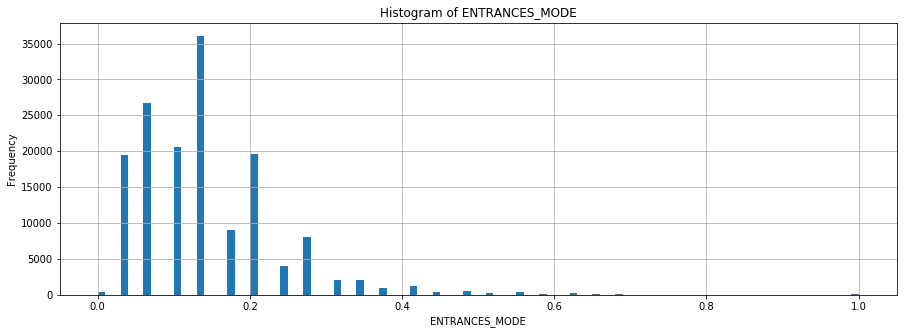

In [36]:
# Feature 63: ENTRANCES_MODE
ax = plt.figure(figsize=(15,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.ENTRANCES_MODE.hist(bins=100)
plt.title('Histogram of ENTRANCES_MODE')
plt.xlabel('ENTRANCES_MODE')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ef63f98>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


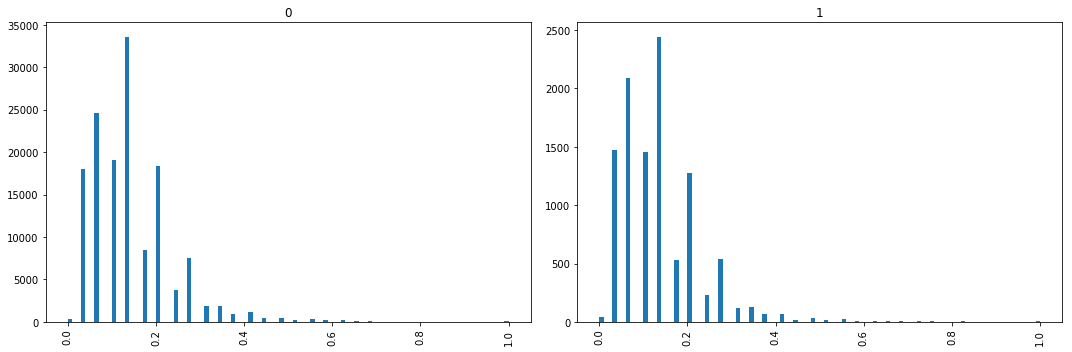

In [37]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='ENTRANCES_MODE',by='TARGET',bins=100,ax=axs)

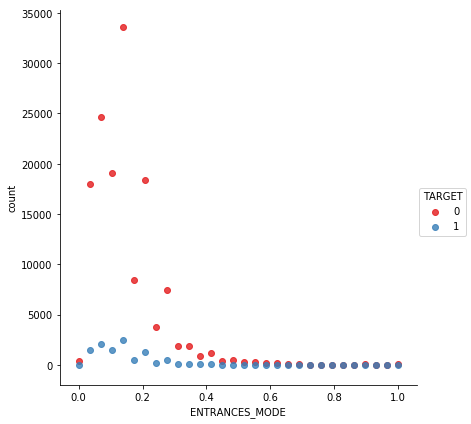

In [38]:
credit_risk_by_ENTRANCES_MODE = train[['ENTRANCES_MODE', 'TARGET']].groupby(['ENTRANCES_MODE', 'TARGET']).size().reset_index()
credit_risk_by_ENTRANCES_MODE.columns = ['ENTRANCES_MODE', 'TARGET', 'count']
sns.lmplot(x = 'ENTRANCES_MODE', y = 'count', data = credit_risk_by_ENTRANCES_MODE, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=6)

Text(0,0.5,'Frequency')

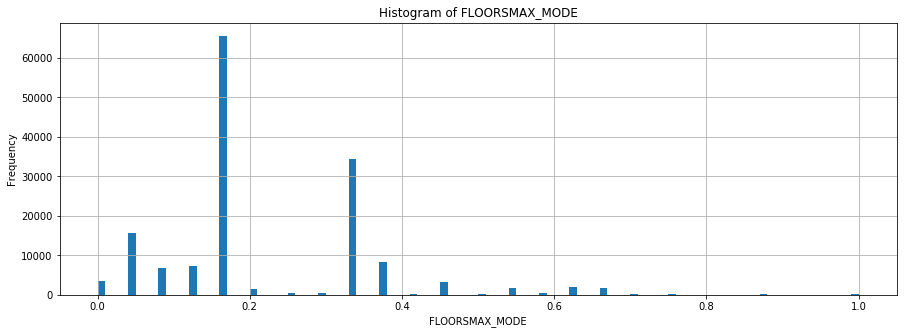

In [39]:
# Feature 64: FLOORSMAX_MODE
ax = plt.figure(figsize=(15,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.FLOORSMAX_MODE.hist(bins=100)
plt.title('Histogram of FLOORSMAX_MODE')
plt.xlabel('FLOORSMAX_MODE')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f23c940>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


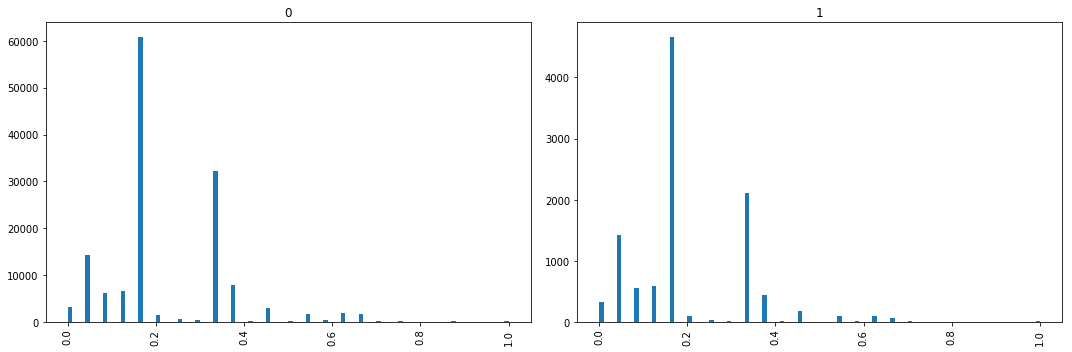

In [40]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='FLOORSMAX_MODE',by='TARGET',bins=100,ax=axs)

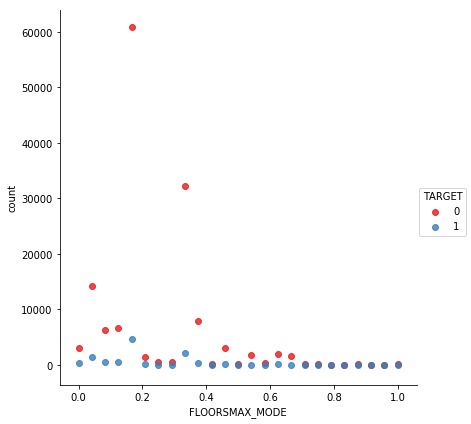

In [41]:
credit_risk_by_FLOORSMAX_MODE = train[['FLOORSMAX_MODE', 'TARGET']].groupby(['FLOORSMAX_MODE', 'TARGET']).size().reset_index()
credit_risk_by_FLOORSMAX_MODE.columns = ['FLOORSMAX_MODE', 'TARGET', 'count']
sns.lmplot(x = 'FLOORSMAX_MODE', y = 'count', data = credit_risk_by_FLOORSMAX_MODE, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=6)

Text(0,0.5,'Frequency')

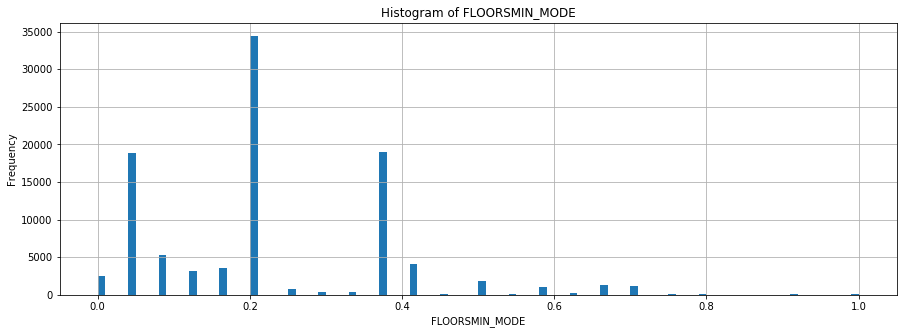

In [42]:
# Feature 65: FLOORSMIN_MODE
ax = plt.figure(figsize=(15,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.FLOORSMIN_MODE.hist(bins=100)
plt.title('Histogram of FLOORSMIN_MODE')
plt.xlabel('FLOORSMIN_MODE')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a23d1ab00>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


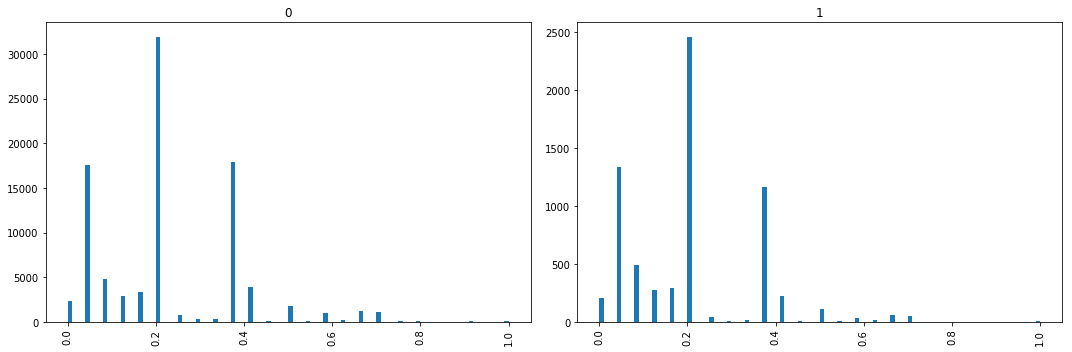

In [43]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='FLOORSMIN_MODE',by='TARGET',bins=100,ax=axs)

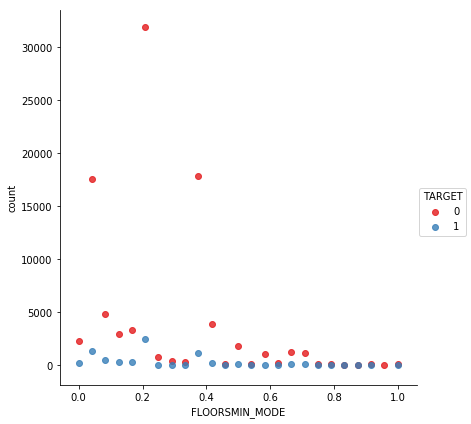

In [44]:
credit_risk_by_FLOORSMIN_MODE = train[['FLOORSMIN_MODE', 'TARGET']].groupby(['FLOORSMIN_MODE', 'TARGET']).size().reset_index()
credit_risk_by_FLOORSMIN_MODE.columns = ['FLOORSMIN_MODE', 'TARGET', 'count']
sns.lmplot(x = 'FLOORSMIN_MODE', y = 'count', data = credit_risk_by_FLOORSMIN_MODE, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=6)

Text(0,0.5,'Frequency')

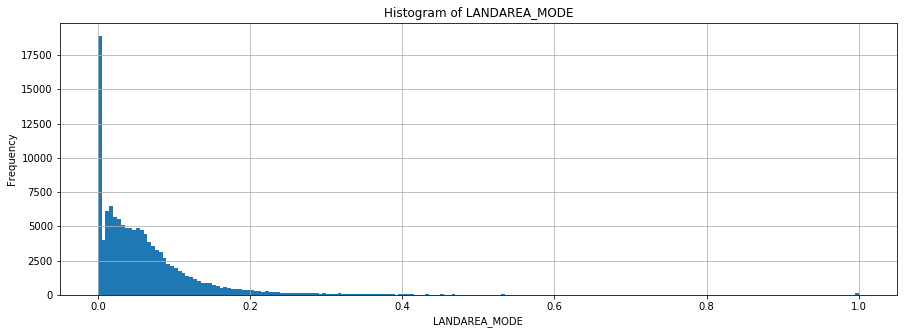

In [46]:
# Feature 66: LANDAREA_MODE
ax = plt.figure(figsize=(15,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.LANDAREA_MODE.hist(bins=200)
plt.title('Histogram of LANDAREA_MODE')
plt.xlabel('LANDAREA_MODE')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2651b6d8>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


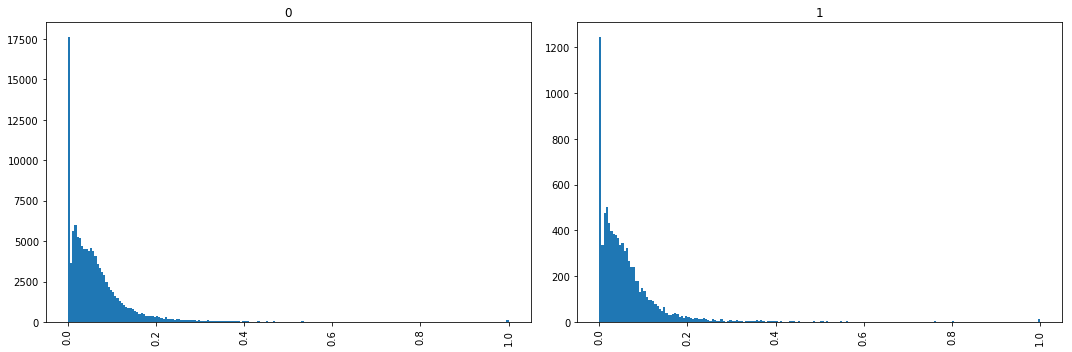

In [47]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='LANDAREA_MODE',by='TARGET',bins=200,ax=axs)

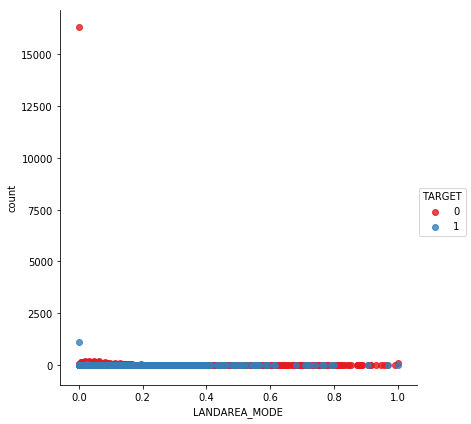

In [48]:
credit_risk_by_LANDAREA_MODE = train[['LANDAREA_MODE', 'TARGET']].groupby(['LANDAREA_MODE', 'TARGET']).size().reset_index()
credit_risk_by_LANDAREA_MODE.columns = ['LANDAREA_MODE', 'TARGET', 'count']
sns.lmplot(x = 'LANDAREA_MODE', y = 'count', data = credit_risk_by_LANDAREA_MODE, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=6)

Text(0,0.5,'Frequency')

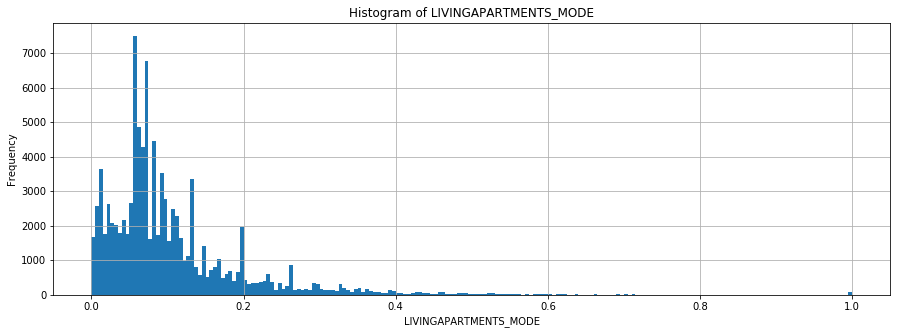

In [49]:
# Feature 67: LIVINGAPARTMENTS_MODE
ax = plt.figure(figsize=(15,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.LIVINGAPARTMENTS_MODE.hist(bins=200)
plt.title('Histogram of LIVINGAPARTMENTS_MODE')
plt.xlabel('LIVINGAPARTMENTS_MODE')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a224882e8>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


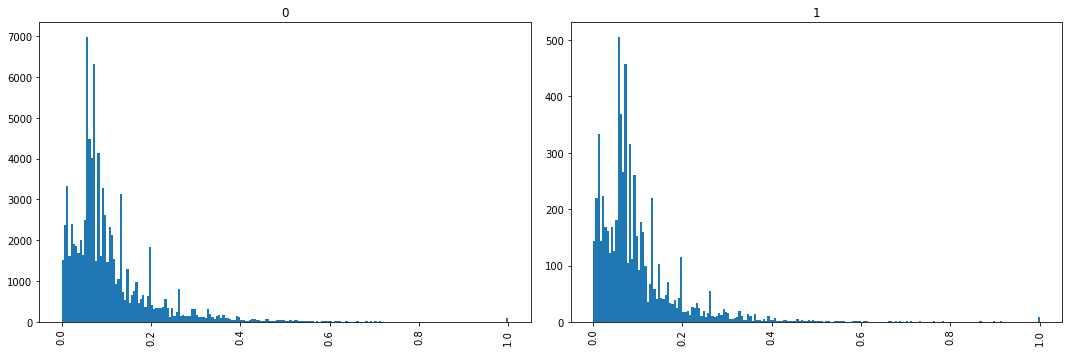

In [50]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='LIVINGAPARTMENTS_MODE',by='TARGET',bins=200,ax=axs)

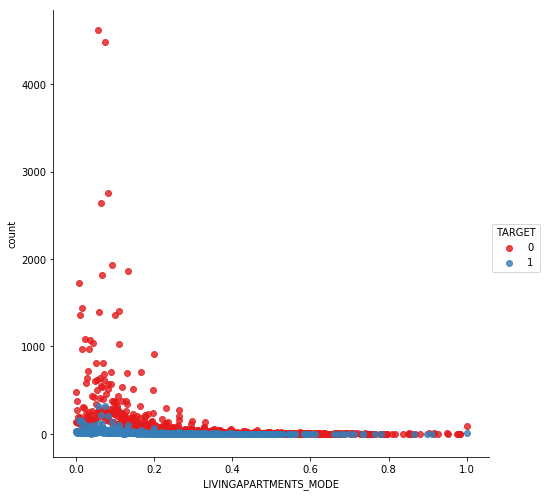

In [52]:
credit_risk_by_LIVINGAPARTMENTS_MODE = train[['LIVINGAPARTMENTS_MODE', 'TARGET']].groupby(['LIVINGAPARTMENTS_MODE', 'TARGET']).size().reset_index()
credit_risk_by_LIVINGAPARTMENTS_MODE.columns = ['LIVINGAPARTMENTS_MODE', 'TARGET', 'count']
sns.lmplot(x = 'LIVINGAPARTMENTS_MODE', y = 'count', data = credit_risk_by_LIVINGAPARTMENTS_MODE, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=7)

Text(0,0.5,'Frequency')

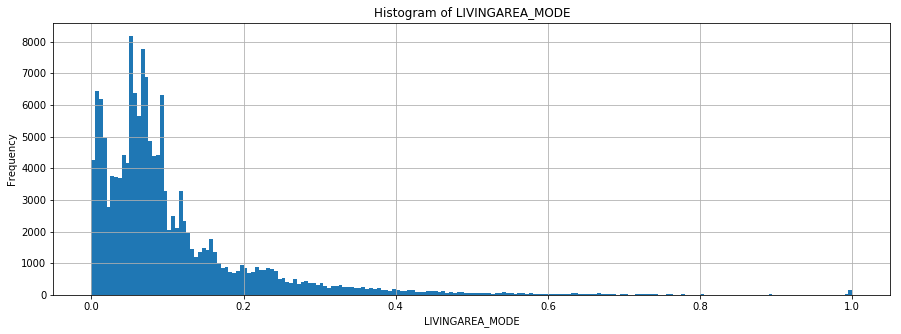

In [53]:
# Feature 68: LIVINGAREA_MODE
ax = plt.figure(figsize=(15,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.LIVINGAREA_MODE.hist(bins=200)
plt.title('Histogram of LIVINGAREA_MODE')
plt.xlabel('LIVINGAREA_MODE')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a22389b00>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


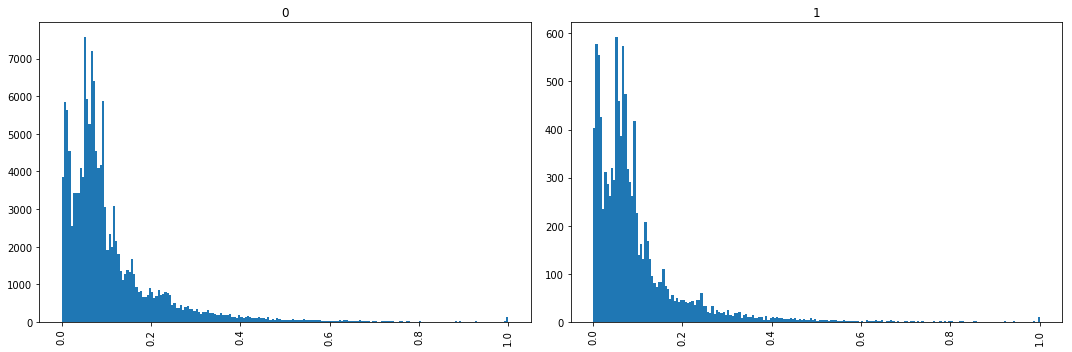

In [54]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='LIVINGAREA_MODE',by='TARGET',bins=200,ax=axs)

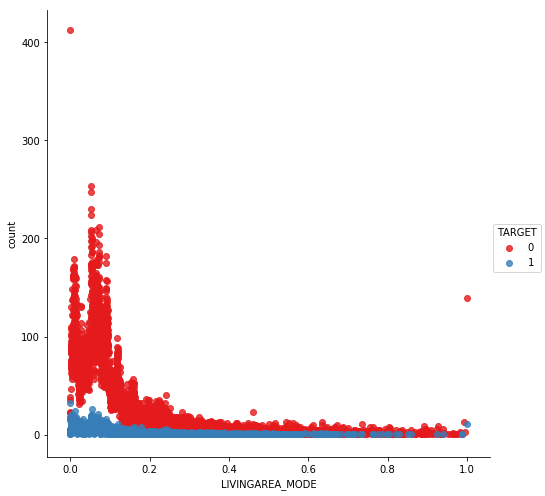

In [55]:
credit_risk_by_LIVINGAREA_MODE = train[['LIVINGAREA_MODE', 'TARGET']].groupby(['LIVINGAREA_MODE', 'TARGET']).size().reset_index()
credit_risk_by_LIVINGAREA_MODE.columns = ['LIVINGAREA_MODE', 'TARGET', 'count']
sns.lmplot(x = 'LIVINGAREA_MODE', y = 'count', data = credit_risk_by_LIVINGAREA_MODE, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=7)

Text(0,0.5,'Frequency')

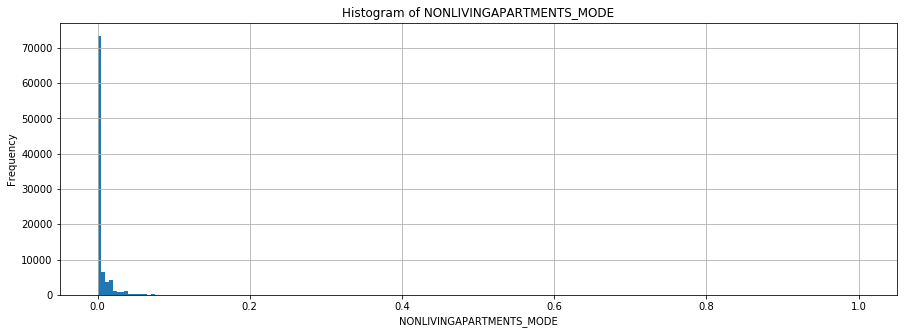

In [56]:
# Feature 69: NONLIVINGAPARTMENTS_MODE
ax = plt.figure(figsize=(15,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.NONLIVINGAPARTMENTS_MODE.hist(bins=200)
plt.title('Histogram of NONLIVINGAPARTMENTS_MODE')
plt.xlabel('NONLIVINGAPARTMENTS_MODE')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a25718fd0>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


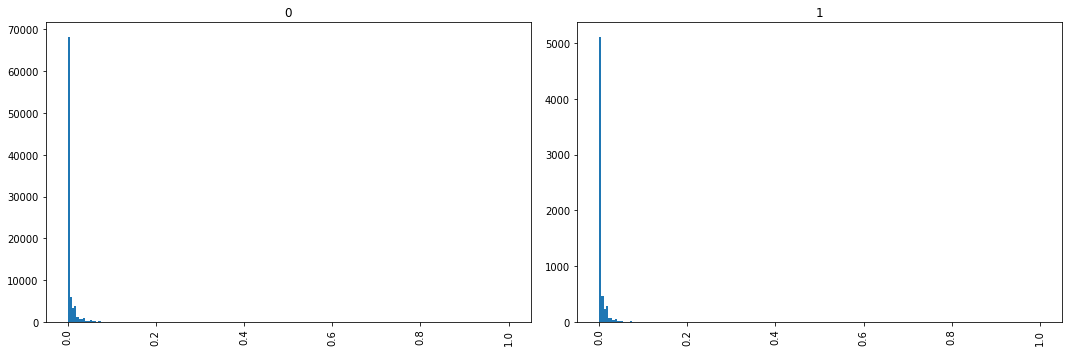

In [57]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='NONLIVINGAPARTMENTS_MODE',by='TARGET',bins=200,ax=axs)

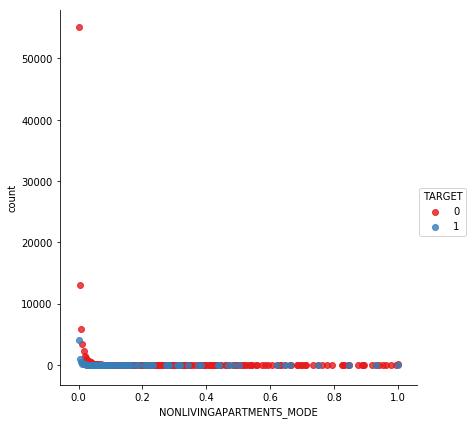

In [58]:
credit_risk_by_NONLIVINGAPARTMENTS_MODE = train[['NONLIVINGAPARTMENTS_MODE', 'TARGET']].groupby(['NONLIVINGAPARTMENTS_MODE', 'TARGET']).size().reset_index()
credit_risk_by_NONLIVINGAPARTMENTS_MODE.columns = ['NONLIVINGAPARTMENTS_MODE', 'TARGET', 'count']
sns.lmplot(x = 'NONLIVINGAPARTMENTS_MODE', y = 'count', data = credit_risk_by_NONLIVINGAPARTMENTS_MODE, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=6)

Text(0,0.5,'Frequency')

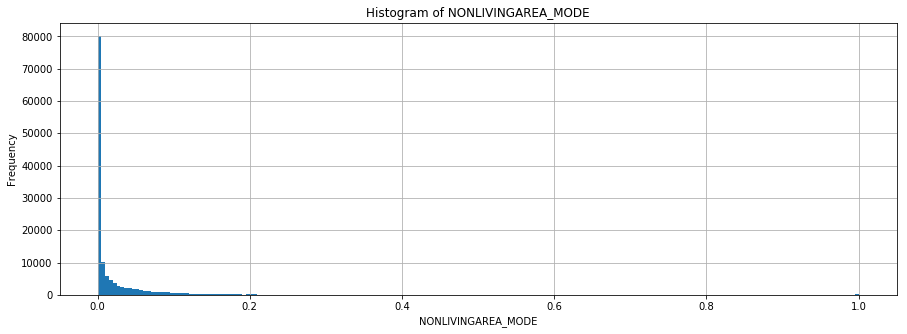

In [59]:
# Feature 70: NONLIVINGAREA_MODE
ax = plt.figure(figsize=(15,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.NONLIVINGAREA_MODE.hist(bins=200)
plt.title('Histogram of NONLIVINGAREA_MODE')
plt.xlabel('NONLIVINGAREA_MODE')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a3c007748>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


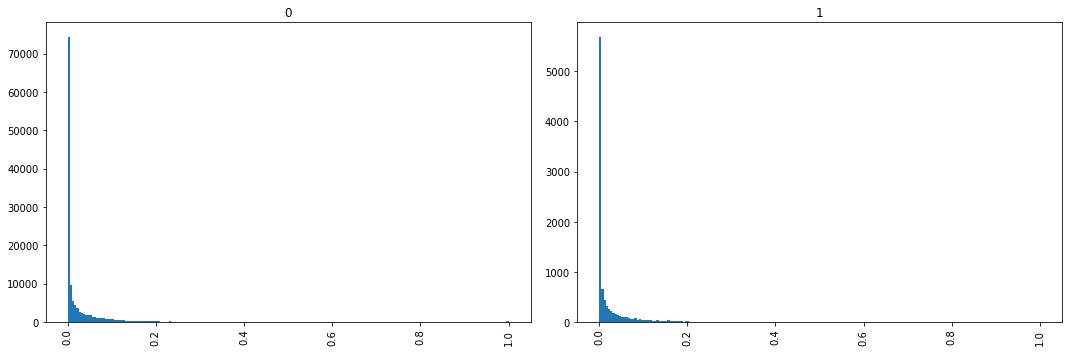

In [60]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='NONLIVINGAREA_MODE',by='TARGET',bins=200,ax=axs)

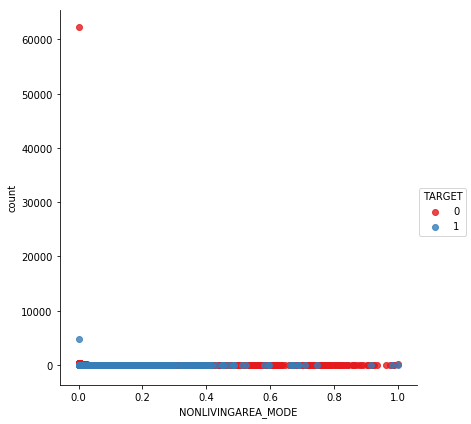

In [61]:
credit_risk_by_NONLIVINGAREA_MODE = train[['NONLIVINGAREA_MODE', 'TARGET']].groupby(['NONLIVINGAREA_MODE', 'TARGET']).size().reset_index()
credit_risk_by_NONLIVINGAREA_MODE.columns = ['NONLIVINGAREA_MODE', 'TARGET', 'count']
sns.lmplot(x = 'NONLIVINGAREA_MODE', y = 'count', data = credit_risk_by_NONLIVINGAREA_MODE, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=6)

Text(0,0.5,'Frequency')

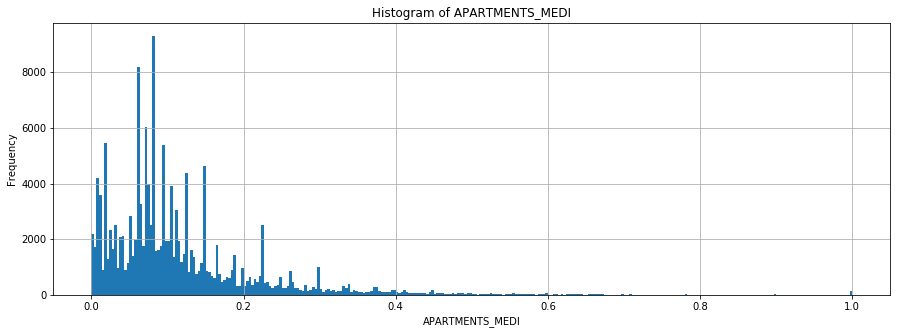

In [5]:
# Feature 71: APARTMENTS_MEDI
ax = plt.figure(figsize=(15,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.APARTMENTS_MEDI.hist(bins=300)
plt.title('Histogram of APARTMENTS_MEDI')
plt.xlabel('APARTMENTS_MEDI')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10d2dc4a8>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


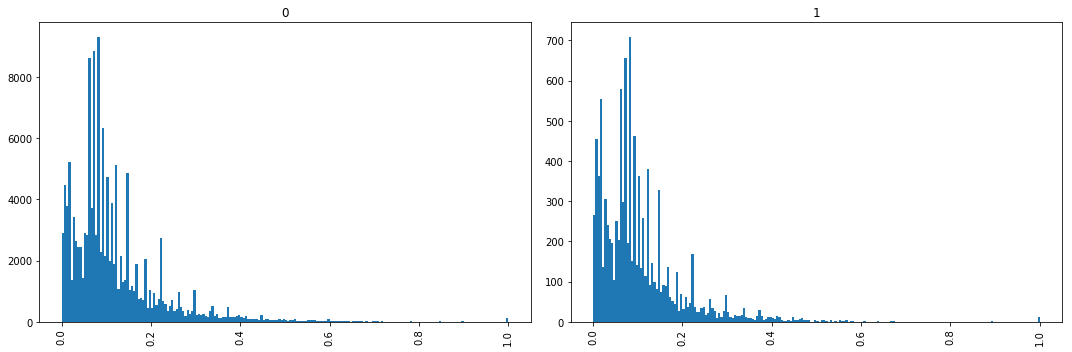

In [6]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='APARTMENTS_MEDI',by='TARGET',bins=200,ax=axs)

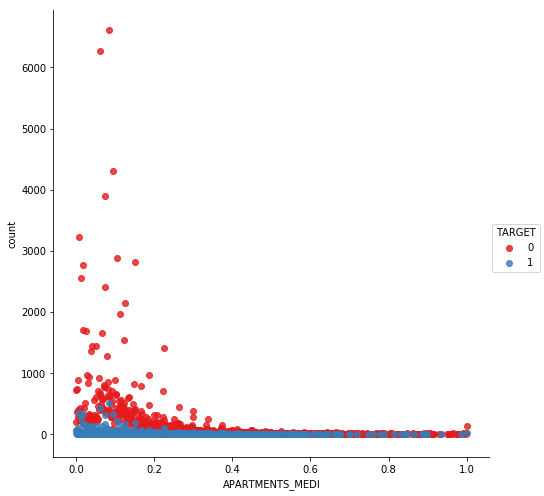

In [8]:
credit_risk_by_APARTMENTS_MEDI = train[['APARTMENTS_MEDI', 'TARGET']].groupby(['APARTMENTS_MEDI', 'TARGET']).size().reset_index()
credit_risk_by_APARTMENTS_MEDI.columns = ['APARTMENTS_MEDI', 'TARGET', 'count']
sns.lmplot(x = 'APARTMENTS_MEDI', y = 'count', data = credit_risk_by_APARTMENTS_MEDI, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=7)

Text(0,0.5,'Frequency')

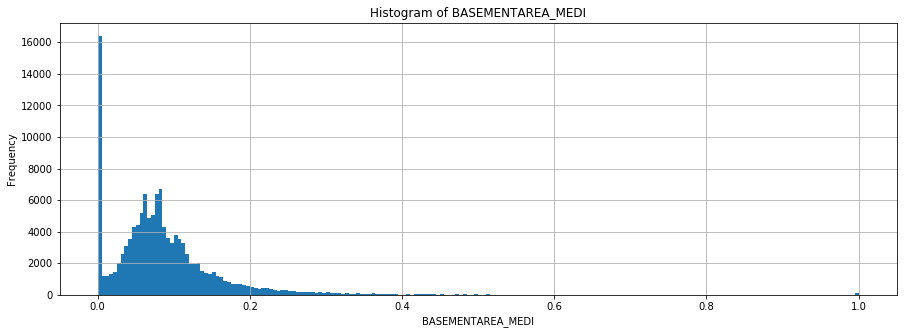

In [10]:
# Feature 72: BASEMENTAREA_MEDI
ax = plt.figure(figsize=(15,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.BASEMENTAREA_MEDI.hist(bins=200)
plt.title('Histogram of BASEMENTAREA_MEDI')
plt.xlabel('BASEMENTAREA_MEDI')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a15831358>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


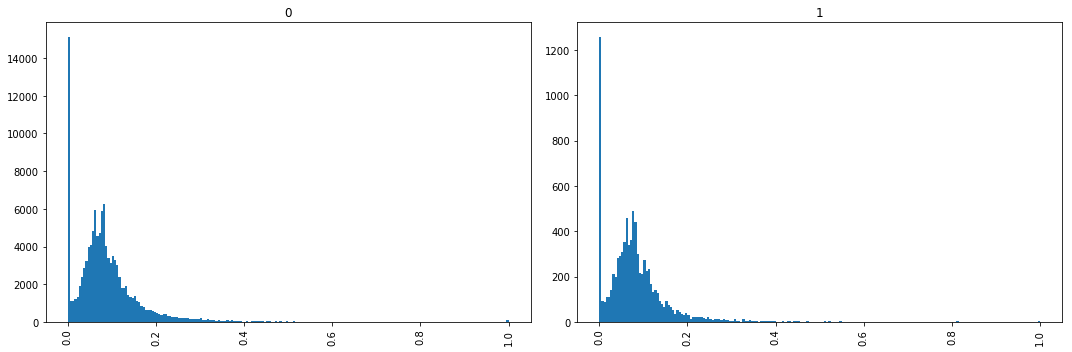

In [11]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='BASEMENTAREA_MEDI',by='TARGET',bins=200,ax=axs)

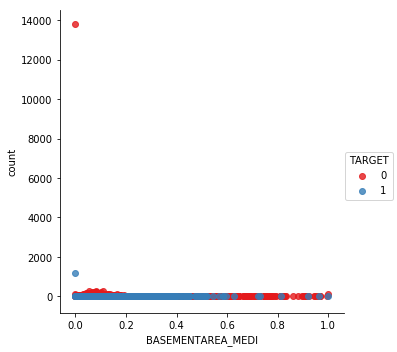

In [13]:
credit_risk_by_BASEMENTAREA_MEDI = train[['BASEMENTAREA_MEDI', 'TARGET']].groupby(['BASEMENTAREA_MEDI', 'TARGET']).size().reset_index()
credit_risk_by_BASEMENTAREA_MEDI.columns = ['BASEMENTAREA_MEDI', 'TARGET', 'count']
sns.lmplot(x = 'BASEMENTAREA_MEDI', y = 'count', data = credit_risk_by_BASEMENTAREA_MEDI, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=5)

Text(0,0.5,'Frequency')

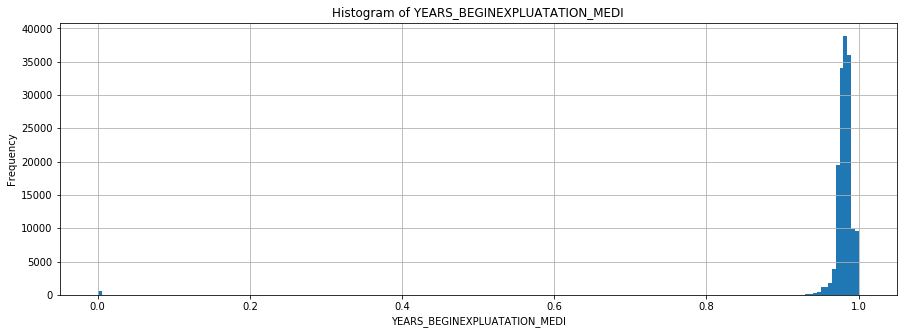

In [16]:
# Feature 73: YEARS_BEGINEXPLUATATION_MEDI
ax = plt.figure(figsize=(15,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.YEARS_BEGINEXPLUATATION_MEDI.hist(bins=200)
plt.title('Histogram of YEARS_BEGINEXPLUATATION_MEDI')
plt.xlabel('YEARS_BEGINEXPLUATATION_MEDI')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a13ad1eb8>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


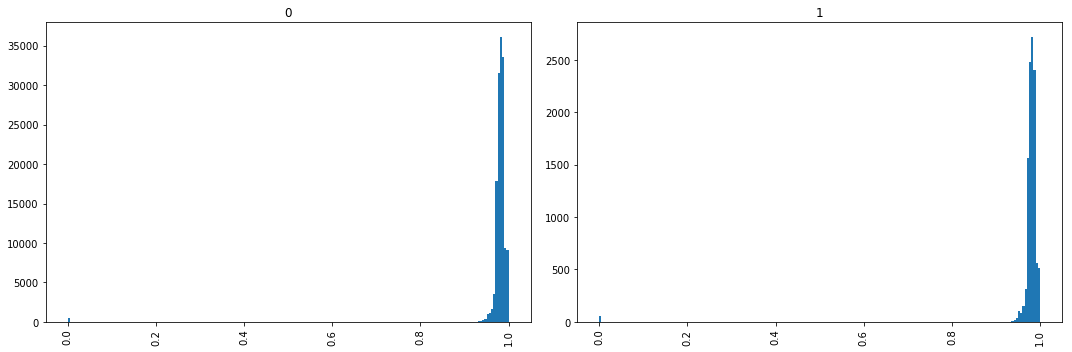

In [17]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='YEARS_BEGINEXPLUATATION_MEDI',by='TARGET',bins=200,ax=axs)

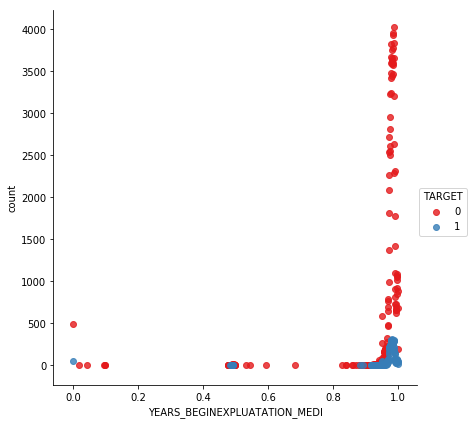

In [19]:
credit_risk_by_YEARS_BEGINEXPLUATATION_MEDI = train[['YEARS_BEGINEXPLUATATION_MEDI', 'TARGET']].groupby(['YEARS_BEGINEXPLUATATION_MEDI', 'TARGET']).size().reset_index()
credit_risk_by_YEARS_BEGINEXPLUATATION_MEDI.columns = ['YEARS_BEGINEXPLUATATION_MEDI', 'TARGET', 'count']
sns.lmplot(x = 'YEARS_BEGINEXPLUATATION_MEDI', y = 'count', data = credit_risk_by_YEARS_BEGINEXPLUATATION_MEDI, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=6)

Text(0,0.5,'Frequency')

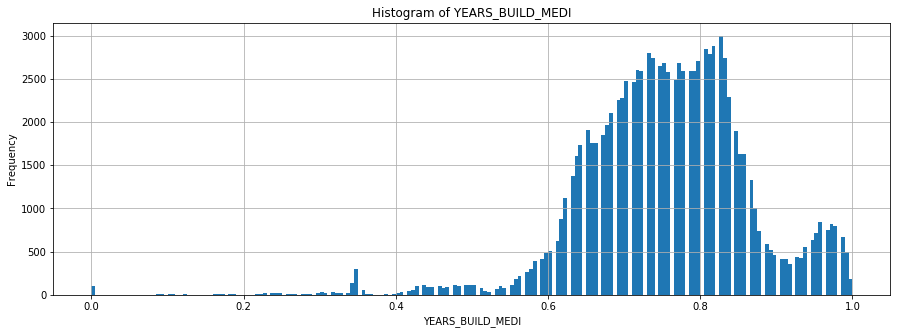

In [20]:
# Feature 74: YEARS_BUILD_MEDI
ax = plt.figure(figsize=(15,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.YEARS_BUILD_MEDI.hist(bins=200)
plt.title('Histogram of YEARS_BUILD_MEDI')
plt.xlabel('YEARS_BUILD_MEDI')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a17cb0a90>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


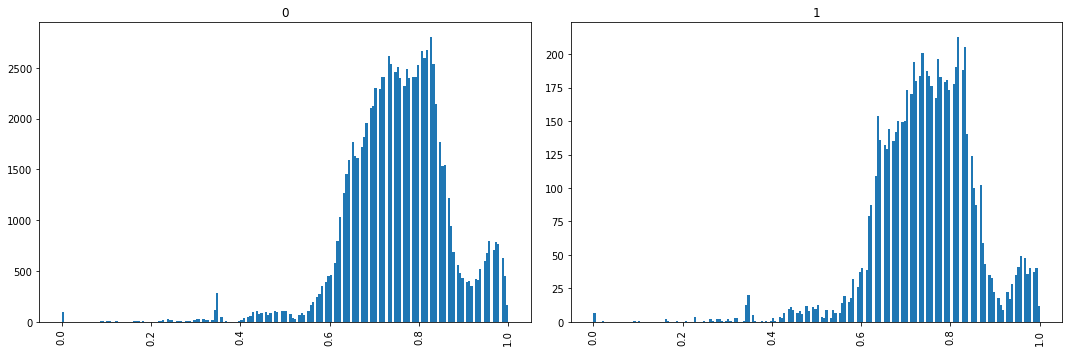

In [21]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='YEARS_BUILD_MEDI',by='TARGET',bins=200,ax=axs)

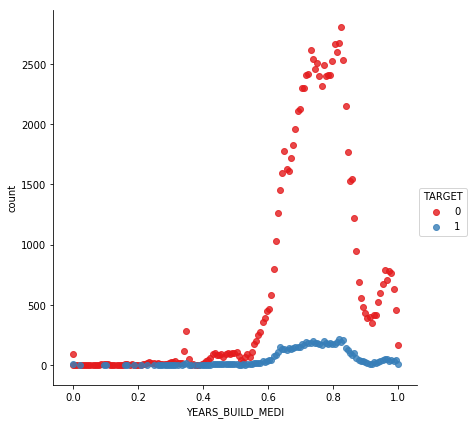

In [22]:
credit_risk_by_YEARS_BUILD_MEDI = train[['YEARS_BUILD_MEDI', 'TARGET']].groupby(['YEARS_BUILD_MEDI', 'TARGET']).size().reset_index()
credit_risk_by_YEARS_BUILD_MEDI.columns = ['YEARS_BUILD_MEDI', 'TARGET', 'count']
sns.lmplot(x = 'YEARS_BUILD_MEDI', y = 'count', data = credit_risk_by_YEARS_BUILD_MEDI, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=6)

Text(0,0.5,'Frequency')

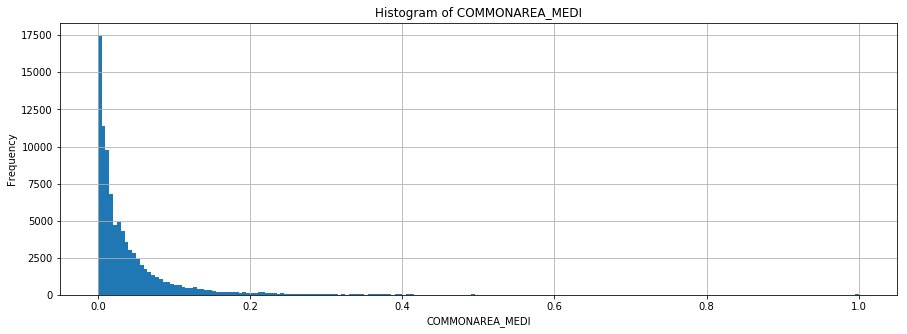

In [23]:
# Feature 75: COMMONAREA_MEDI
ax = plt.figure(figsize=(15,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.COMMONAREA_MEDI.hist(bins=200)
plt.title('Histogram of COMMONAREA_MEDI')
plt.xlabel('COMMONAREA_MEDI')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a144dc978>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


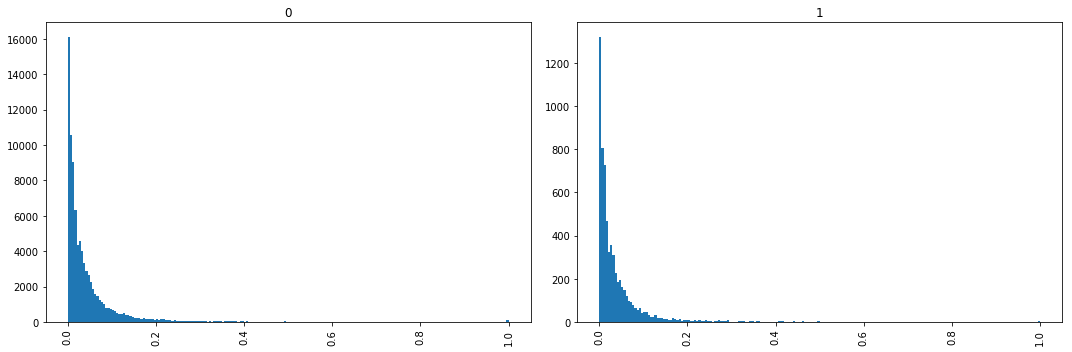

In [24]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='COMMONAREA_MEDI',by='TARGET',bins=200,ax=axs)

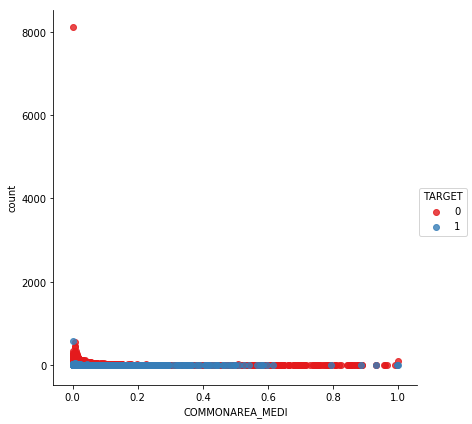

In [25]:
credit_risk_by_COMMONAREA_MEDI = train[['COMMONAREA_MEDI', 'TARGET']].groupby(['COMMONAREA_MEDI', 'TARGET']).size().reset_index()
credit_risk_by_COMMONAREA_MEDI.columns = ['COMMONAREA_MEDI', 'TARGET', 'count']
sns.lmplot(x = 'COMMONAREA_MEDI', y = 'count', data = credit_risk_by_COMMONAREA_MEDI, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=6)

Text(0,0.5,'Frequency')

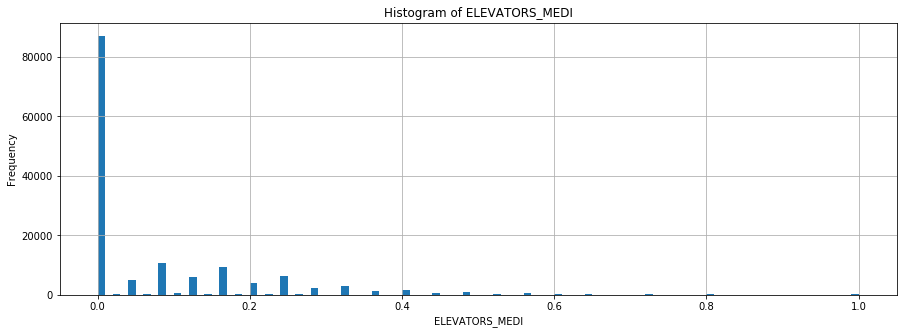

In [27]:
# Feature 76: ELEVATORS_MEDI
ax = plt.figure(figsize=(15,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.ELEVATORS_MEDI.hist(bins=100)
plt.title('Histogram of ELEVATORS_MEDI')
plt.xlabel('ELEVATORS_MEDI')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a19423cc0>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


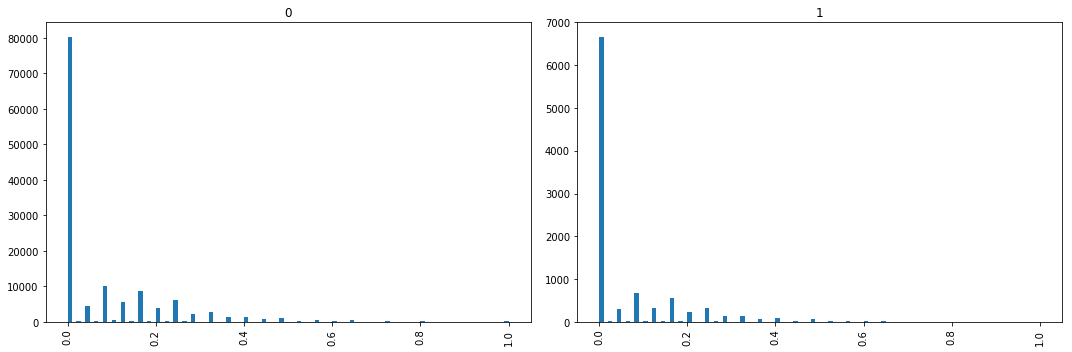

In [28]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='ELEVATORS_MEDI',by='TARGET',bins=100,ax=axs)

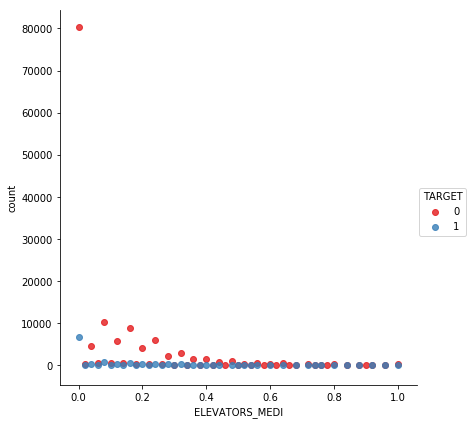

In [29]:
credit_risk_by_ELEVATORS_MEDI = train[['ELEVATORS_MEDI', 'TARGET']].groupby(['ELEVATORS_MEDI', 'TARGET']).size().reset_index()
credit_risk_by_ELEVATORS_MEDI.columns = ['ELEVATORS_MEDI', 'TARGET', 'count']
sns.lmplot(x = 'ELEVATORS_MEDI', y = 'count', data = credit_risk_by_ELEVATORS_MEDI, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=6)

Text(0,0.5,'Frequency')

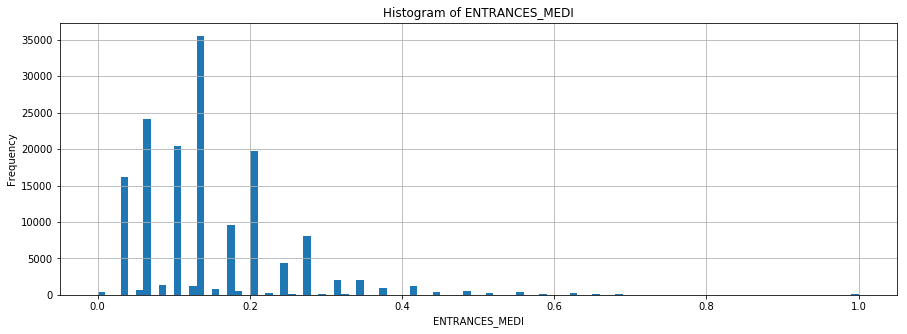

In [30]:
# Feature 77: ENTRANCES_MEDI
ax = plt.figure(figsize=(15,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.ENTRANCES_MEDI.hist(bins=100)
plt.title('Histogram of ENTRANCES_MEDI')
plt.xlabel('ENTRANCES_MEDI')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a170d8ba8>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


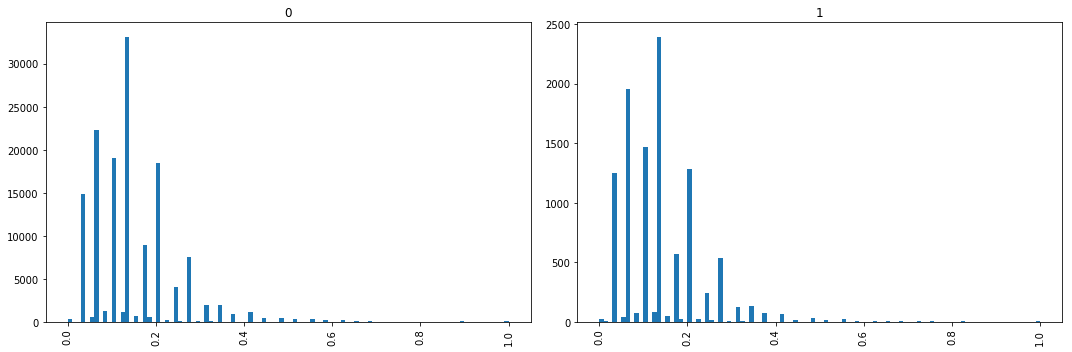

In [31]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='ENTRANCES_MEDI',by='TARGET',bins=100,ax=axs)

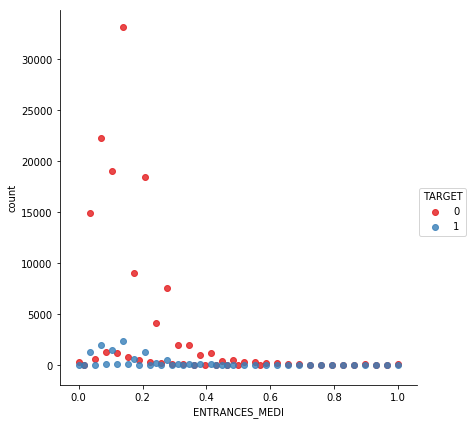

In [32]:
credit_risk_by_ENTRANCES_MEDI = train[['ENTRANCES_MEDI', 'TARGET']].groupby(['ENTRANCES_MEDI', 'TARGET']).size().reset_index()
credit_risk_by_ENTRANCES_MEDI.columns = ['ENTRANCES_MEDI', 'TARGET', 'count']
sns.lmplot(x = 'ENTRANCES_MEDI', y = 'count', data = credit_risk_by_ENTRANCES_MEDI, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=6)

Text(0,0.5,'Frequency')

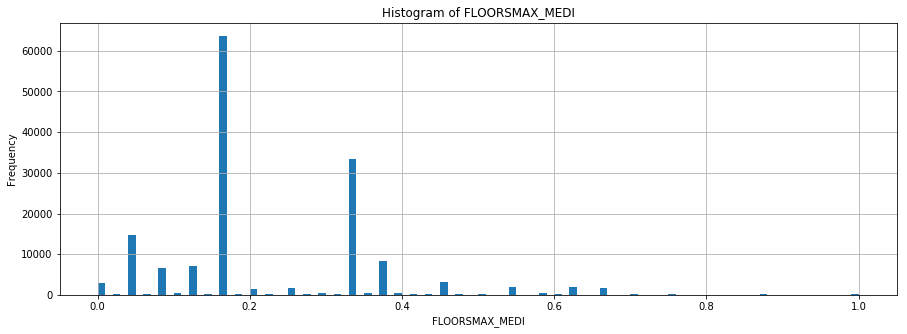

In [33]:
# Feature 78: FLOORSMAX_MEDI
ax = plt.figure(figsize=(15,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.FLOORSMAX_MEDI.hist(bins=100)
plt.title('Histogram of FLOORSMAX_MEDI')
plt.xlabel('FLOORSMAX_MEDI')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a17aeb668>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


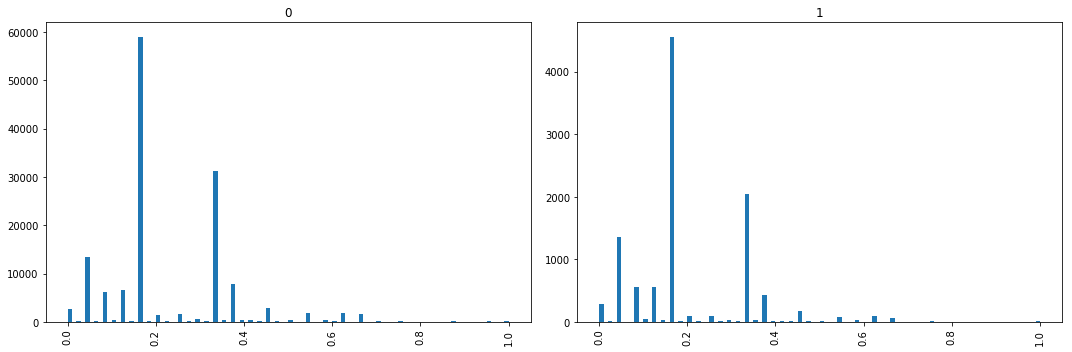

In [34]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='FLOORSMAX_MEDI',by='TARGET',bins=100,ax=axs)

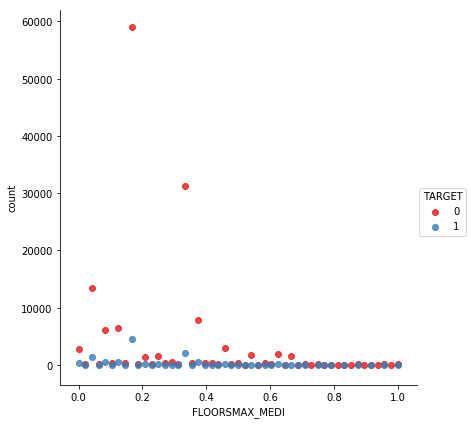

In [36]:
credit_risk_by_FLOORSMAX_MEDI = train[['FLOORSMAX_MEDI', 'TARGET']].groupby(['FLOORSMAX_MEDI', 'TARGET']).size().reset_index()
credit_risk_by_FLOORSMAX_MEDI.columns = ['FLOORSMAX_MEDI', 'TARGET', 'count']
sns.lmplot(x = 'FLOORSMAX_MEDI', y = 'count', data = credit_risk_by_FLOORSMAX_MEDI, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=6)

Text(0,0.5,'Frequency')

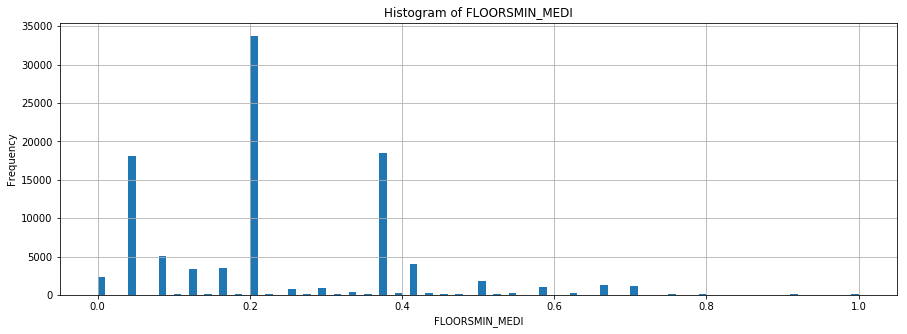

In [37]:
# Feature 79: FLOORSMIN_MEDI
ax = plt.figure(figsize=(15,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.FLOORSMIN_MEDI.hist(bins=100)
plt.title('Histogram of FLOORSMIN_MEDI')
plt.xlabel('FLOORSMIN_MEDI')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1bd56ba8>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


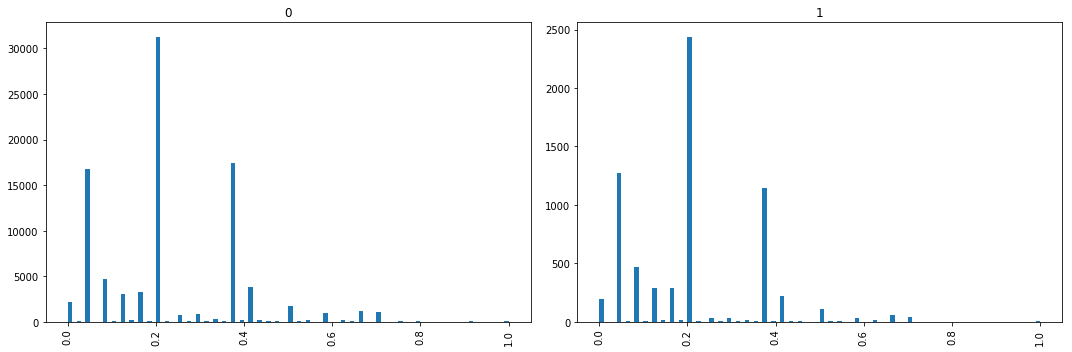

In [38]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='FLOORSMIN_MEDI',by='TARGET',bins=100,ax=axs)

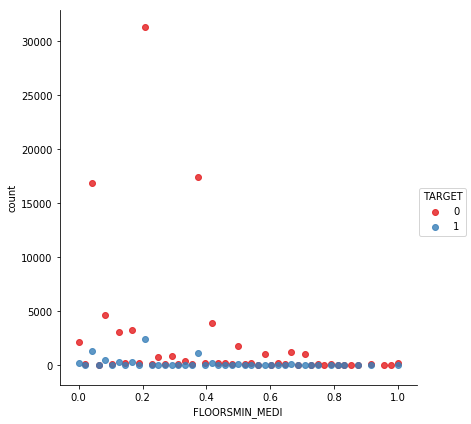

In [39]:
credit_risk_by_FLOORSMIN_MEDI = train[['FLOORSMIN_MEDI', 'TARGET']].groupby(['FLOORSMIN_MEDI', 'TARGET']).size().reset_index()
credit_risk_by_FLOORSMIN_MEDI.columns = ['FLOORSMIN_MEDI', 'TARGET', 'count']
sns.lmplot(x = 'FLOORSMIN_MEDI', y = 'count', data = credit_risk_by_FLOORSMIN_MEDI, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=6)

Text(0,0.5,'Frequency')

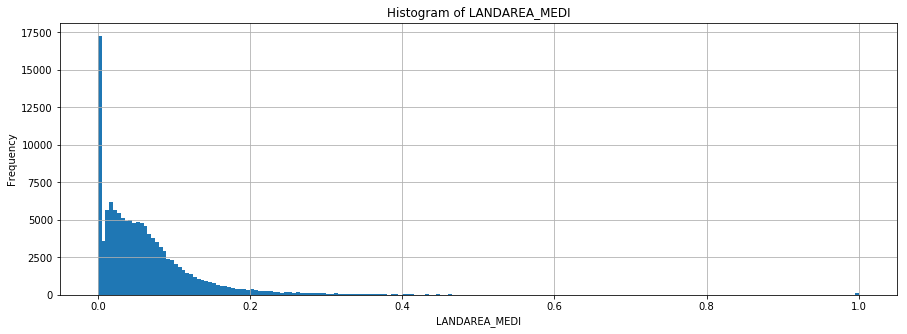

In [41]:
# Feature 80: LANDAREA_MEDI
ax = plt.figure(figsize=(15,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.LANDAREA_MEDI.hist(bins=200)
plt.title('Histogram of LANDAREA_MEDI')
plt.xlabel('LANDAREA_MEDI')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b0eeb70>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


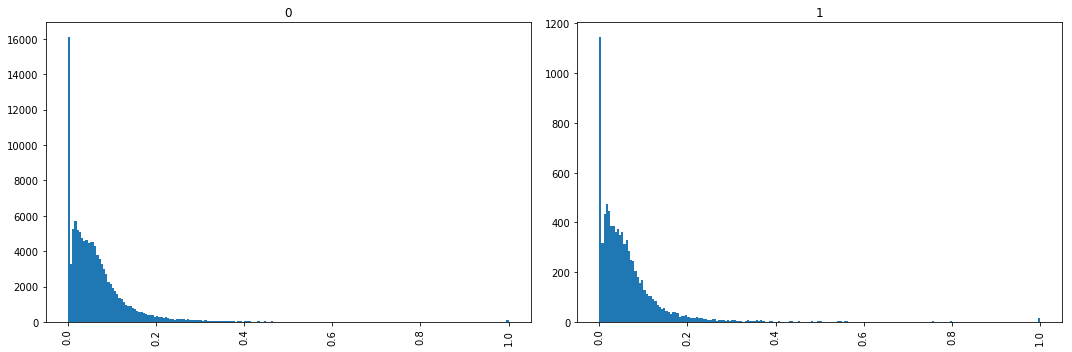

In [42]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='LANDAREA_MEDI',by='TARGET',bins=200,ax=axs)

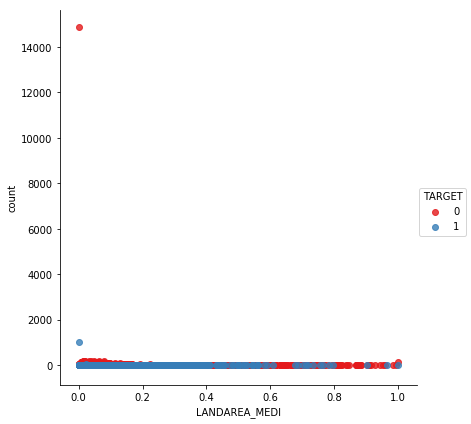

In [43]:
credit_risk_by_LANDAREA_MEDI = train[['LANDAREA_MEDI', 'TARGET']].groupby(['LANDAREA_MEDI', 'TARGET']).size().reset_index()
credit_risk_by_LANDAREA_MEDI.columns = ['LANDAREA_MEDI', 'TARGET', 'count']
sns.lmplot(x = 'LANDAREA_MEDI', y = 'count', data = credit_risk_by_LANDAREA_MEDI, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=6)

Text(0,0.5,'Frequency')

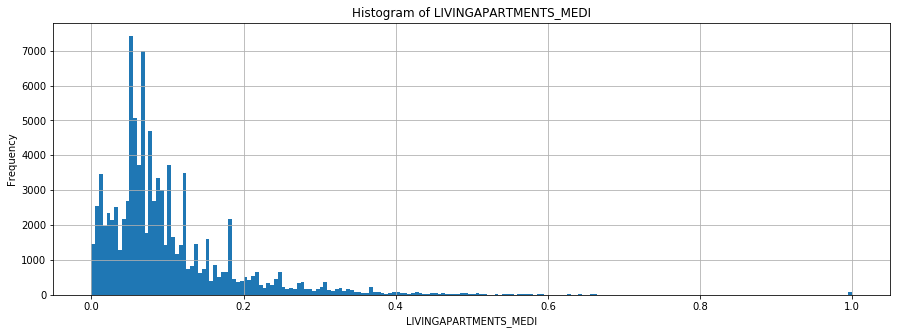

In [44]:
# Feature 81: LIVINGAPARTMENTS_MEDI
ax = plt.figure(figsize=(15,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.LIVINGAPARTMENTS_MEDI.hist(bins=200)
plt.title('Histogram of LIVINGAPARTMENTS_MEDI')
plt.xlabel('LIVINGAPARTMENTS_MEDI')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1cb7c8d0>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


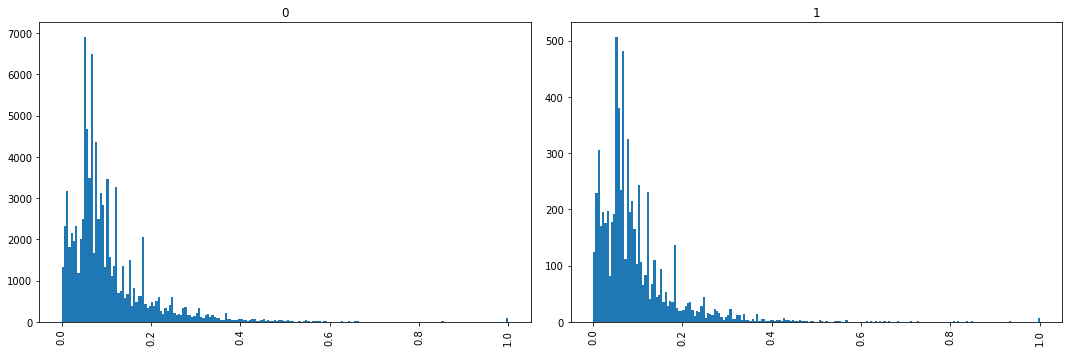

In [45]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='LIVINGAPARTMENTS_MEDI',by='TARGET',bins=200,ax=axs)

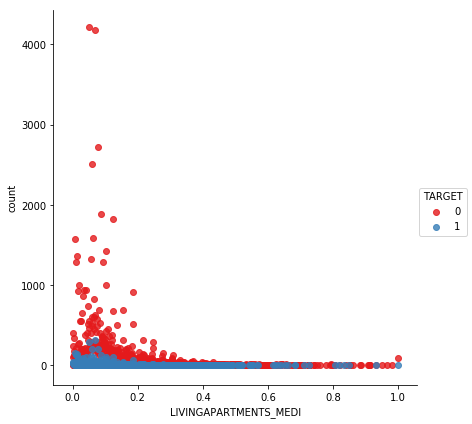

In [46]:
credit_risk_by_LIVINGAPARTMENTS_MEDI = train[['LIVINGAPARTMENTS_MEDI', 'TARGET']].groupby(['LIVINGAPARTMENTS_MEDI', 'TARGET']).size().reset_index()
credit_risk_by_LIVINGAPARTMENTS_MEDI.columns = ['LIVINGAPARTMENTS_MEDI', 'TARGET', 'count']
sns.lmplot(x = 'LIVINGAPARTMENTS_MEDI', y = 'count', data = credit_risk_by_LIVINGAPARTMENTS_MEDI, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=6)

Text(0,0.5,'Frequency')

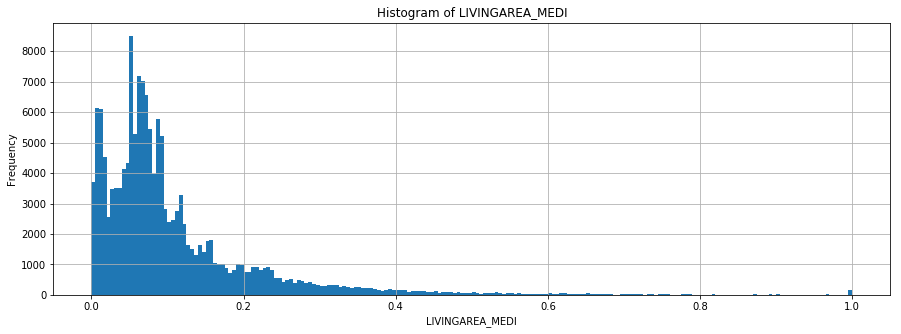

In [47]:
# Feature 82: LIVINGAREA_MEDI
ax = plt.figure(figsize=(15,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.LIVINGAREA_MEDI.hist(bins=200)
plt.title('Histogram of LIVINGAREA_MEDI')
plt.xlabel('LIVINGAREA_MEDI')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a18340ef0>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


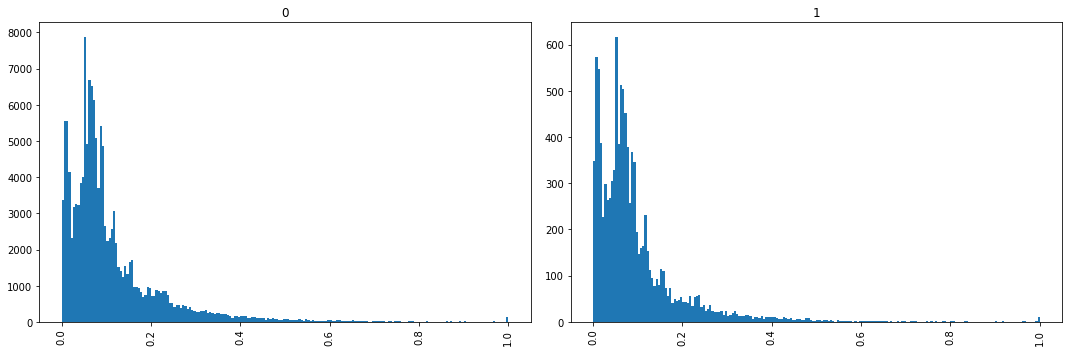

In [48]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='LIVINGAREA_MEDI',by='TARGET',bins=200,ax=axs)

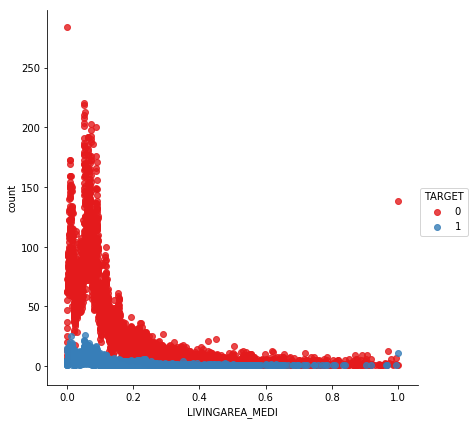

In [49]:
credit_risk_by_LIVINGAREA_MEDI = train[['LIVINGAREA_MEDI', 'TARGET']].groupby(['LIVINGAREA_MEDI', 'TARGET']).size().reset_index()
credit_risk_by_LIVINGAREA_MEDI.columns = ['LIVINGAREA_MEDI', 'TARGET', 'count']
sns.lmplot(x = 'LIVINGAREA_MEDI', y = 'count', data = credit_risk_by_LIVINGAREA_MEDI, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=6)

Text(0,0.5,'Frequency')

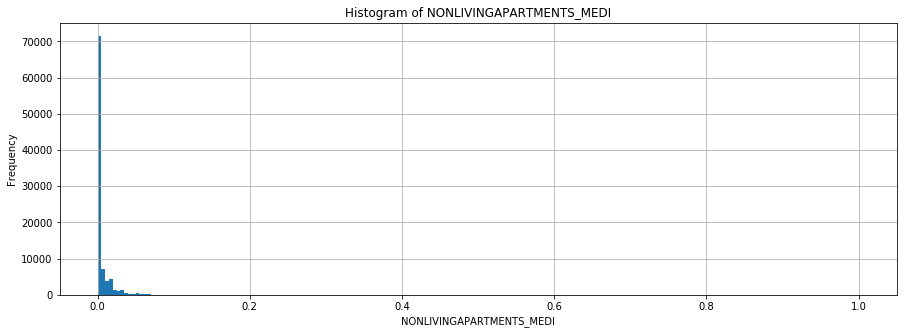

In [50]:
# Feature 83: NONLIVINGAPARTMENTS_MEDI
ax = plt.figure(figsize=(15,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.NONLIVINGAPARTMENTS_MEDI.hist(bins=200)
plt.title('Histogram of NONLIVINGAPARTMENTS_MEDI')
plt.xlabel('NONLIVINGAPARTMENTS_MEDI')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c2549b0>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


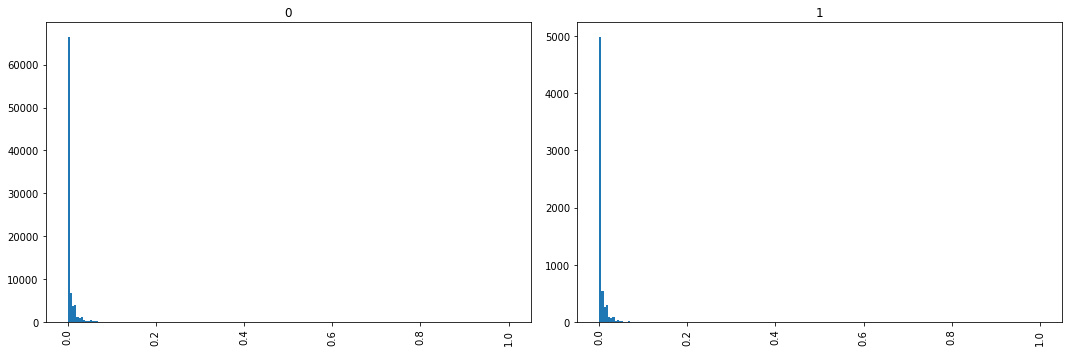

In [51]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='NONLIVINGAPARTMENTS_MEDI',by='TARGET',bins=200,ax=axs)

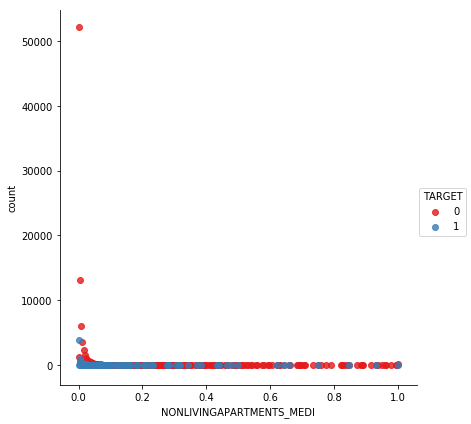

In [52]:
credit_risk_by_NONLIVINGAPARTMENTS_MEDI = train[['NONLIVINGAPARTMENTS_MEDI', 'TARGET']].groupby(['NONLIVINGAPARTMENTS_MEDI', 'TARGET']).size().reset_index()
credit_risk_by_NONLIVINGAPARTMENTS_MEDI.columns = ['NONLIVINGAPARTMENTS_MEDI', 'TARGET', 'count']
sns.lmplot(x = 'NONLIVINGAPARTMENTS_MEDI', y = 'count', data = credit_risk_by_NONLIVINGAPARTMENTS_MEDI, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=6)

Text(0,0.5,'Frequency')

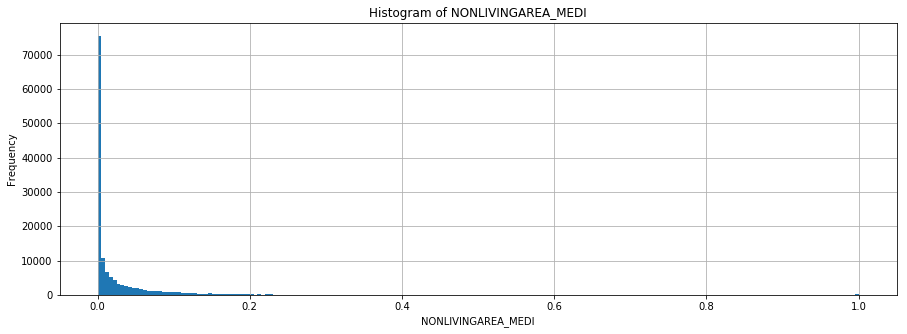

In [53]:
# Feature 84: NONLIVINGAREA_MEDI
ax = plt.figure(figsize=(15,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.NONLIVINGAREA_MEDI.hist(bins=200)
plt.title('Histogram of NONLIVINGAREA_MEDI')
plt.xlabel('NONLIVINGAREA_MEDI')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d9e8ef0>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


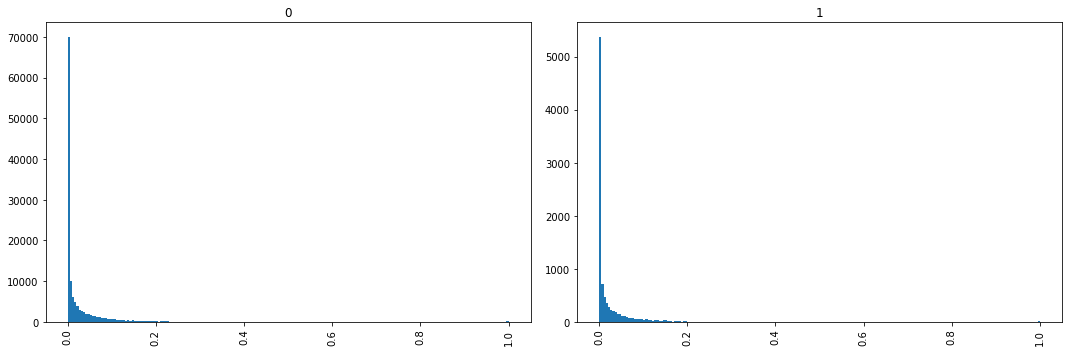

In [54]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='NONLIVINGAREA_MEDI',by='TARGET',bins=200,ax=axs)

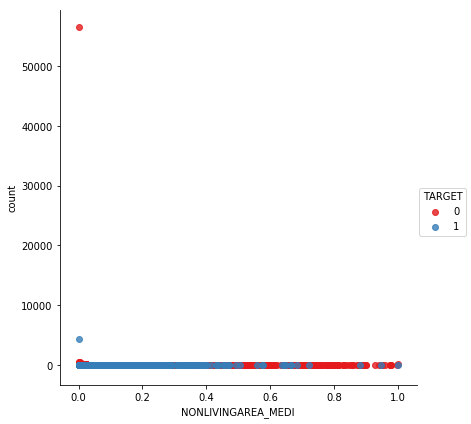

In [55]:
credit_risk_by_NONLIVINGAREA_MEDI = train[['NONLIVINGAREA_MEDI', 'TARGET']].groupby(['NONLIVINGAREA_MEDI', 'TARGET']).size().reset_index()
credit_risk_by_NONLIVINGAREA_MEDI.columns = ['NONLIVINGAREA_MEDI', 'TARGET', 'count']
sns.lmplot(x = 'NONLIVINGAREA_MEDI', y = 'count', data = credit_risk_by_NONLIVINGAREA_MEDI, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=6)

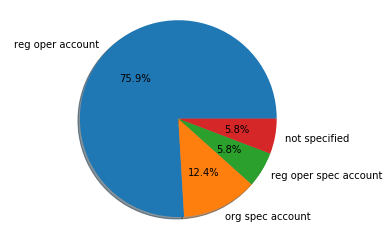

In [60]:
# Feature 85: FONDKAPREMONT_MODE
temp = train["FONDKAPREMONT_MODE"].value_counts()
labels = train["FONDKAPREMONT_MODE"].unique()
# handle nan
labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b5a6240>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


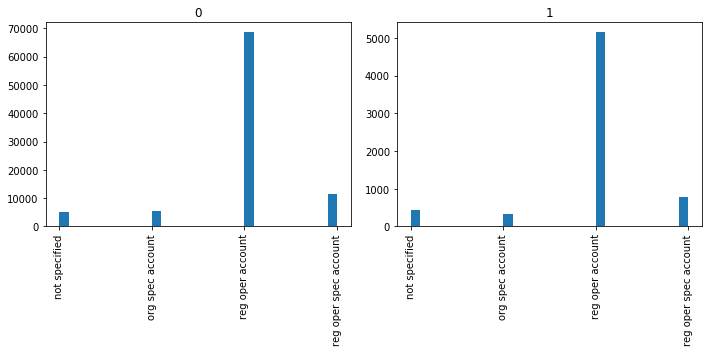

In [61]:
fig, axs = plt.subplots(1, 2,figsize=(10,5), tight_layout=True)
train.hist(column='FONDKAPREMONT_MODE',by='TARGET',bins=30,ax=axs)

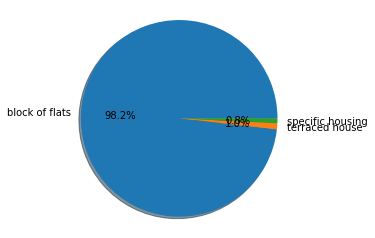

In [63]:
# Feature 86: HOUSETYPE_MODE
temp = train["HOUSETYPE_MODE"].value_counts()
labels = train["HOUSETYPE_MODE"].unique()
# handle nan
labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d6da198>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


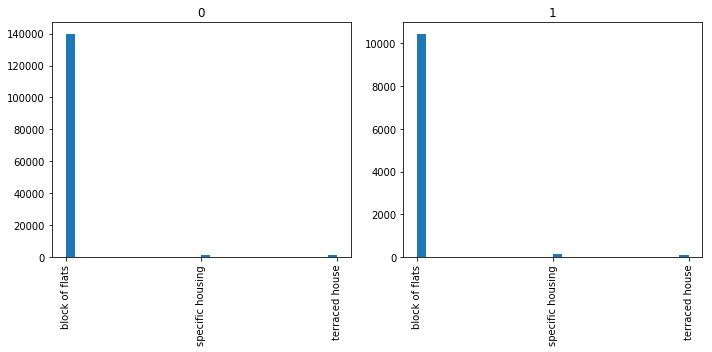

In [64]:
fig, axs = plt.subplots(1, 2,figsize=(10,5), tight_layout=True)
train.hist(column='HOUSETYPE_MODE',by='TARGET',bins=30,ax=axs)

Text(0,0.5,'Frequency')

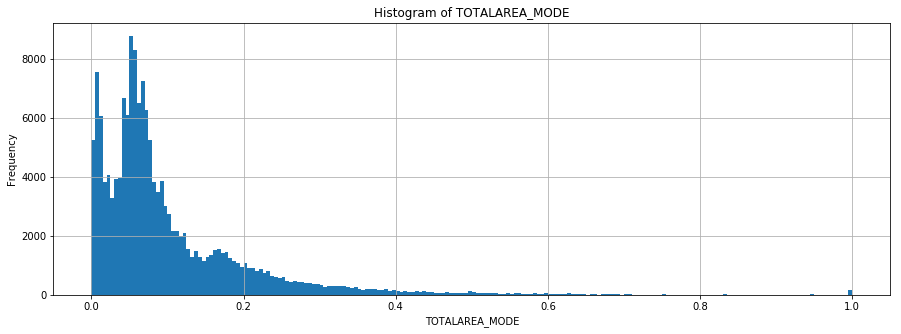

In [67]:
# Feature 87: TOTALAREA_MODE
ax = plt.figure(figsize=(15,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.TOTALAREA_MODE.hist(bins=200)
plt.title('Histogram of TOTALAREA_MODE')
plt.xlabel('TOTALAREA_MODE')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a3a96d940>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


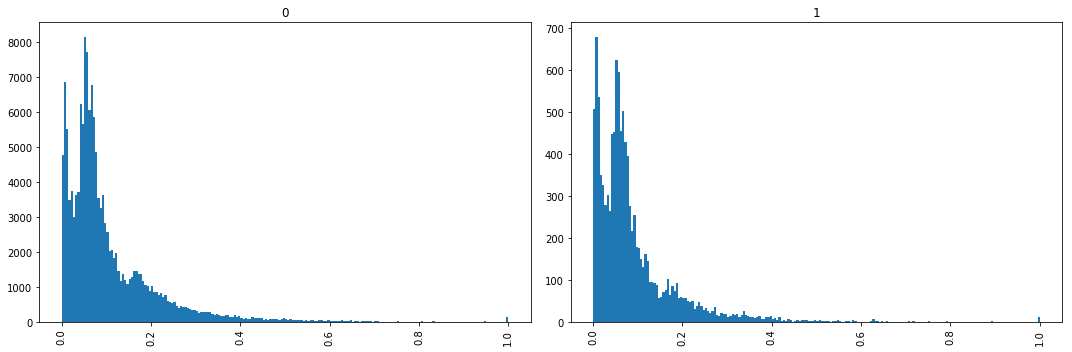

In [68]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='TOTALAREA_MODE',by='TARGET',bins=200,ax=axs)

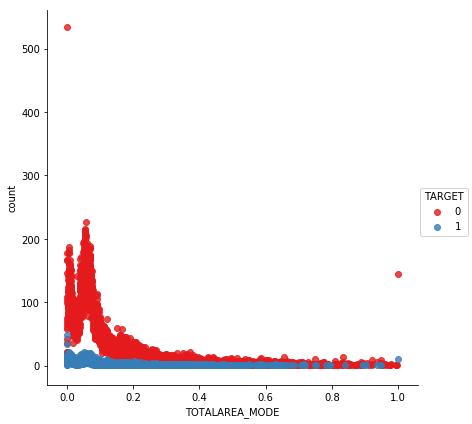

In [71]:
credit_risk_by_TOTALAREA_MODE = train[['TOTALAREA_MODE', 'TARGET']].groupby(['TOTALAREA_MODE', 'TARGET']).size().reset_index()
credit_risk_by_TOTALAREA_MODE.columns = ['TOTALAREA_MODE', 'TARGET', 'count']
sns.lmplot(x = 'TOTALAREA_MODE', y = 'count', data = credit_risk_by_TOTALAREA_MODE, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=6)

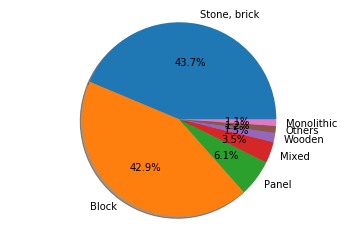

In [73]:
# Feature 88: WALLSMATERIAL_MODE
temp = train["WALLSMATERIAL_MODE"].value_counts()
labels = train["WALLSMATERIAL_MODE"].unique()
# handle nan
labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d490cc0>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


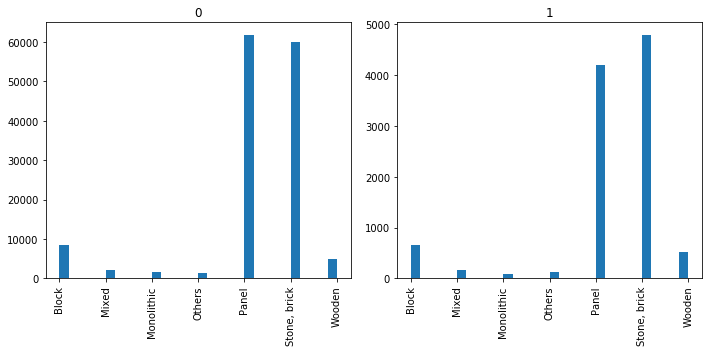

In [74]:
fig, axs = plt.subplots(1, 2,figsize=(10,5), tight_layout=True)
train.hist(column='WALLSMATERIAL_MODE',by='TARGET',bins=30,ax=axs)

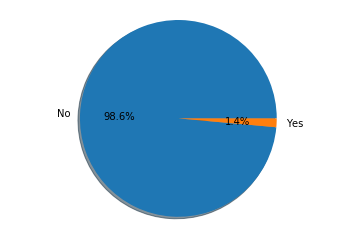

In [76]:
# Feature 89: EMERGENCYSTATE_MODE
temp = train["EMERGENCYSTATE_MODE"].value_counts()
labels = train["EMERGENCYSTATE_MODE"].unique()
# handle nan
labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a31792780>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


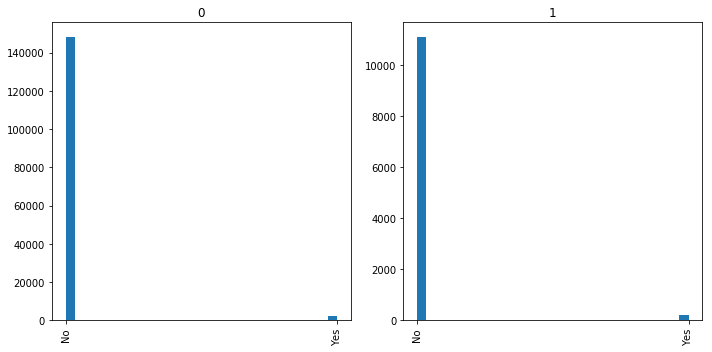

In [77]:
fig, axs = plt.subplots(1, 2,figsize=(10,5), tight_layout=True)
train.hist(column='EMERGENCYSTATE_MODE',by='TARGET',bins=30,ax=axs)

Text(0,0.5,'Frequency')

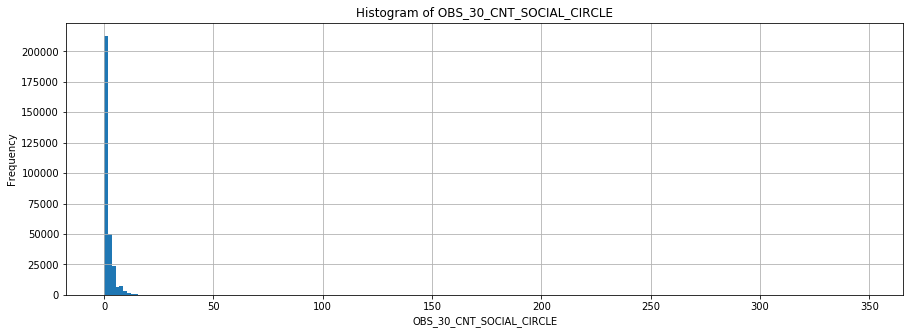

In [4]:
# Feature 90: OBS_30_CNT_SOCIAL_CIRCLE
ax = plt.figure(figsize=(15,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.OBS_30_CNT_SOCIAL_CIRCLE.hist(bins=200)
plt.title('Histogram of OBS_30_CNT_SOCIAL_CIRCLE')
plt.xlabel('OBS_30_CNT_SOCIAL_CIRCLE')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b717d30>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


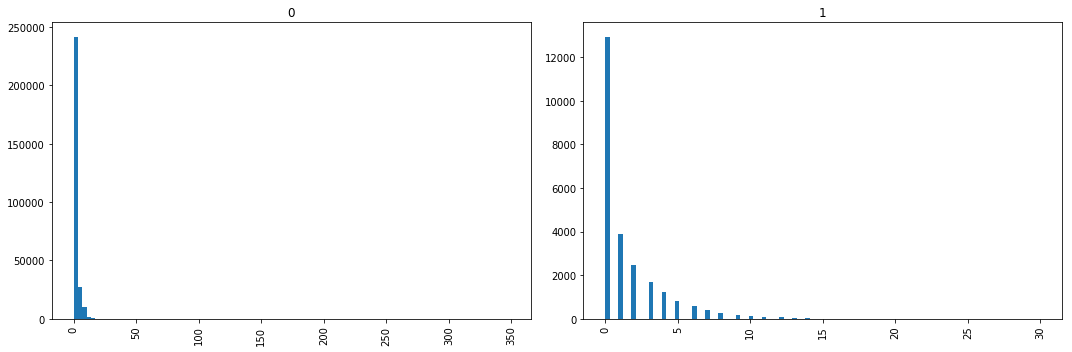

In [6]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='OBS_30_CNT_SOCIAL_CIRCLE',by='TARGET',bins=100,ax=axs)

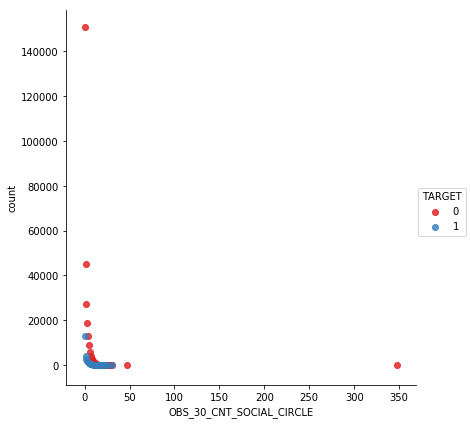

In [7]:
credit_risk_by_OBS_30_CNT_SOCIAL_CIRCLE = train[['OBS_30_CNT_SOCIAL_CIRCLE', 'TARGET']].groupby(['OBS_30_CNT_SOCIAL_CIRCLE', 'TARGET']).size().reset_index()
credit_risk_by_OBS_30_CNT_SOCIAL_CIRCLE.columns = ['OBS_30_CNT_SOCIAL_CIRCLE', 'TARGET', 'count']
sns.lmplot(x = 'OBS_30_CNT_SOCIAL_CIRCLE', y = 'count', data = credit_risk_by_OBS_30_CNT_SOCIAL_CIRCLE, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=6)

Text(0,0.5,'Frequency')

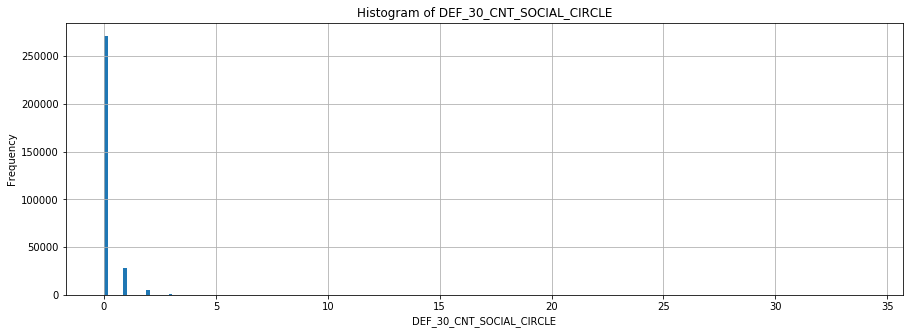

In [8]:
# Feature 91: DEF_30_CNT_SOCIAL_CIRCLE
ax = plt.figure(figsize=(15,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.DEF_30_CNT_SOCIAL_CIRCLE.hist(bins=200)
plt.title('Histogram of DEF_30_CNT_SOCIAL_CIRCLE')
plt.xlabel('DEF_30_CNT_SOCIAL_CIRCLE')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c7cde80>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


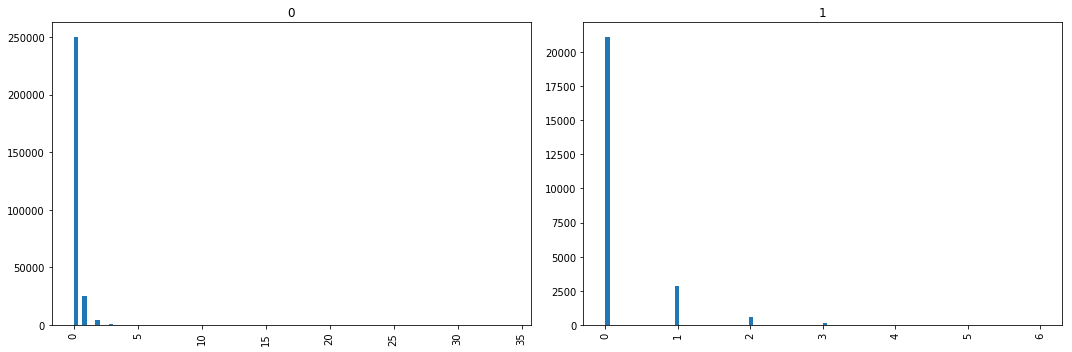

In [9]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='DEF_30_CNT_SOCIAL_CIRCLE',by='TARGET',bins=100,ax=axs)

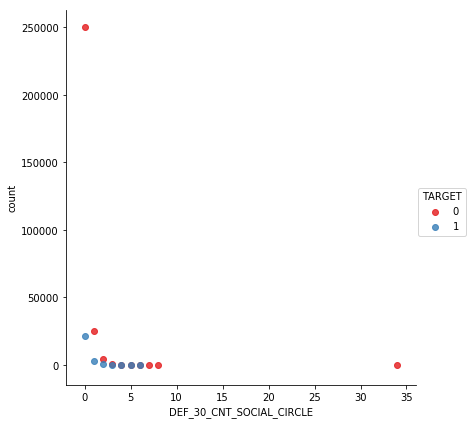

In [10]:
credit_risk_by_DEF_30_CNT_SOCIAL_CIRCLE = train[['DEF_30_CNT_SOCIAL_CIRCLE', 'TARGET']].groupby(['DEF_30_CNT_SOCIAL_CIRCLE', 'TARGET']).size().reset_index()
credit_risk_by_DEF_30_CNT_SOCIAL_CIRCLE.columns = ['DEF_30_CNT_SOCIAL_CIRCLE', 'TARGET', 'count']
sns.lmplot(x = 'DEF_30_CNT_SOCIAL_CIRCLE', y = 'count', data = credit_risk_by_DEF_30_CNT_SOCIAL_CIRCLE, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=6)

Text(0,0.5,'Frequency')

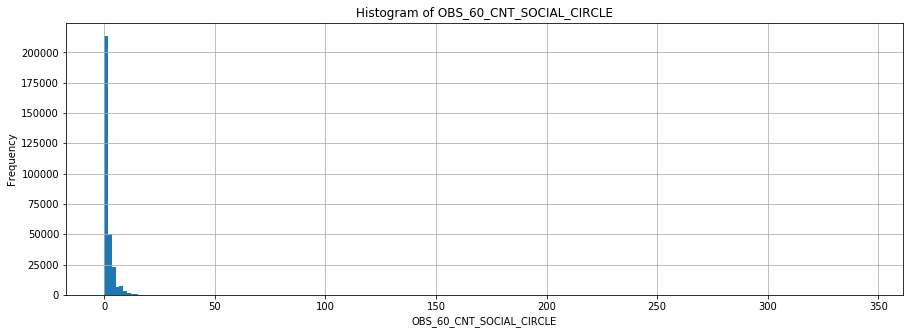

In [11]:
# Feature 92: OBS_60_CNT_SOCIAL_CIRCLE
ax = plt.figure(figsize=(15,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.OBS_60_CNT_SOCIAL_CIRCLE.hist(bins=200)
plt.title('Histogram of OBS_60_CNT_SOCIAL_CIRCLE')
plt.xlabel('OBS_60_CNT_SOCIAL_CIRCLE')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b42ad68>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


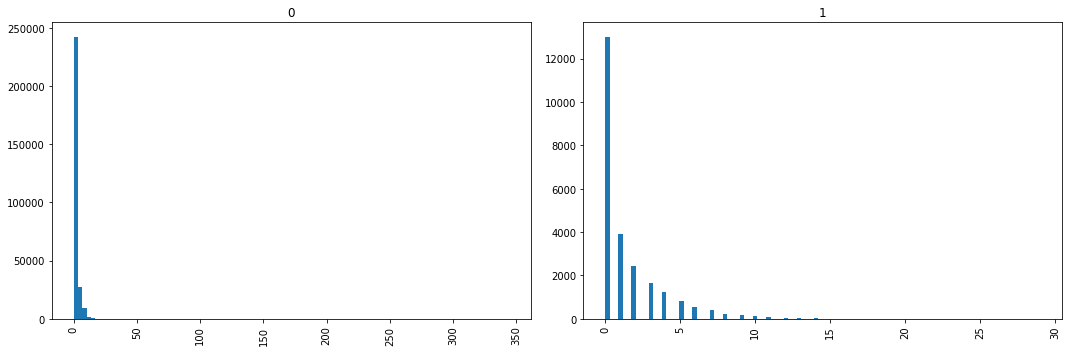

In [12]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='OBS_60_CNT_SOCIAL_CIRCLE',by='TARGET',bins=100,ax=axs)

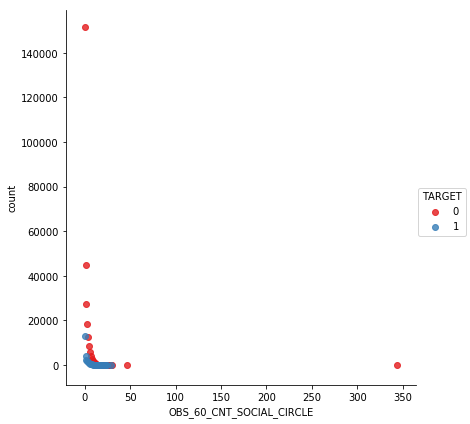

In [13]:
credit_risk_by_OBS_60_CNT_SOCIAL_CIRCLE = train[['OBS_60_CNT_SOCIAL_CIRCLE', 'TARGET']].groupby(['OBS_60_CNT_SOCIAL_CIRCLE', 'TARGET']).size().reset_index()
credit_risk_by_OBS_60_CNT_SOCIAL_CIRCLE.columns = ['OBS_60_CNT_SOCIAL_CIRCLE', 'TARGET', 'count']
sns.lmplot(x = 'OBS_60_CNT_SOCIAL_CIRCLE', y = 'count', data = credit_risk_by_OBS_60_CNT_SOCIAL_CIRCLE, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=6)

Text(0,0.5,'Frequency')

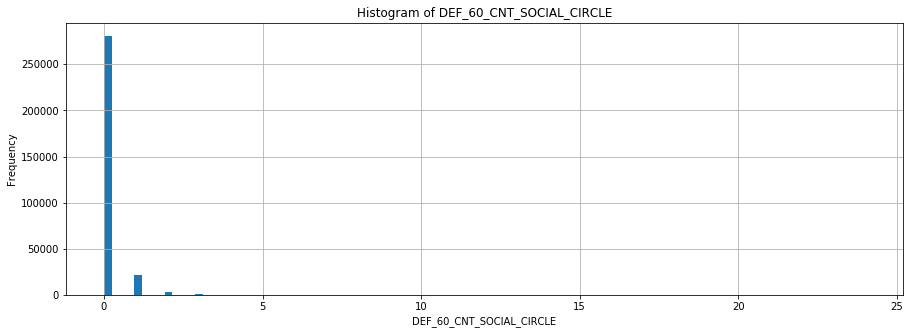

In [16]:
# Feature 93: DEF_60_CNT_SOCIAL_CIRCLE
ax = plt.figure(figsize=(15,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.DEF_60_CNT_SOCIAL_CIRCLE.hist(bins=100)
plt.title('Histogram of DEF_60_CNT_SOCIAL_CIRCLE')
plt.xlabel('DEF_60_CNT_SOCIAL_CIRCLE')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e0a3048>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


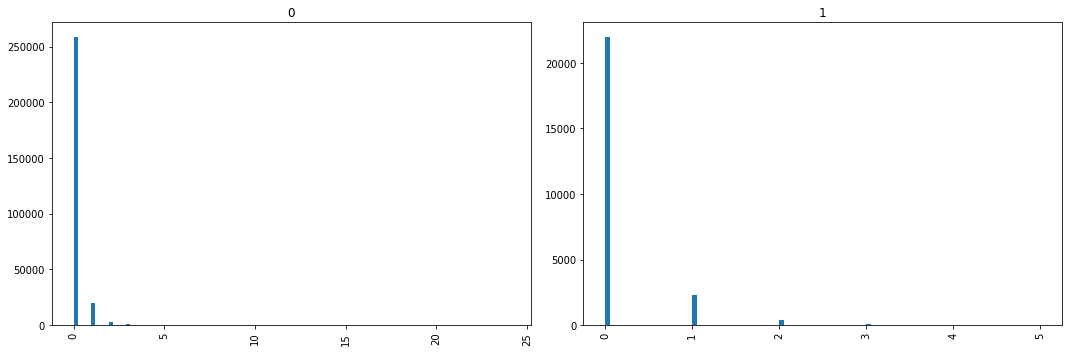

In [15]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='DEF_60_CNT_SOCIAL_CIRCLE',by='TARGET',bins=100,ax=axs)

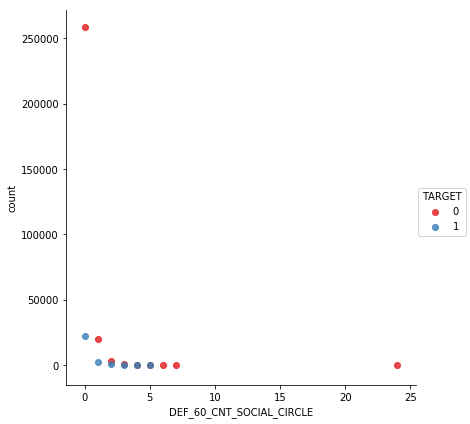

In [17]:
credit_risk_by_DEF_60_CNT_SOCIAL_CIRCLE = train[['DEF_60_CNT_SOCIAL_CIRCLE', 'TARGET']].groupby(['DEF_60_CNT_SOCIAL_CIRCLE', 'TARGET']).size().reset_index()
credit_risk_by_DEF_60_CNT_SOCIAL_CIRCLE.columns = ['DEF_60_CNT_SOCIAL_CIRCLE', 'TARGET', 'count']
sns.lmplot(x = 'DEF_60_CNT_SOCIAL_CIRCLE', y = 'count', data = credit_risk_by_DEF_60_CNT_SOCIAL_CIRCLE, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=6)

Text(0,0.5,'Frequency')

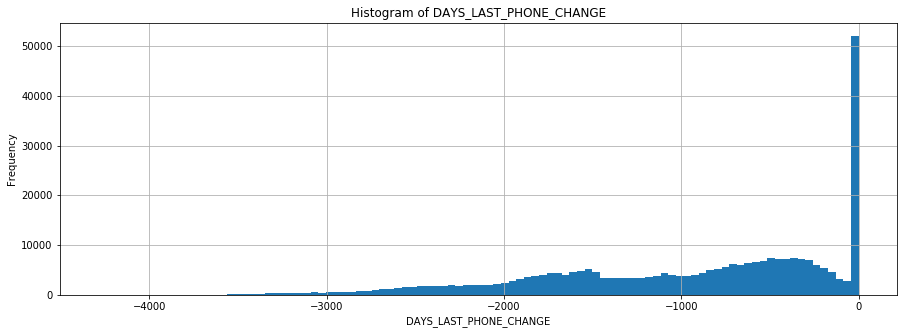

In [20]:
# Feature 94: DAYS_LAST_PHONE_CHANGE
ax = plt.figure(figsize=(15,5)).gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.DAYS_LAST_PHONE_CHANGE.hist(bins=100)
plt.title('Histogram of DAYS_LAST_PHONE_CHANGE')
plt.xlabel('DAYS_LAST_PHONE_CHANGE')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f080da0>,
      dtype=object)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


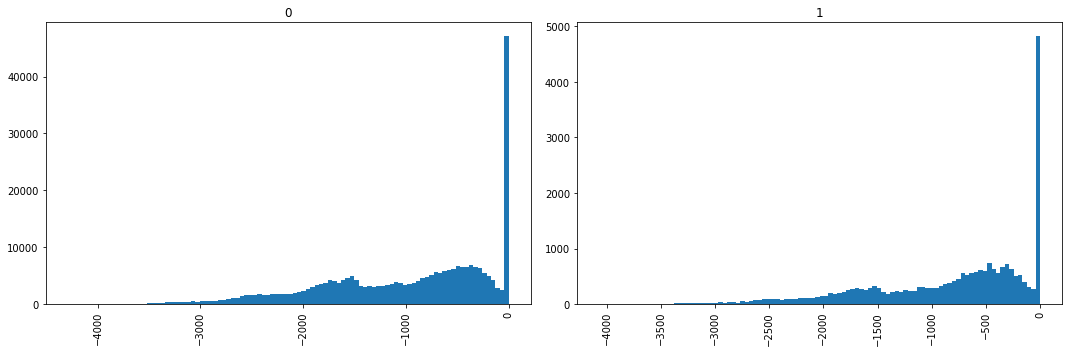

In [21]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='DAYS_LAST_PHONE_CHANGE',by='TARGET',bins=100,ax=axs)

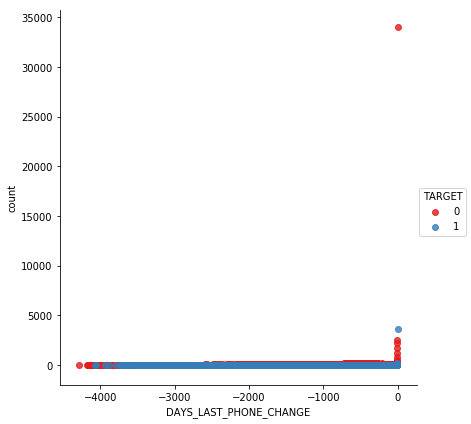

In [22]:
credit_risk_by_DAYS_LAST_PHONE_CHANGE = train[['DAYS_LAST_PHONE_CHANGE', 'TARGET']].groupby(['DAYS_LAST_PHONE_CHANGE', 'TARGET']).size().reset_index()
credit_risk_by_DAYS_LAST_PHONE_CHANGE.columns = ['DAYS_LAST_PHONE_CHANGE', 'TARGET', 'count']
sns.lmplot(x = 'DAYS_LAST_PHONE_CHANGE', y = 'count', data = credit_risk_by_DAYS_LAST_PHONE_CHANGE, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=6)

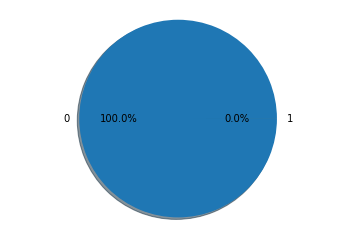

In [23]:
# Feature 95: FLAG_DOCUMENT_2
temp = train["FLAG_DOCUMENT_2"].value_counts()
labels = train["FLAG_DOCUMENT_2"].unique()
# handle nan
#labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

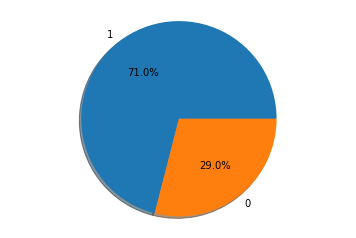

In [26]:
# Feature 96: FLAG_DOCUMENT_3
temp = train["FLAG_DOCUMENT_3"].value_counts()
labels = train["FLAG_DOCUMENT_3"].unique()
# handle nan
#labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


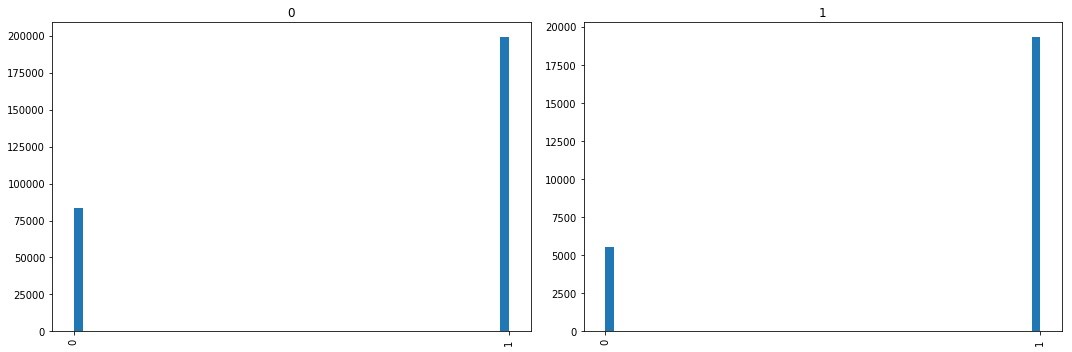

In [27]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='FLAG_DOCUMENT_3',by='TARGET',bins=50,ax=axs)
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

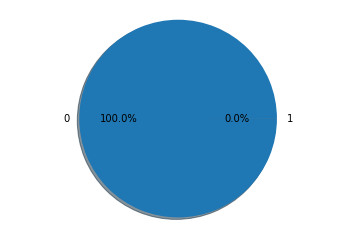

In [28]:
# Feature 97: FLAG_DOCUMENT_4
temp = train["FLAG_DOCUMENT_4"].value_counts()
labels = train["FLAG_DOCUMENT_4"].unique()
# handle nan
#labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

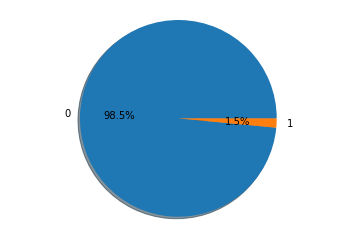

In [29]:
# Feature 98: FLAG_DOCUMENT_5
temp = train["FLAG_DOCUMENT_5"].value_counts()
labels = train["FLAG_DOCUMENT_5"].unique()
# handle nan
#labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


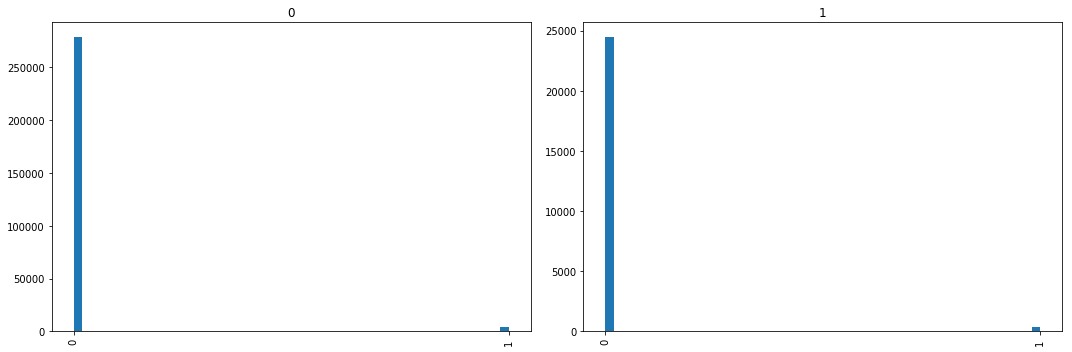

In [30]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='FLAG_DOCUMENT_5',by='TARGET',bins=50,ax=axs)
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

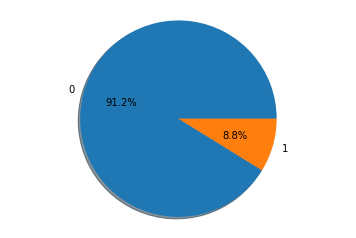

In [31]:
# Feature 99: FLAG_DOCUMENT_6
temp = train["FLAG_DOCUMENT_6"].value_counts()
labels = train["FLAG_DOCUMENT_6"].unique()
# handle nan
#labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


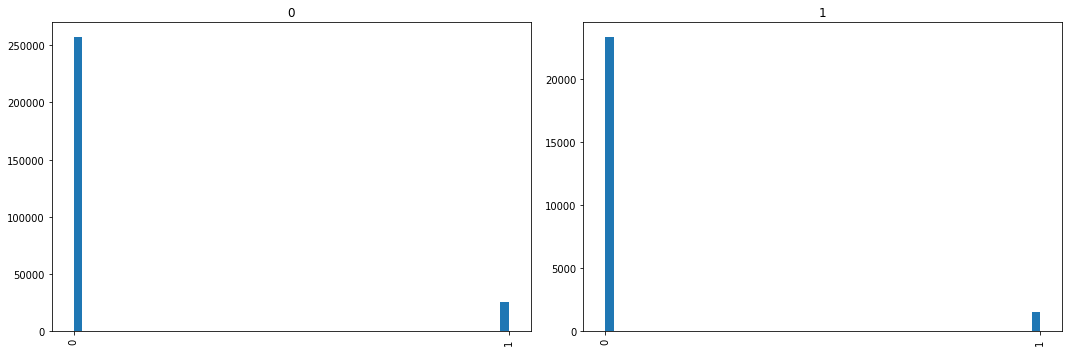

In [32]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='FLAG_DOCUMENT_6',by='TARGET',bins=50,ax=axs)
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

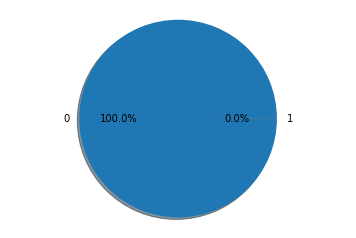

In [33]:
# Feature 100: FLAG_DOCUMENT_7
temp = train["FLAG_DOCUMENT_7"].value_counts()
labels = train["FLAG_DOCUMENT_7"].unique()
# handle nan
#labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

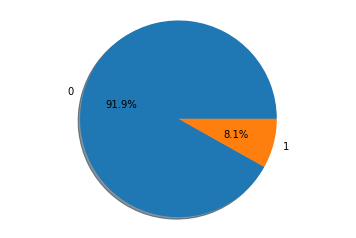

In [34]:
# Feature 101: FLAG_DOCUMENT_8
temp = train["FLAG_DOCUMENT_8"].value_counts()
labels = train["FLAG_DOCUMENT_8"].unique()
# handle nan
#labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


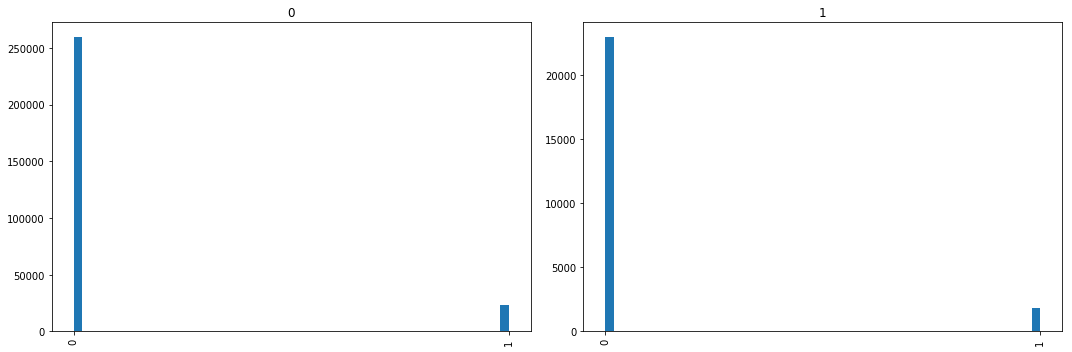

In [35]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='FLAG_DOCUMENT_8',by='TARGET',bins=50,ax=axs)
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

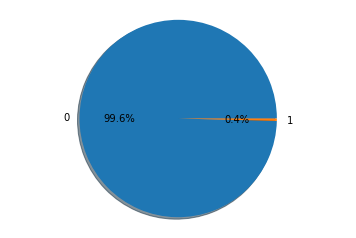

In [36]:
# Feature 102: FLAG_DOCUMENT_9
temp = train["FLAG_DOCUMENT_9"].value_counts()
labels = train["FLAG_DOCUMENT_9"].unique()
# handle nan
#labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


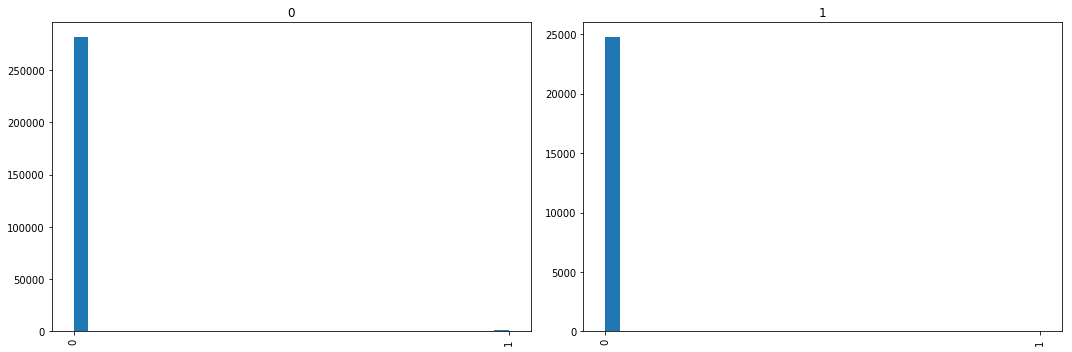

In [38]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='FLAG_DOCUMENT_9',by='TARGET',bins=30,ax=axs)
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

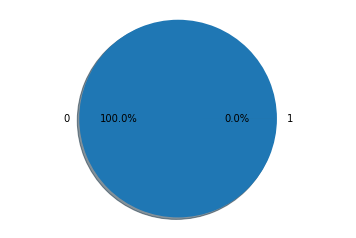

In [39]:
# Feature 103: FLAG_DOCUMENT_10
temp = train["FLAG_DOCUMENT_10"].value_counts()
labels = train["FLAG_DOCUMENT_10"].unique()
# handle nan
#labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

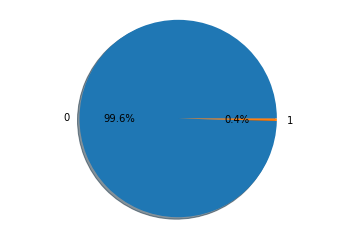

In [40]:
# Feature 104: FLAG_DOCUMENT_11
temp = train["FLAG_DOCUMENT_11"].value_counts()
labels = train["FLAG_DOCUMENT_11"].unique()
# handle nan
#labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


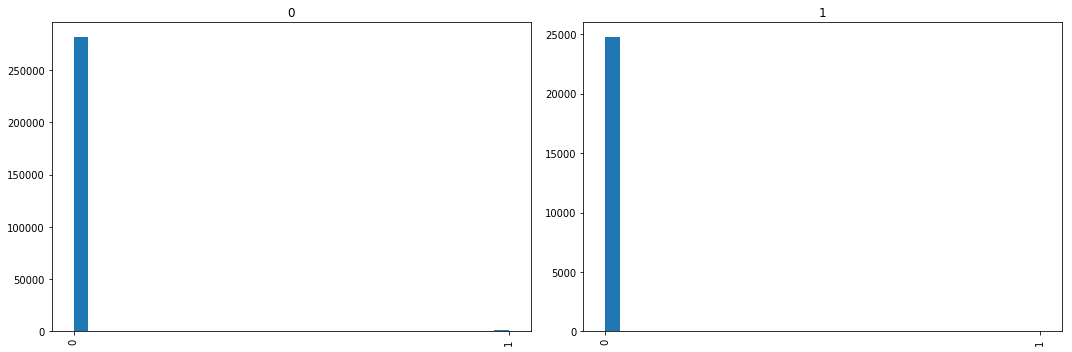

In [41]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='FLAG_DOCUMENT_11',by='TARGET',bins=30,ax=axs)
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

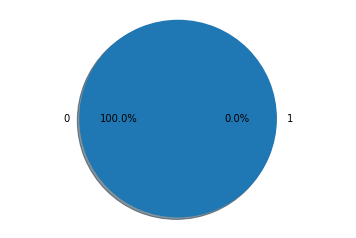

In [42]:
# Feature 105: FLAG_DOCUMENT_12
temp = train["FLAG_DOCUMENT_12"].value_counts()
labels = train["FLAG_DOCUMENT_12"].unique()
# handle nan
#labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

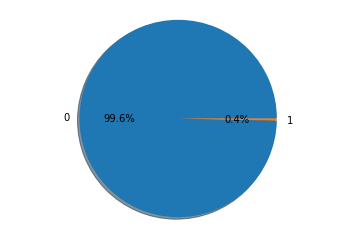

In [43]:
# Feature 106: FLAG_DOCUMENT_13
temp = train["FLAG_DOCUMENT_13"].value_counts()
labels = train["FLAG_DOCUMENT_13"].unique()
# handle nan
#labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


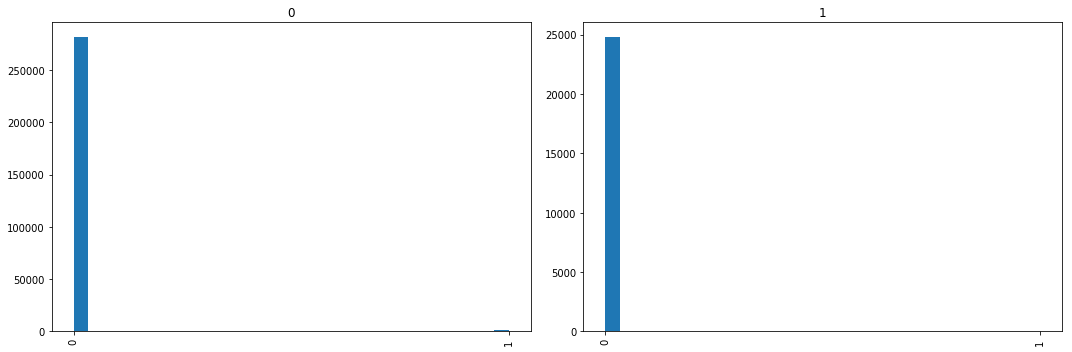

In [44]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='FLAG_DOCUMENT_13',by='TARGET',bins=30,ax=axs)
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

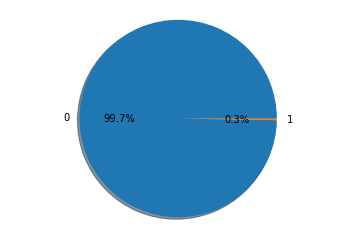

In [45]:
# Feature 107: FLAG_DOCUMENT_14
temp = train["FLAG_DOCUMENT_14"].value_counts()
labels = train["FLAG_DOCUMENT_14"].unique()
# handle nan
#labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


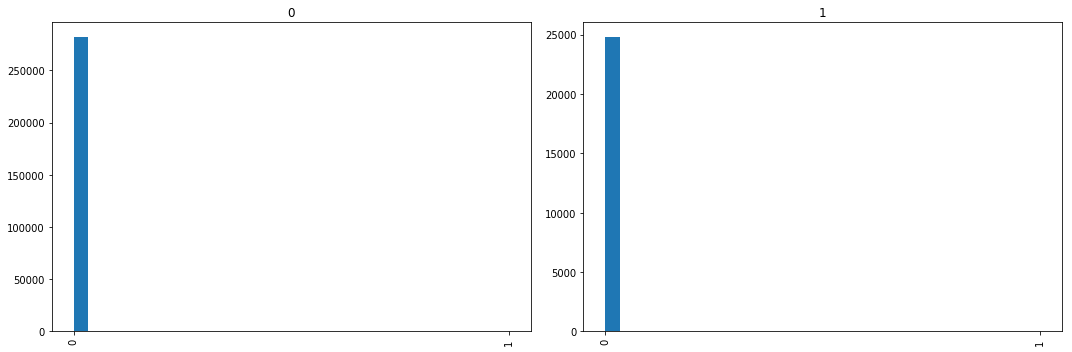

In [46]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='FLAG_DOCUMENT_14',by='TARGET',bins=30,ax=axs)
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

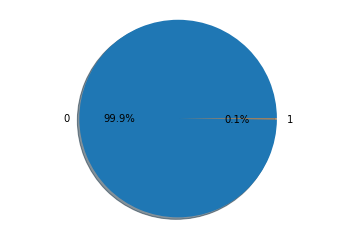

In [47]:
# Feature 108: FLAG_DOCUMENT_15
temp = train["FLAG_DOCUMENT_15"].value_counts()
labels = train["FLAG_DOCUMENT_15"].unique()
# handle nan
#labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


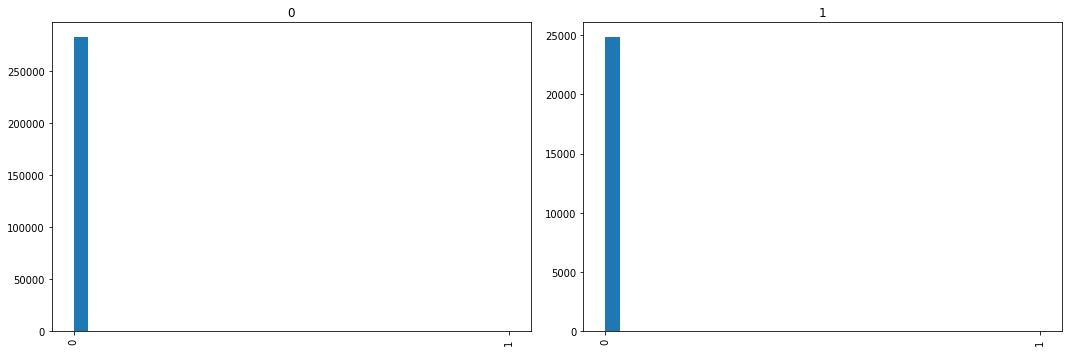

In [48]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='FLAG_DOCUMENT_15',by='TARGET',bins=30,ax=axs)
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

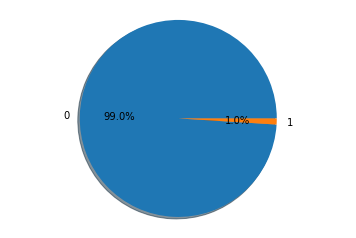

In [49]:
# Feature 109: FLAG_DOCUMENT_16
temp = train["FLAG_DOCUMENT_16"].value_counts()
labels = train["FLAG_DOCUMENT_16"].unique()
# handle nan
#labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


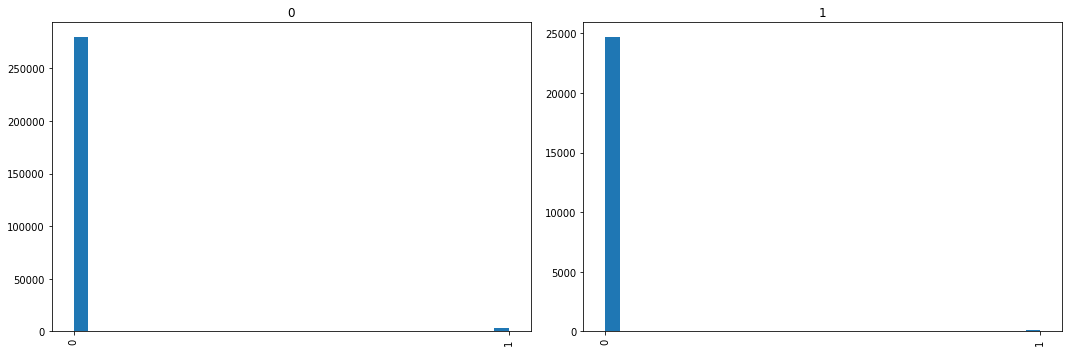

In [50]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='FLAG_DOCUMENT_16',by='TARGET',bins=30,ax=axs)
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

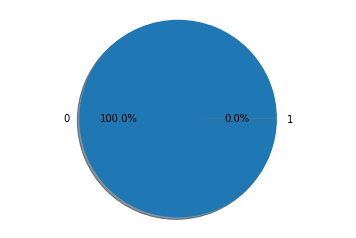

In [51]:
# Feature 110: FLAG_DOCUMENT_17
temp = train["FLAG_DOCUMENT_17"].value_counts()
labels = train["FLAG_DOCUMENT_17"].unique()
# handle nan
#labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

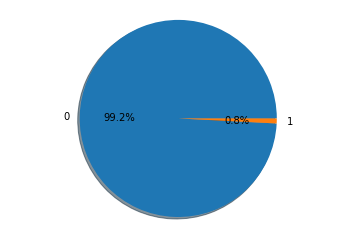

In [52]:
# Feature 111: FLAG_DOCUMENT_18
temp = train["FLAG_DOCUMENT_18"].value_counts()
labels = train["FLAG_DOCUMENT_18"].unique()
# handle nan
#labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


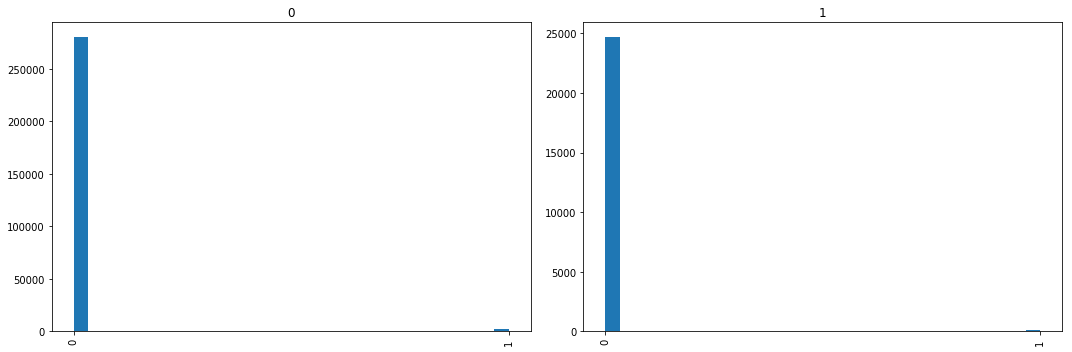

In [53]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='FLAG_DOCUMENT_18',by='TARGET',bins=30,ax=axs)
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

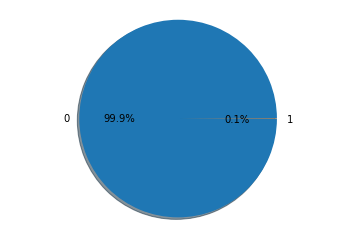

In [54]:
# Feature 112: FLAG_DOCUMENT_19
temp = train["FLAG_DOCUMENT_19"].value_counts()
labels = train["FLAG_DOCUMENT_19"].unique()
# handle nan
#labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


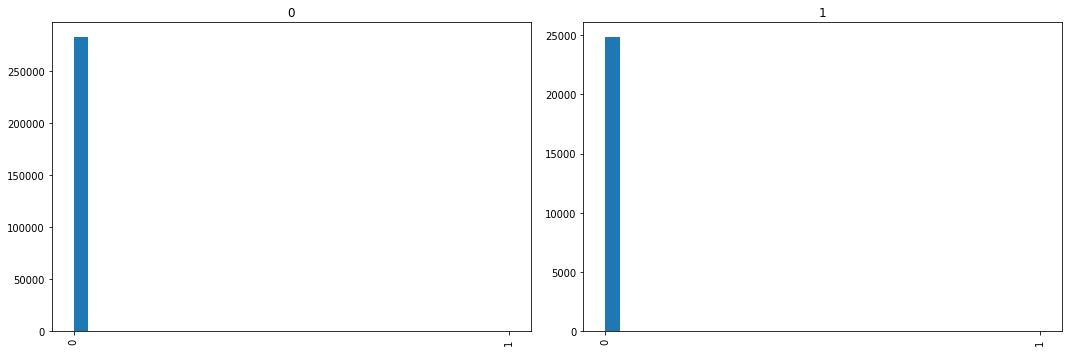

In [55]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='FLAG_DOCUMENT_19',by='TARGET',bins=30,ax=axs)
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

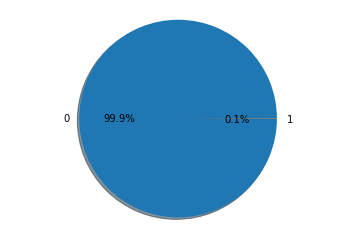

In [56]:
# Feature 113: FLAG_DOCUMENT_20
temp = train["FLAG_DOCUMENT_20"].value_counts()
labels = train["FLAG_DOCUMENT_20"].unique()
# handle nan
#labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


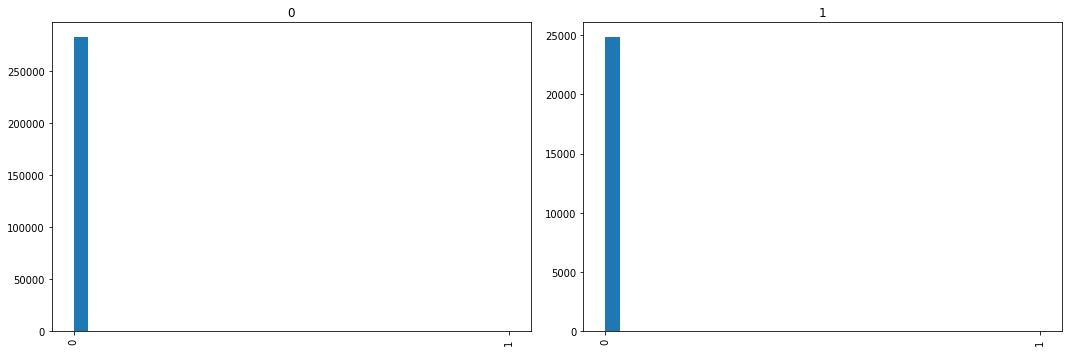

In [57]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='FLAG_DOCUMENT_20',by='TARGET',bins=30,ax=axs)
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

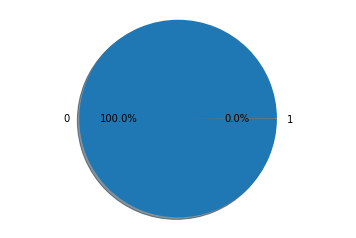

In [58]:
# Feature 114: FLAG_DOCUMENT_21
temp = train["FLAG_DOCUMENT_21"].value_counts()
labels = train["FLAG_DOCUMENT_21"].unique()
# handle nan
#labels=labels[~pd.isnull(labels)]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=labels,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

Text(0,0.5,'Frequency')

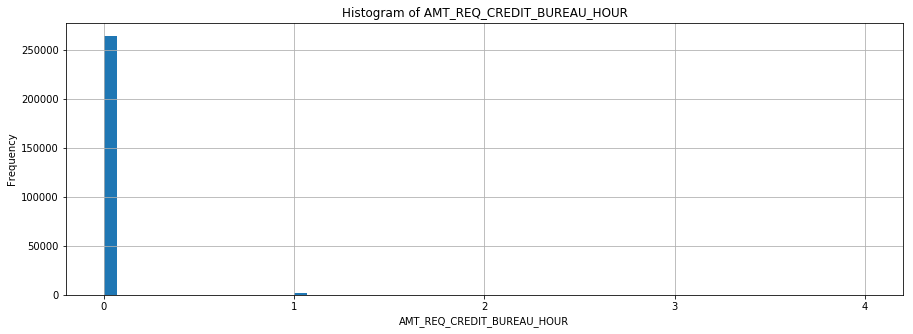

In [62]:
# Feature 115: AMT_REQ_CREDIT_BUREAU_HOUR
ax = plt.figure(figsize=(15,5)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.AMT_REQ_CREDIT_BUREAU_HOUR.hist(bins=60)
plt.title('Histogram of AMT_REQ_CREDIT_BUREAU_HOUR')
plt.xlabel('AMT_REQ_CREDIT_BUREAU_HOUR')
plt.ylabel('Frequency')

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


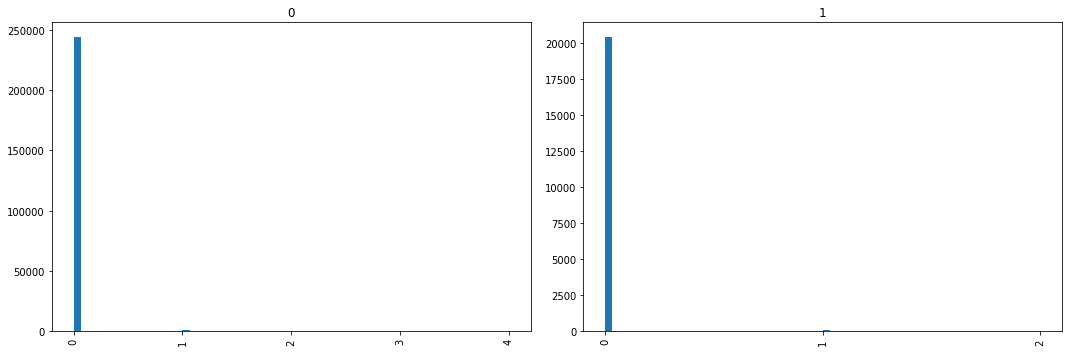

In [64]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='AMT_REQ_CREDIT_BUREAU_HOUR',by='TARGET',bins=60,ax=axs)
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

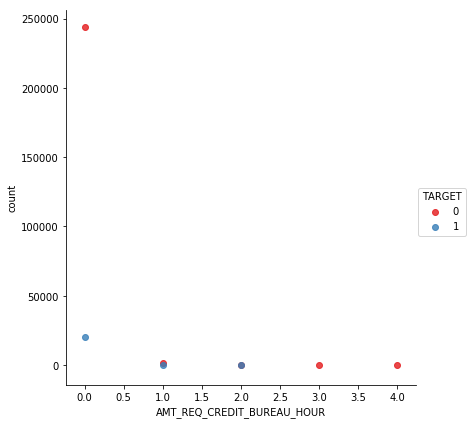

In [66]:
credit_risk_by_AMT_REQ_CREDIT_BUREAU_HOUR = train[['AMT_REQ_CREDIT_BUREAU_HOUR', 'TARGET']].groupby(['AMT_REQ_CREDIT_BUREAU_HOUR', 'TARGET']).size().reset_index()
credit_risk_by_AMT_REQ_CREDIT_BUREAU_HOUR.columns = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'TARGET', 'count']
sns.lmplot(x = 'AMT_REQ_CREDIT_BUREAU_HOUR', y = 'count', data = credit_risk_by_AMT_REQ_CREDIT_BUREAU_HOUR, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=6)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

Text(0,0.5,'Frequency')

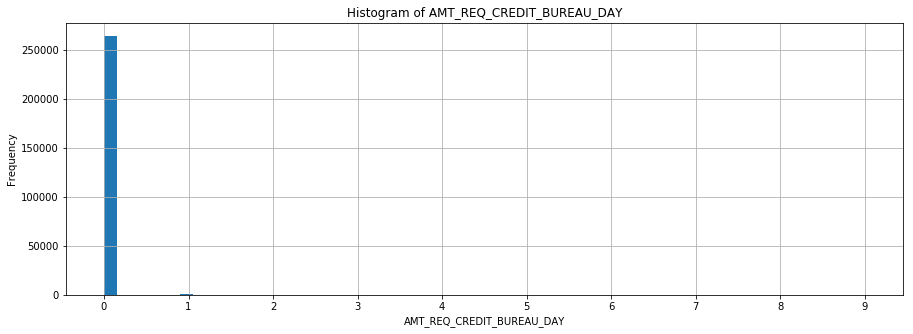

In [67]:
# Feature 116: AMT_REQ_CREDIT_BUREAU_DAY
ax = plt.figure(figsize=(15,5)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.AMT_REQ_CREDIT_BUREAU_DAY.hist(bins=60)
plt.title('Histogram of AMT_REQ_CREDIT_BUREAU_DAY')
plt.xlabel('AMT_REQ_CREDIT_BUREAU_DAY')
plt.ylabel('Frequency')

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


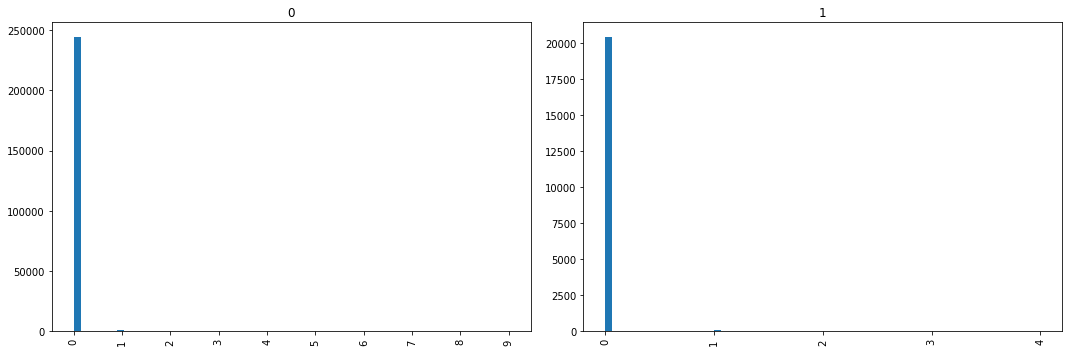

In [68]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='AMT_REQ_CREDIT_BUREAU_DAY',by='TARGET',bins=60,ax=axs)
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

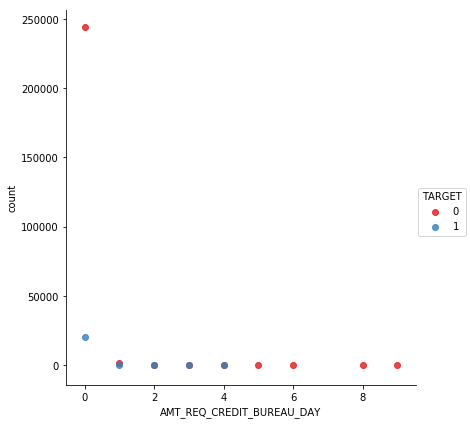

In [69]:
credit_risk_by_AMT_REQ_CREDIT_BUREAU_DAY = train[['AMT_REQ_CREDIT_BUREAU_DAY', 'TARGET']].groupby(['AMT_REQ_CREDIT_BUREAU_DAY', 'TARGET']).size().reset_index()
credit_risk_by_AMT_REQ_CREDIT_BUREAU_DAY.columns = ['AMT_REQ_CREDIT_BUREAU_DAY', 'TARGET', 'count']
sns.lmplot(x = 'AMT_REQ_CREDIT_BUREAU_DAY', y = 'count', data = credit_risk_by_AMT_REQ_CREDIT_BUREAU_DAY, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=6)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

Text(0,0.5,'Frequency')

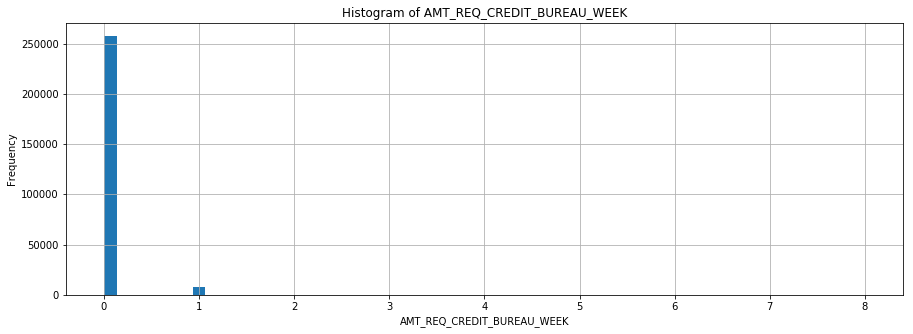

In [70]:
# Feature 117: AMT_REQ_CREDIT_BUREAU_WEEK
ax = plt.figure(figsize=(15,5)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.AMT_REQ_CREDIT_BUREAU_WEEK.hist(bins=60)
plt.title('Histogram of AMT_REQ_CREDIT_BUREAU_WEEK')
plt.xlabel('AMT_REQ_CREDIT_BUREAU_WEEK')
plt.ylabel('Frequency')

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


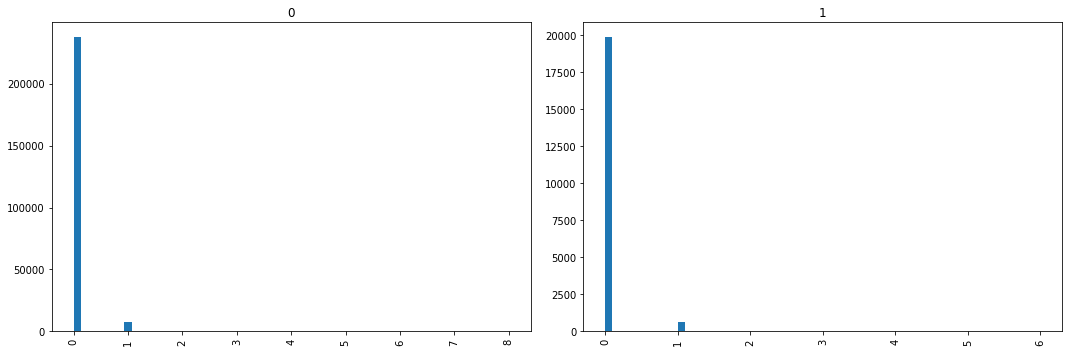

In [71]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='AMT_REQ_CREDIT_BUREAU_WEEK',by='TARGET',bins=60,ax=axs)
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

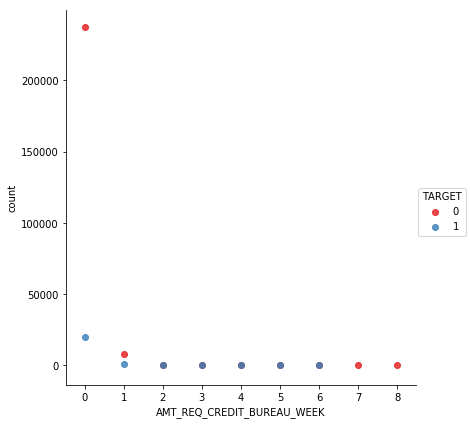

In [72]:
credit_risk_by_AMT_REQ_CREDIT_BUREAU_WEEK = train[['AMT_REQ_CREDIT_BUREAU_WEEK', 'TARGET']].groupby(['AMT_REQ_CREDIT_BUREAU_WEEK', 'TARGET']).size().reset_index()
credit_risk_by_AMT_REQ_CREDIT_BUREAU_WEEK.columns = ['AMT_REQ_CREDIT_BUREAU_WEEK', 'TARGET', 'count']
sns.lmplot(x = 'AMT_REQ_CREDIT_BUREAU_WEEK', y = 'count', data = credit_risk_by_AMT_REQ_CREDIT_BUREAU_WEEK, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=6)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

Text(0,0.5,'Frequency')

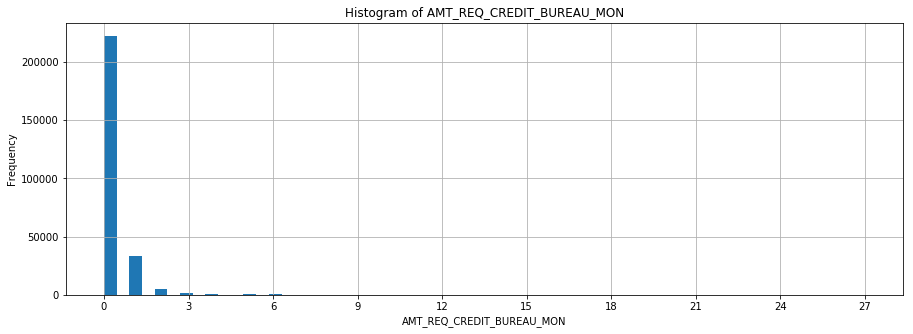

In [73]:
# Feature 118: AMT_REQ_CREDIT_BUREAU_MON
ax = plt.figure(figsize=(15,5)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.AMT_REQ_CREDIT_BUREAU_MON.hist(bins=60)
plt.title('Histogram of AMT_REQ_CREDIT_BUREAU_MON')
plt.xlabel('AMT_REQ_CREDIT_BUREAU_MON')
plt.ylabel('Frequency')

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


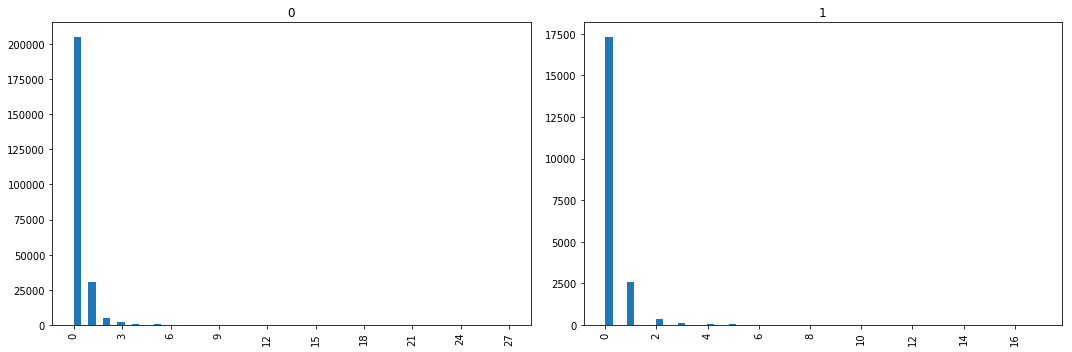

In [74]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='AMT_REQ_CREDIT_BUREAU_MON',by='TARGET',bins=60,ax=axs)
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

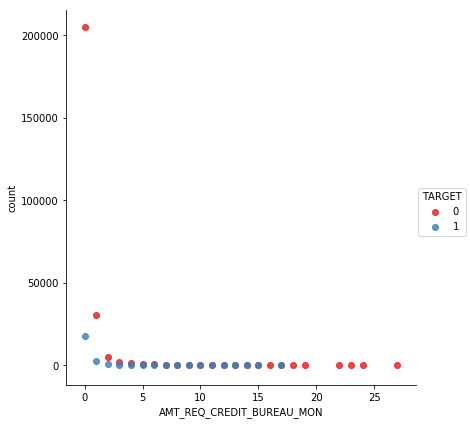

In [75]:
credit_risk_by_AMT_REQ_CREDIT_BUREAU_MON = train[['AMT_REQ_CREDIT_BUREAU_MON', 'TARGET']].groupby(['AMT_REQ_CREDIT_BUREAU_MON', 'TARGET']).size().reset_index()
credit_risk_by_AMT_REQ_CREDIT_BUREAU_MON.columns = ['AMT_REQ_CREDIT_BUREAU_MON', 'TARGET', 'count']
sns.lmplot(x = 'AMT_REQ_CREDIT_BUREAU_MON', y = 'count', data = credit_risk_by_AMT_REQ_CREDIT_BUREAU_MON, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=6)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

Text(0,0.5,'Frequency')

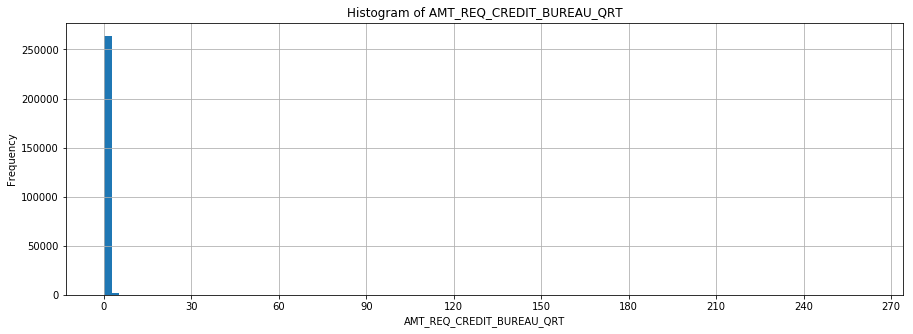

In [78]:
# Feature 119: AMT_REQ_CREDIT_BUREAU_QRT
ax = plt.figure(figsize=(15,5)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.AMT_REQ_CREDIT_BUREAU_QRT.hist(bins=100)
plt.title('Histogram of AMT_REQ_CREDIT_BUREAU_QRT')
plt.xlabel('AMT_REQ_CREDIT_BUREAU_QRT')
plt.ylabel('Frequency')

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


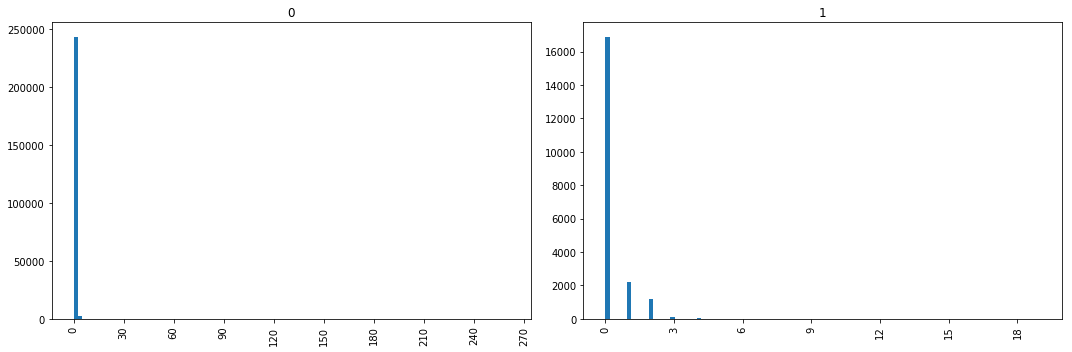

In [79]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='AMT_REQ_CREDIT_BUREAU_QRT',by='TARGET',bins=100,ax=axs)
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

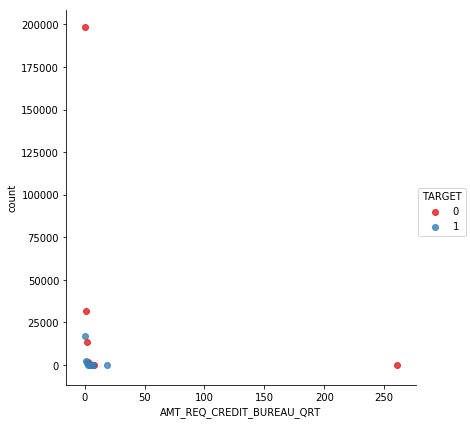

In [80]:
credit_risk_by_AMT_REQ_CREDIT_BUREAU_QRT = train[['AMT_REQ_CREDIT_BUREAU_QRT', 'TARGET']].groupby(['AMT_REQ_CREDIT_BUREAU_QRT', 'TARGET']).size().reset_index()
credit_risk_by_AMT_REQ_CREDIT_BUREAU_QRT.columns = ['AMT_REQ_CREDIT_BUREAU_QRT', 'TARGET', 'count']
sns.lmplot(x = 'AMT_REQ_CREDIT_BUREAU_QRT', y = 'count', data = credit_risk_by_AMT_REQ_CREDIT_BUREAU_QRT, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=6)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

Text(0,0.5,'Frequency')

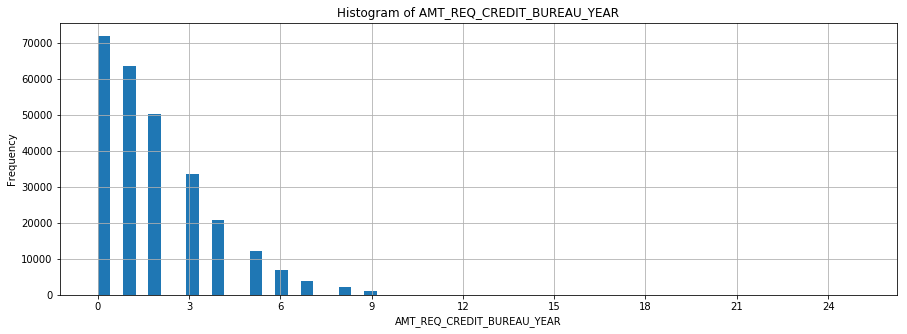

In [86]:
# Feature 120: AMT_REQ_CREDIT_BUREAU_YEAR
ax = plt.figure(figsize=(15,5)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
train.AMT_REQ_CREDIT_BUREAU_YEAR.hist(bins=60)
plt.title('Histogram of AMT_REQ_CREDIT_BUREAU_YEAR')
plt.xlabel('AMT_REQ_CREDIT_BUREAU_YEAR')
plt.ylabel('Frequency')

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


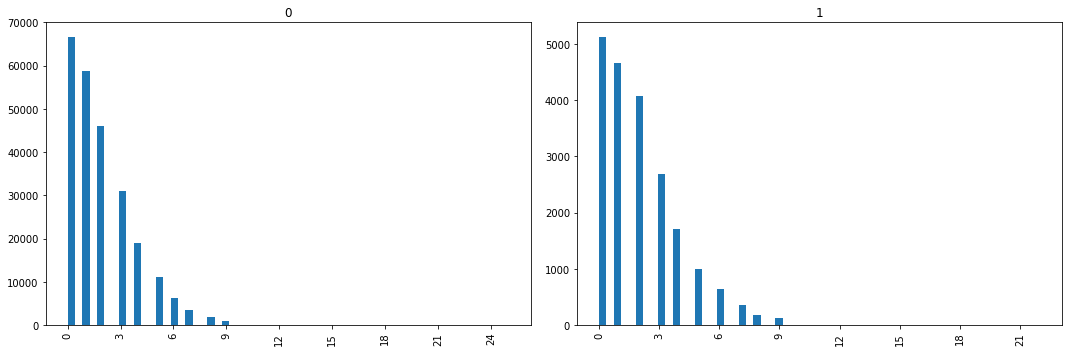

In [87]:
fig, axs = plt.subplots(1, 2,figsize=(15,5), tight_layout=True)
train.hist(column='AMT_REQ_CREDIT_BUREAU_YEAR',by='TARGET',bins=60,ax=axs)
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

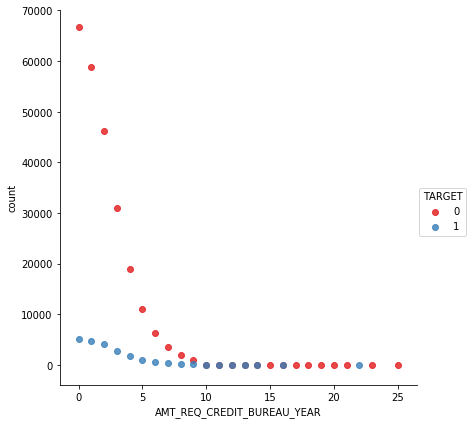

In [88]:
credit_risk_by_AMT_REQ_CREDIT_BUREAU_YEAR = train[['AMT_REQ_CREDIT_BUREAU_YEAR', 'TARGET']].groupby(['AMT_REQ_CREDIT_BUREAU_YEAR', 'TARGET']).size().reset_index()
credit_risk_by_AMT_REQ_CREDIT_BUREAU_YEAR.columns = ['AMT_REQ_CREDIT_BUREAU_YEAR', 'TARGET', 'count']
sns.lmplot(x = 'AMT_REQ_CREDIT_BUREAU_YEAR', y = 'count', data = credit_risk_by_AMT_REQ_CREDIT_BUREAU_YEAR, hue = "TARGET", 
           palette="Set1", fit_reg = False,size=6)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

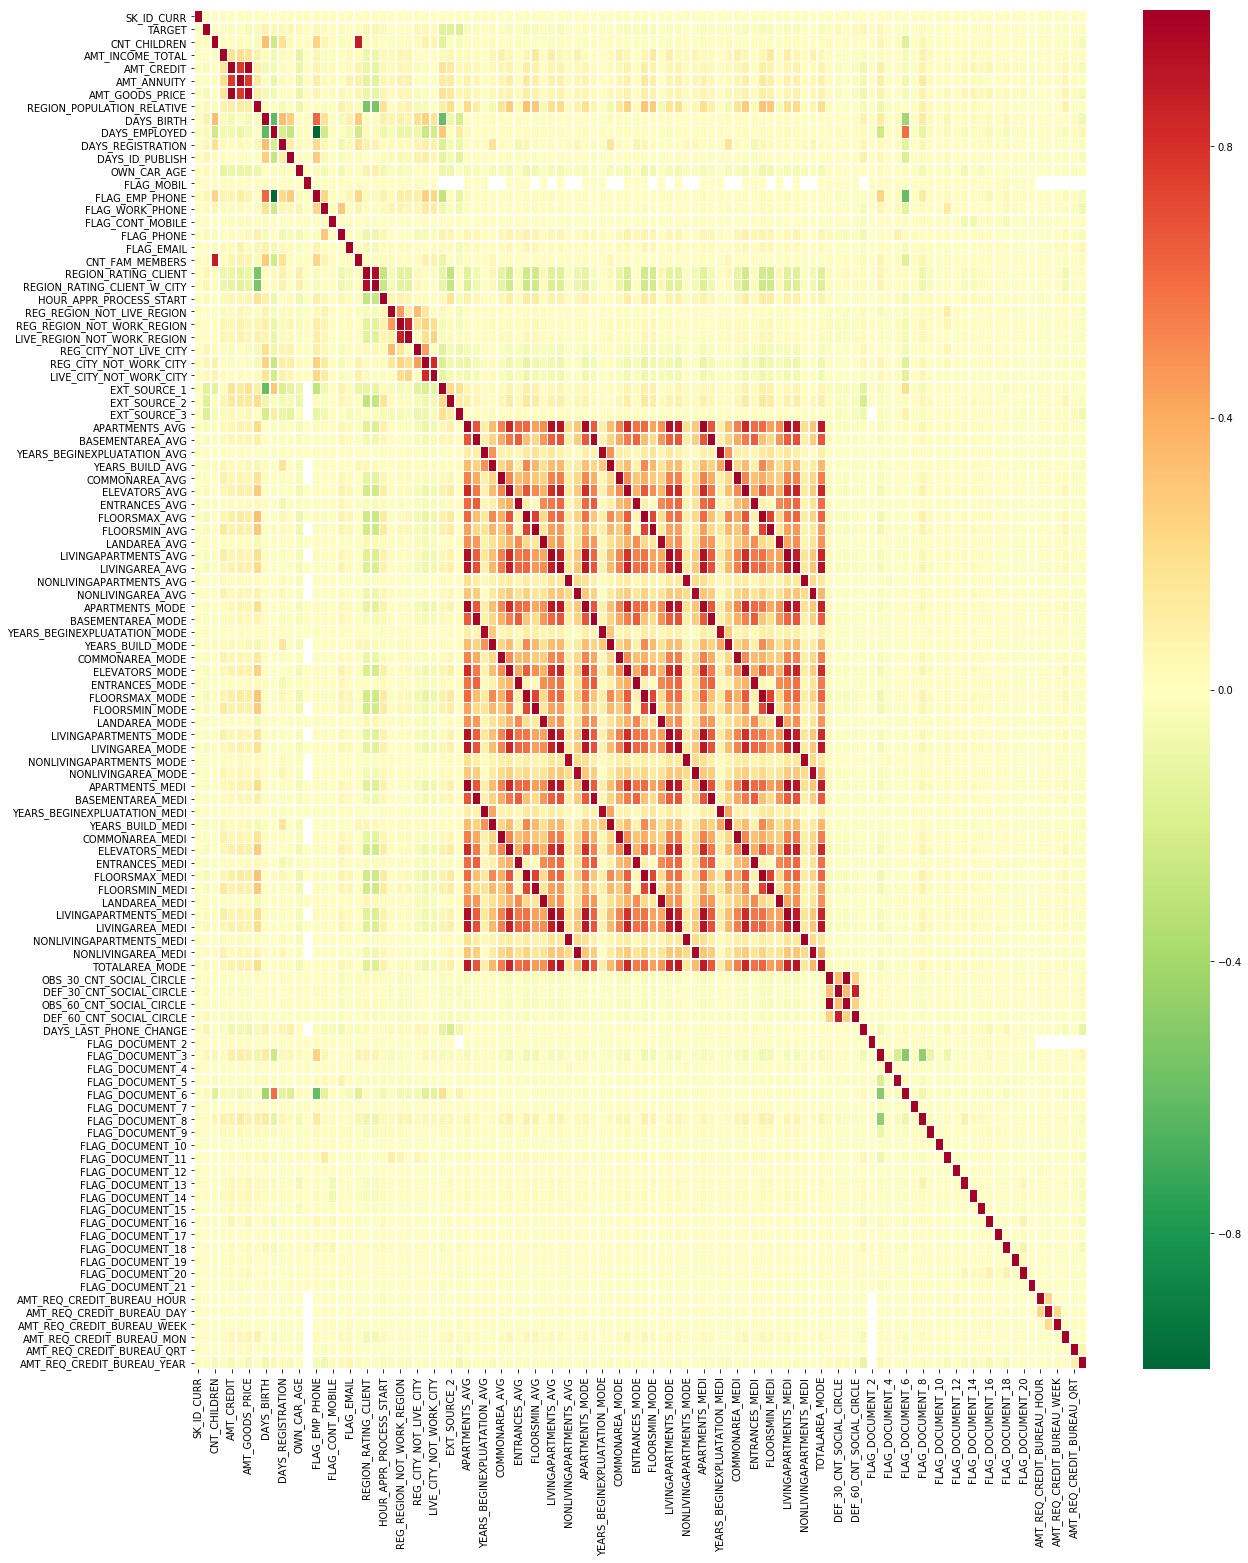

In [91]:
ax = plt.figure(figsize=(20,25)).gca()
sns.heatmap(train.corr(),cmap='RdYlGn_r',vmax=1.0,vmin=-1.0,linewidths=0.5,ax=ax)

In [54]:
train.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)
